This analyusis, we will look at the three versions of the same datasets

the first is the overall dataset and we will remove year where 3 or more months are removed are gone

tghe second is looking at the extended summer period where 1 or months are removed are gone

the third looks at the indivudal months where by the WMO standards if a month has less then 8 days its removed 

I think first we will look at the month by month data see how the averages change based on this, the months in focus will be the extdended summer period but for the most part i will have data for all the months and will plot them first, then i will go into plotting the tmeperaute dataset for each month in the summer as that is my goal of heatwaves

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://library.wmo.int/doc_num.php?explnum_id=4166
#WMO standards website

In [2]:
Data = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\COMPLETE HOMOGENISED\Perth_1830_2021_Corrected_Deleted_MxLessMin.csv")

In [3]:
Data['date'] = pd.to_datetime(Data['date'])

In [4]:
Data =  Data.set_index('date')

In [5]:
Data

Max_1  Min_1  Max_2  Min_2  Max_3  Min_3  Max_4  Min_4  Max_5  \
date                                                                        
1830-04-16   25.1    NaN   25.1    NaN   25.1    NaN   25.1    NaN   25.1   
1830-04-17   25.8   10.7   25.8   10.8   25.8   10.8   25.8   11.6   25.8   
1830-04-18   28.3   13.4   28.3   13.3   28.5   13.0   27.8   13.3   28.1   
1830-04-19   26.7   14.0   26.3   14.0   26.6   13.9   26.3   14.2   26.3   
1830-04-20   24.4    7.8   24.3    7.9   24.1    7.9   24.4    7.8   24.3   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-06-26   20.3    5.8   20.3    5.8   20.3    5.8   20.3    5.8   20.3   
2021-06-27   15.6    8.7   15.6    8.7   15.6    8.7   15.6    8.7   15.6   
2021-06-28   19.7   10.5   19.7   10.5   19.7   10.5   19.7   10.5   19.7   
2021-06-29   18.0   12.5   18.0   12.5   18.0   12.5   18.0   12.5   18.0   
2021-06-30   16.8    7.7   16.8    7.7   16.8    7.7   16.8    7.7   16.8   

            Min_5  ...  Max_996  Min_996  Max_997  Min_997  Max_998  Min_998  \
date               ...                                                         
1830-04-16    NaN  ...     25.1      NaN     25.1      NaN     25.1      NaN   
1830-04-17   10.8  ...     25.8     10.7     25.8     10.6     25.8     10.7   
1830-04-18   13.2  ...     28.4     13.1     28.3     13.0     27.8     13.0   
1830-04-19   14.1  ...     26.2     14.0     26.2     14.0     26.6     13.9   
1830-04-20    7.9  ...     24.4      7.8     24.3      7.8     24.4      7.8   
...           ...  ...      ...      ...      ...      ...      ...      ...   
2021-06-26    5.8  ...     20.3      5.8     20.3      5.8     20.3      5.8   
2021-06-27    8.7  ...     15.6      8.7     15.6      8.7     15.6      8.7   
2021-06-28   10.5  ...     19.7     10.5     19.7     10.5     19.7     10.5   
2021-06-29   12.5  ...     18.0     12.5     18.0     12.5     18.0     12.5   
2021-06-30    7.7  ...     16.8      7.7     16.8      7.7     16.8      7.7   

            Max_999  Min_999  Max_1000  Min_1000  
date                                              
1830-04-16     25.1      NaN      25.1       NaN  
1830-04-17     25.8     10.9      25.8      10.6  
1830-04-18     28.1     13.4      28.1      13.2  
1830-04-19     26.3     14.1      26.2      13.9  
1830-04-20     24.4      7.8      24.4       7.8  
...             ...      ...       ...       ...  
2021-06-26     20.3      5.8      20.3       5.8  
2021-06-27     15.6      8.7      15.6       8.7  
2021-06-28     19.7     10.5      19.7      10.5  
2021-06-29     18.0     12.5      18.0      12.5  
2021-06-30     16.8      7.7      16.8       7.7  

[69839 rows x 2000 columns]

In [6]:
# Separate the columns into max columns and min columns
max_columns = [col for col in Data.columns if col.startswith('Max_')]
min_columns = [col for col in Data.columns if col.startswith('Min_')]

In [7]:

# Calculate the mean of the max columns
max_means = Data[max_columns].mean(axis=1)

# Calculate the mean of the min columns
min_means = Data[min_columns].mean(axis=1)

In [8]:
# Create a new DataFrame with the mean values
Mean_Data = pd.DataFrame({'Max_Mean': max_means, 'Min_Mean': min_means}).round(1)

Mean_Data

Max_Mean  Min_Mean
date                          
1830-04-16      25.1       NaN
1830-04-17      25.8      10.8
1830-04-18      28.1      13.2
1830-04-19      26.4      14.0
1830-04-20      24.3       7.9
...              ...       ...
2021-06-26      20.3       5.8
2021-06-27      15.6       8.7
2021-06-28      19.7      10.5
2021-06-29      18.0      12.5
2021-06-30      16.8       7.7

[69839 rows x 2 columns]

<AxesSubplot:xlabel='date'>

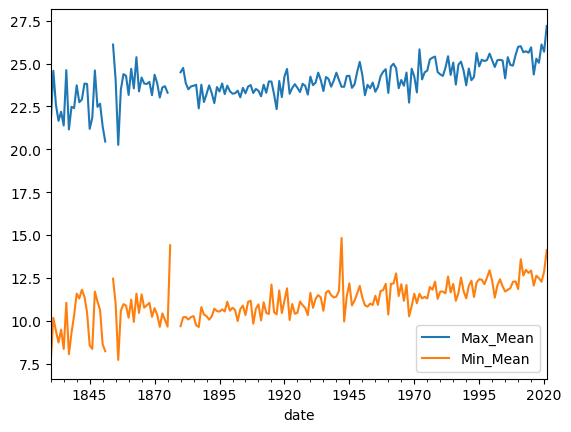

In [10]:
Mean_Data.resample('Y').mean().plot()


Now we look at each month


# Resample the data by month and calculate the mean
monthly_means_count = Mean_Data.resample('M').count()
monthly_means = Mean_Data.resample('M').mean()

# Filter out months with less than 8 days of data
monthly_means_filtered = monthly_means['Max_Mean'][monthly_means_count['Max_Mean'] >= 22]


In [13]:
#Lets do it in 2 stages
#The first stage is whether theres more then 11 days of missing data
monthly_means_count = Mean_Data.resample('M').count()
Total_Monthly_Count = [31,29 if Year % 4 == 0 else 28,31,30,31,30,31,31,30,31,30,31]

monthly_means_count_ind = monthly_means_count.reset_index()
Mean_Data_Mon_Manipulated = Mean_Data.copy()
for i in range(0, len(monthly_means_count_ind)):
    Year = monthly_means_count_ind.loc[i].loc['date'].year
    Total_Monthly_Count = [31,29 if Year % 4 == 0 else 28,31,30,31,30,31,31,30,31,30,31]
    Month = monthly_means_count_ind.loc[i].loc['date'].month
    Month_Value = Total_Monthly_Count[Month-1]
    Ava_Days_Mx = monthly_means_count_ind.loc[i].loc['Max_Mean']
    Ava_Days_Mn = monthly_means_count_ind.loc[i].loc['Min_Mean']
    if Ava_Days_Mx < Month_Value - 11:
        print(Year)
        print(Month)
        Mean_Data_Mon_Manipulated['Max_Mean'].loc['{}-{}'.format(Year, Month)] = np.nan
    if Ava_Days_Mn < Month_Value - 11:
        print(Year)
        print(Month)
        Mean_Data_Mon_Manipulated['Min_Mean'].loc['{}-{}'.format(Year, Month)] = np.nan
        
        
#Now we have that we need to now check to see if consecutive days is 5 or more
Mean_Data_Mon_Manipulated_Cons = Mean_Data_Mon_Manipulated.copy()
monthly_means_count = Mean_Data_Mon_Manipulated_Cons.resample('M').count()
monthly_means_count_ind = monthly_means_count.reset_index()

for i in range(0, len(monthly_means_count_ind)):
    #Extract the year and month
    Month = monthly_means_count_ind.loc[i].loc['date'].month
    Year = monthly_means_count_ind.loc[i].loc['date'].year
    #Set the consec to 0
    Consec_NaNs = 0
    Consec_Max = 0


    #Extract the monthly data
    Data_Mx = Mean_Data_Mon_Manipulated_Cons['Max_Mean'].loc['{}-{}'.format(Year, Month)].reset_index()
    Data_Mn = Mean_Data_Mon_Manipulated_Cons['Min_Mean'].loc['{}-{}'.format(Year, Month)].reset_index()
    for i in range(0, len(Data_Mx)):
        if np.isnan(Data_Mx['Max_Mean'].loc[i]) == True:
            Consec_NaNs = Consec_NaNs + 1
        else:
            Consec_Check = Consec_NaNs 
            if Consec_Check >= Consec_Max:
                Consec_Max = Consec_Check
            Consec_NaNs = 0
    if Consec_Max >= 5:
        print(Year)
        print(Month)
        Mean_Data_Mon_Manipulated_Cons['Max_Mean'].loc['{}-{}'.format(Year, Month)] = np.nan
    #Set the consec to 0
    Consec_NaNs = 0
    Consec_Max = 0
    for i in range(0, len(Data_Mn)):
        if np.isnan(Data_Mn['Min_Mean'].loc[i]) == True:
            Consec_NaNs = Consec_NaNs + 1
        else:
            Consec_Check = Consec_NaNs 
            if Consec_Check >= Consec_Max:
                Consec_Max = Consec_Check
            Consec_NaNs = 0
    if Consec_Max >= 5:
        print(Year)
        print(Month)
        Mean_Data_Mon_Manipulated_Cons['Min_Mean'].loc['{}-{}'.format(Year, Month)] = np.nan

1830
4
1830
4
1832
3
1836
5
1836
5
1836
6
1836
6
1836
7
1836
7
1836
8
1836
8
1836
9
1836
9
1836
10
1836
10
1836
11
1836
11
1836
12
1836
12
1837
1
1837
1
1837
2
1837
2
1837
3
1837
3
1837
4
1837
4
1837
5
1837
5
1837
6
1837
6
1837
7
1837
7
1837
8
1837
8
1851
11
1851
11
1851
12
1851
12
1852
1
1852
1
1852
2
1852
2
1852
3
1852
3
1852
4
1852
4
1852
5
1852
5
1852
6
1852
6
1852
7
1852
7
1852
8
1852
8
1852
9
1852
9
1852
10
1852
10
1852
11
1852
11
1852
12
1852
12
1853
1
1853
1
1853
2
1853
2
1853
3
1853
3
1853
4
1853
4
1853
5
1853
5
1853
6
1853
6
1853
7
1853
7
1853
8
1853
8
1853
9
1853
9
1853
10
1853
10
1853
11
1853
11
1853
12
1853
12
1865
8
1865
8
1865
11
1865
11
1865
12
1865
12
1872
11
1872
11
1875
3
1875
3
1876
1
1876
1
1876
2
1876
2
1876
3
1876
3
1876
4
1876
4
1876
5
1876
5
1876
6
1876
6
1876
7
1876
7
1876
8
1876
8
1876
9
1876
9
1876
10
1876
10
1876
11
1876
11
1876
12
1876
12
1877
1
1877
1
1877
2
1877
2
1877
3
1877
3
1877
4
1877
4
1877
5
1877
5
1877
6
1877
6
1877
7
1877
7
1877
8
1877
8
1877
9


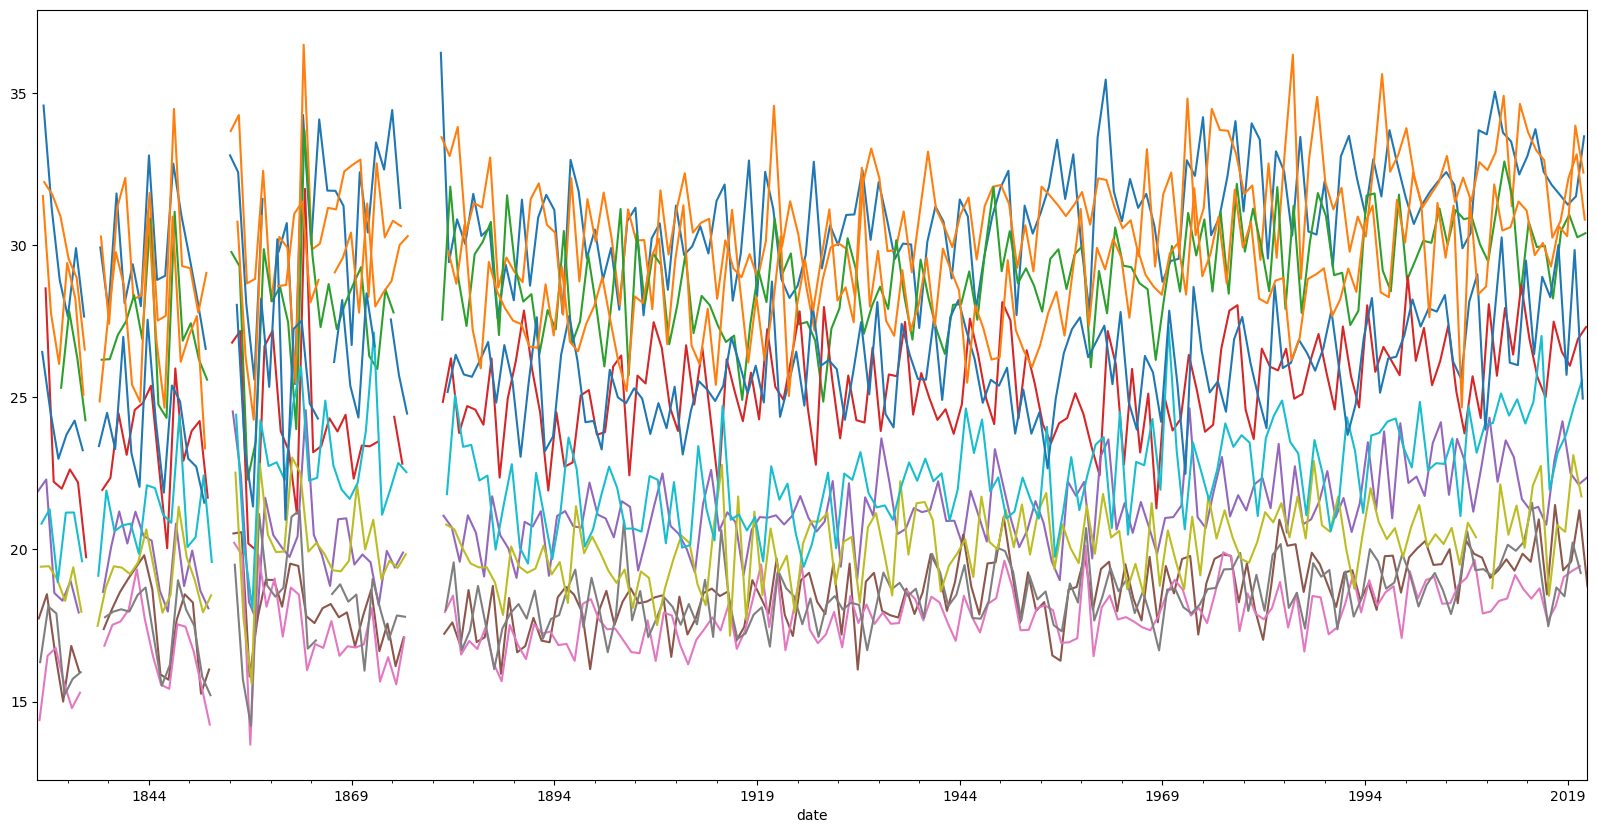

In [25]:
plt.figure(figsize = (20,10))
Monthly_Data = Mean_Data_Mon_Manipulated_Cons.resample('M', convention='start').mean()
for i in range(1,13):
    Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == i].plot()

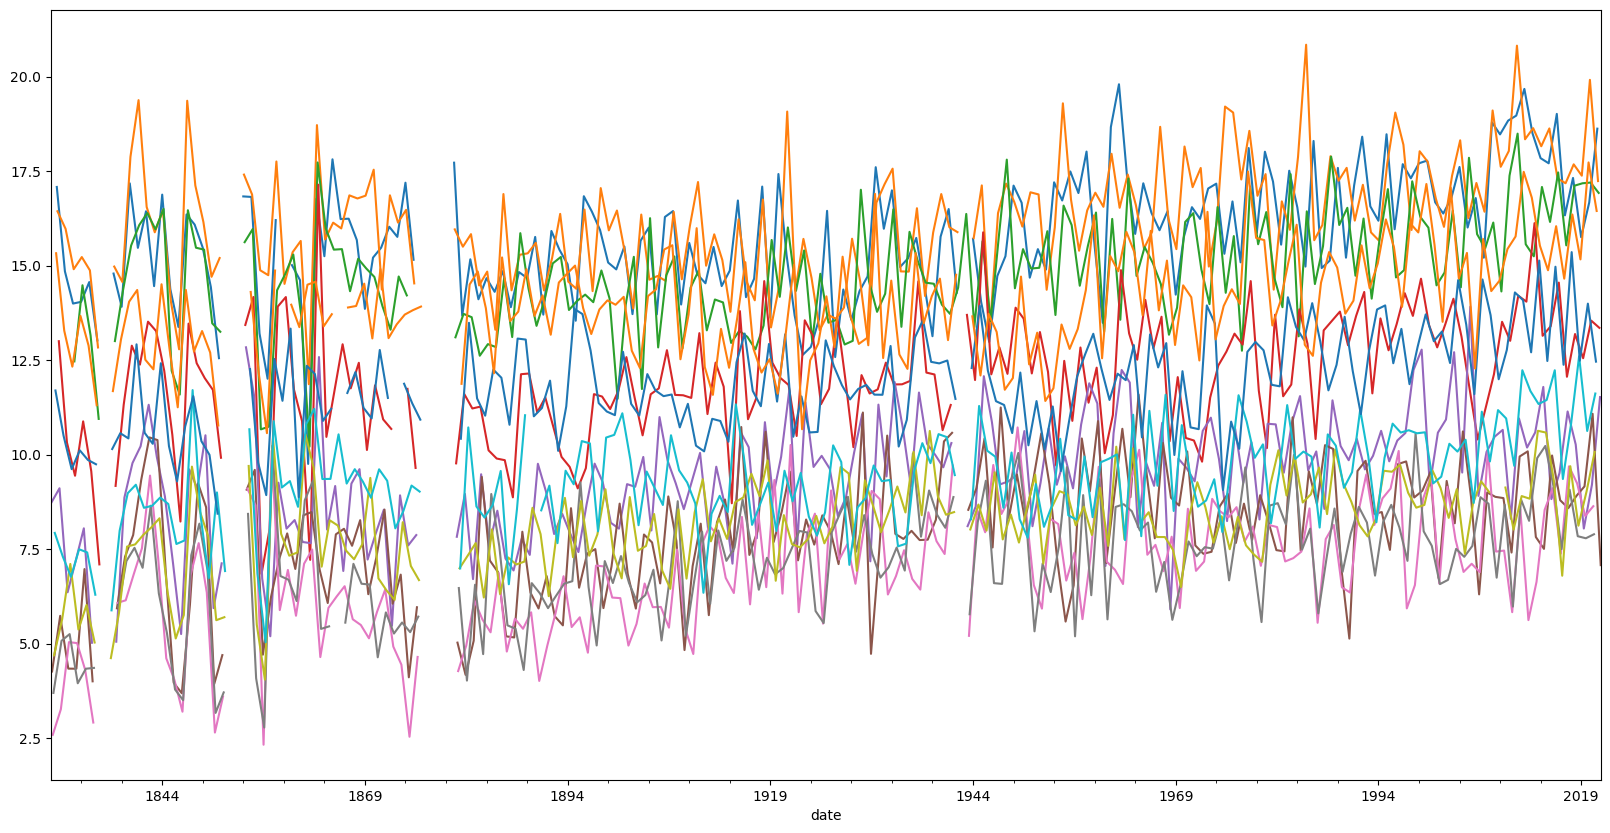

In [26]:
plt.figure(figsize = (20,10))
Monthly_Data = Mean_Data_Mon_Manipulated_Cons.resample('M', convention='start').mean()
for i in range(1,13):
    Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == i].plot()

Text(0, 0.5, 'Tempeture (degC)')

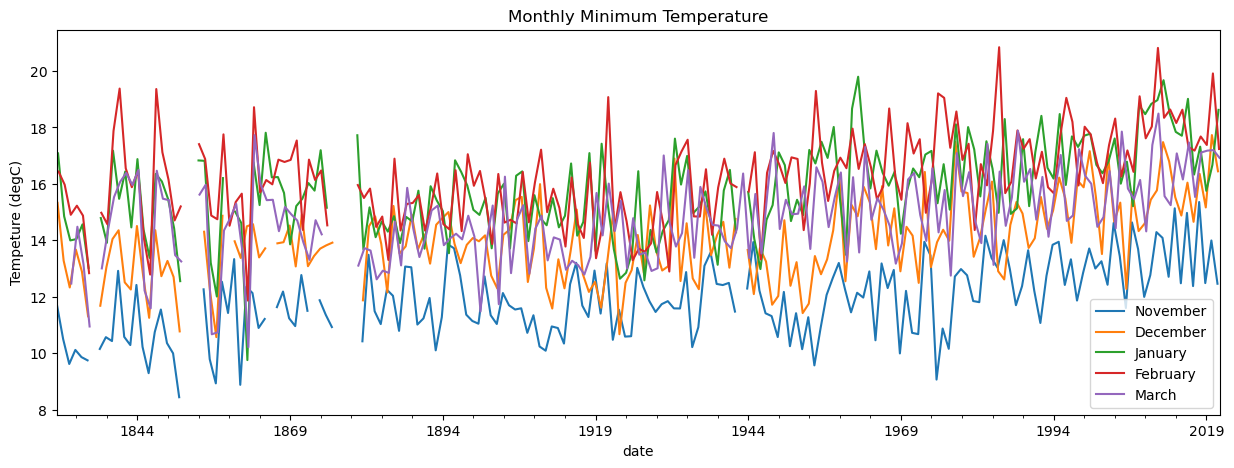

In [16]:
#Extended Summer Record
plt.figure(figsize = (15,5))
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 11].plot(label = "November")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 12].plot(label = "December")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 1].plot(label = "January")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 2].plot(label = "February")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 3].plot(label = "March")
plt.legend()
plt.title('Monthly Minimum Temperature')
plt.ylabel('Tempeture (degC)')

Text(0, 0.5, 'Tempeture (degC)')

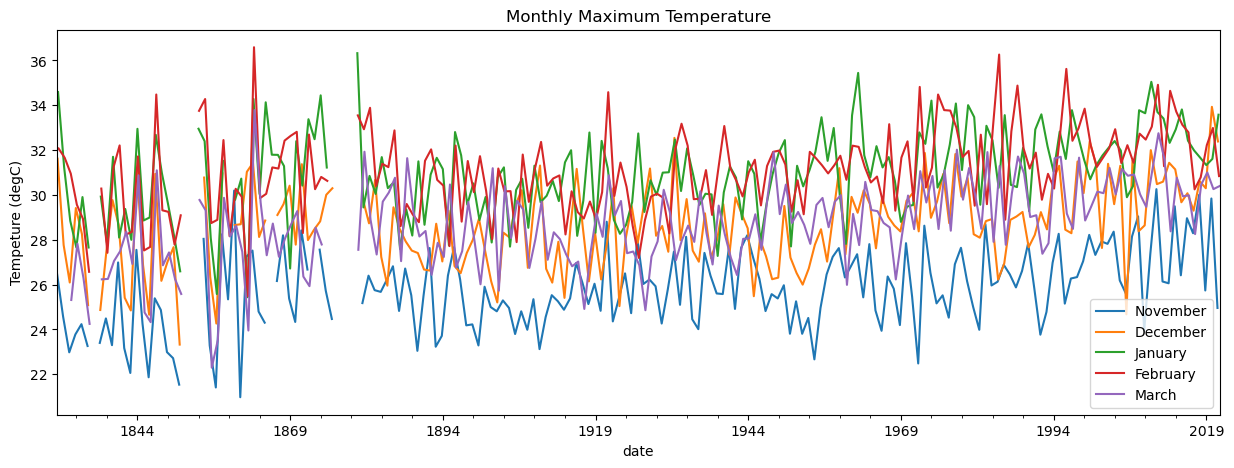

In [17]:
#Extended Summer Record
plt.figure(figsize = (15,5))
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 11].plot(label = "November")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 12].plot(label = "December")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 1].plot(label = "January")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 2].plot(label = "February")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 3].plot(label = "March")
plt.legend()
plt.title('Monthly Maximum Temperature')
plt.ylabel('Tempeture (degC)')

In [18]:
Monthly_Data['Max_Mean'].max()

36.59166666666667

In [19]:
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 1].head(60)

date
1831-01-31    34.592593
1832-01-31    31.228000
1833-01-31    28.845833
1834-01-31    27.655172
1835-01-31    29.906452
1836-01-31    27.656667
1837-01-31          NaN
1838-01-31    29.927586
1839-01-31    27.876000
1840-01-31    31.703704
1841-01-31    28.100000
1842-01-31    29.376667
1843-01-31    28.000000
1844-01-31    32.951613
1845-01-31    28.861290
1846-01-31    28.996667
1847-01-31    32.683333
1848-01-31    30.977778
1849-01-31    29.607143
1850-01-31    28.174194
1851-01-31    26.593548
1852-01-31          NaN
1853-01-31          NaN
1854-01-31    32.954839
1855-01-31    32.400000
1856-01-31    28.083333
1857-01-31    25.581481
1858-01-31    31.521739
1859-01-31          NaN
1860-01-31    29.796000
1861-01-31    30.728571
1862-01-31    25.437500
1863-01-31    34.282759
1864-01-31    30.041935
1865-01-31    34.134615
1866-01-31    31.796296
1867-01-31    31.788889
1868-01-31    31.288889
1869-01-31    26.719231
1870-01-31    32.400000
1871-01-31    30.419231
1872-01-31 

In [69]:
Mean_Data_Mon_Manipulated_Cons['Max_Mean'].loc['1863-2'][Mean_Data_Mon_Manipulated_Cons['Max_Mean'].loc['1863-2'] > 35]

date
1863-02-04    38.5
1863-02-05    39.3
1863-02-06    36.0
1863-02-07    35.5
1863-02-09    39.8
1863-02-10    38.5
1863-02-11    37.8
1863-02-12    43.6
1863-02-13    40.5
1863-02-14    36.7
1863-02-16    37.8
1863-02-18    36.0
1863-02-19    37.0
1863-02-24    35.1
1863-02-25    37.8
1863-02-26    40.5
1863-02-27    42.1
1863-02-28    38.8
Name: Max_Mean, dtype: float64

Text(0, 0.5, 'Tempeture (degC)')

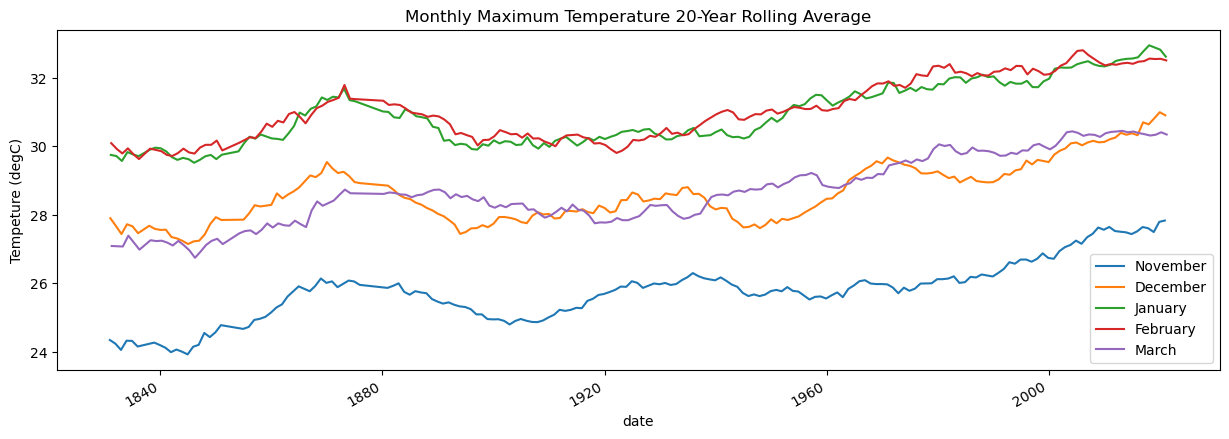

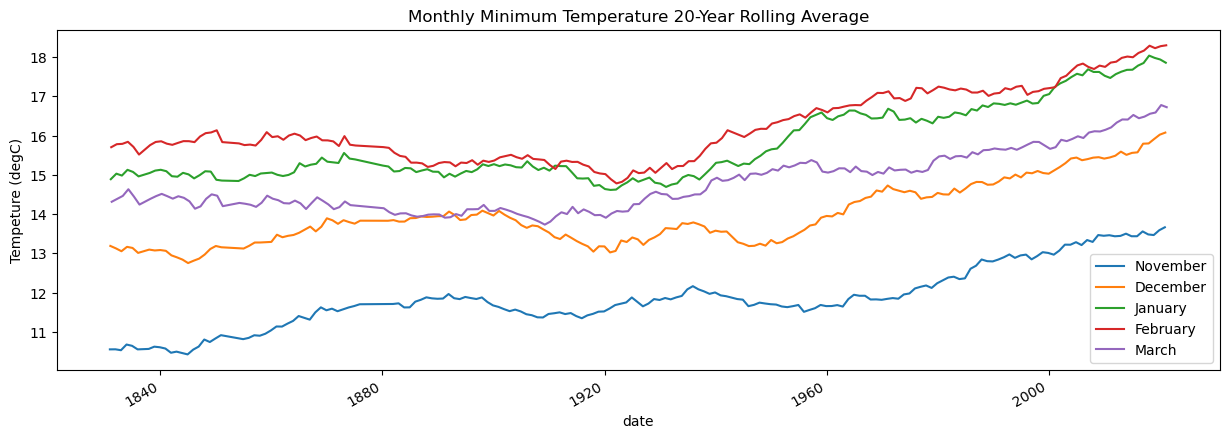

In [21]:
w = 20
plt.figure(figsize = (15,5))
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 11].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "November")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 12].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "December")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 1].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "January")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 2].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "February")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 3].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "March")
plt.legend()
plt.title('Monthly Maximum Temperature 20-Year Rolling Average')
plt.ylabel('Tempeture (degC)')
plt.figure(figsize = (15,5))
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 11].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "November")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 12].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "December")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 1].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "January")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 2].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "February")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 3].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "March")
plt.legend()
plt.title('Monthly Minimum Temperature 20-Year Rolling Average')
plt.ylabel('Tempeture (degC)')

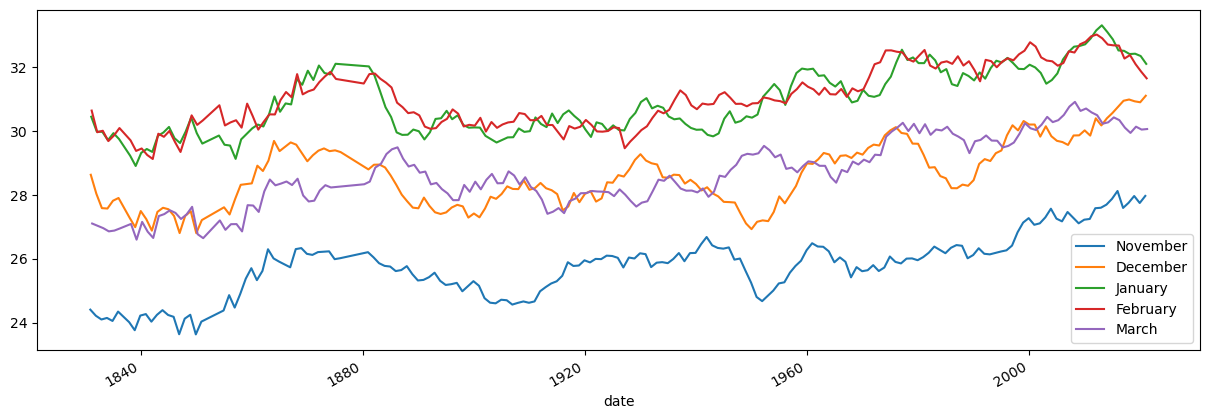

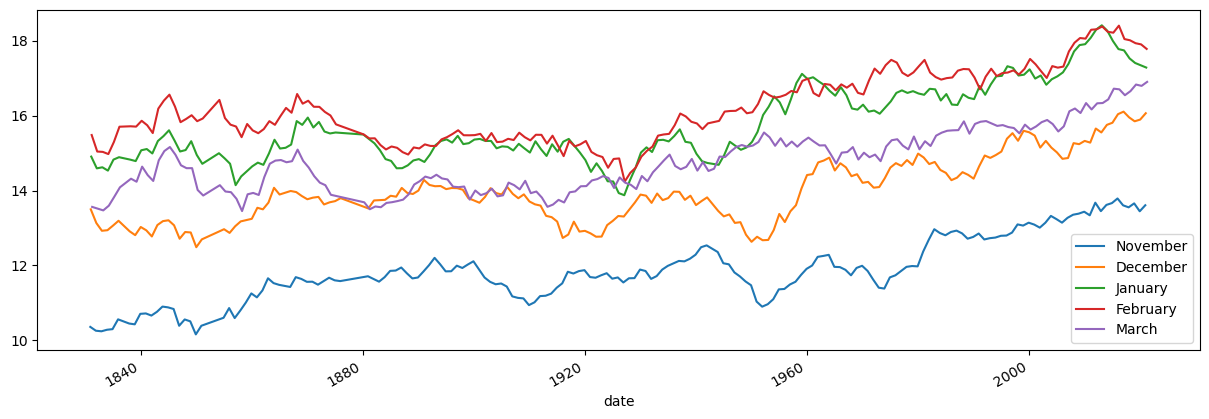

In [22]:
w = 10
plt.figure(figsize = (15,5))
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 11].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "November")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 12].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "December")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 1].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "January")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 2].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "February")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 3].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "March")
plt.legend()
plt.figure(figsize = (15,5))
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 11].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "November")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 12].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "December")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 1].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "January")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 2].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "February")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 3].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "March")
plt.legend()

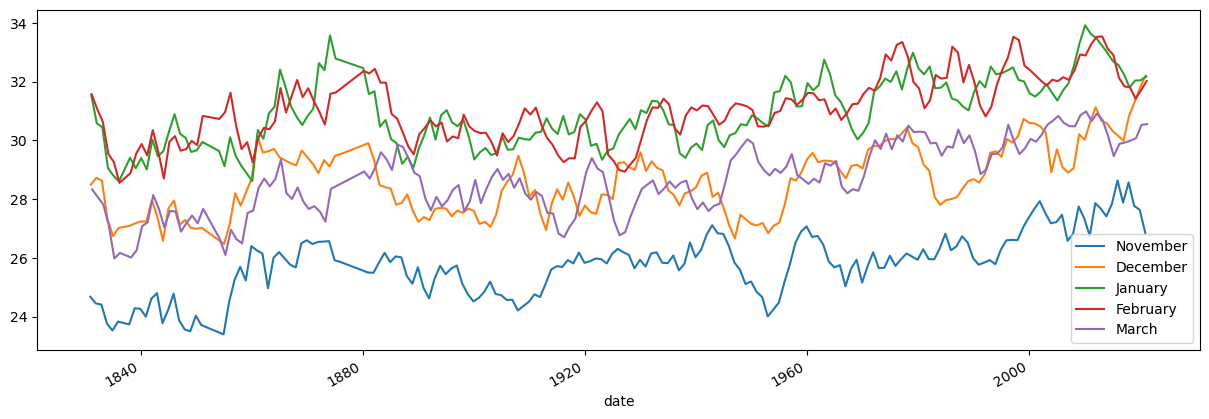

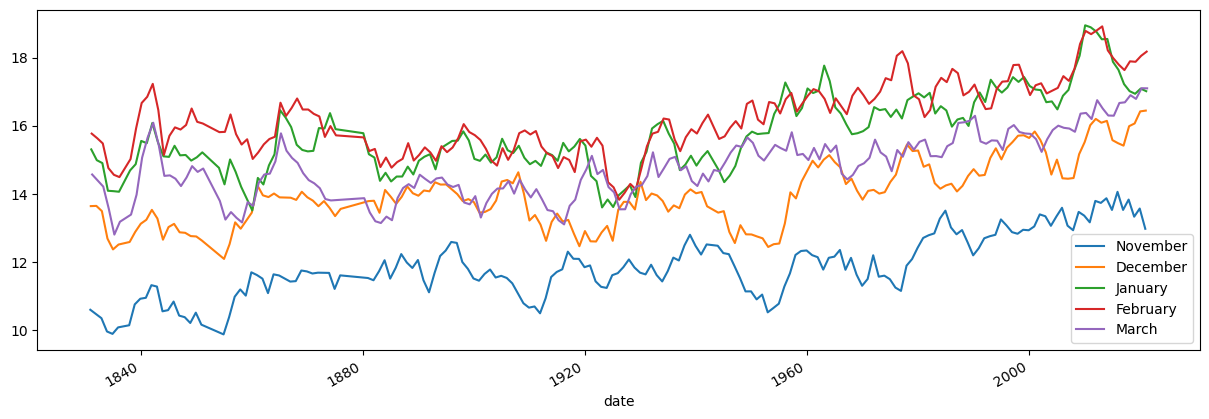

In [23]:
w = 5
plt.figure(figsize = (15,5))
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 11].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "November")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 12].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "December")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 1].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "January")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 2].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "February")
Monthly_Data['Max_Mean'].loc[Monthly_Data.index.month == 3].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "March")
plt.legend()
plt.figure(figsize = (15,5))
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 11].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "November")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 12].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "December")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 1].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "January")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 2].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "February")
Monthly_Data['Min_Mean'].loc[Monthly_Data.index.month == 3].dropna().rolling(window=w, min_periods=1,center = True).mean().plot(label = "March")
plt.legend()

# Analysis on the Extended Summer Record 

From this I can identify the first extrmee 18 days above 35C in 1863 but checking newspaper sources, I have not been able to conclude whether there is any information on this period to indicate that this was a hot period event which in turn would most liekly be a massive heatwave period unforseen in those times. Surprisngly we do see that the average for this period is the highest of all time comapred to the rest of the record, but we need to recognise that even though I have adhered to the BOMs standards this only is limited ot the data we have and it could quite possibly be a misread of the thermeter, a broken thermometer or even a location change/thermoeter change, we do not know the possibility of what may have happened this period. But it is improtant to note that with Lindens and Joelles research into writing these temperature estimations down, that they were quality chekced to the best avaliable and that it would nto just be due to the simple regression method of the tmax estimation or even the Q-Q for this old data, there is quite a high possibility that something else is at play here,

https://trove.nla.gov.au/search/advanced/category/newspapers?l-advArtType=newspapers&l-advcategory=Weather&l-advstate=Western%20Australia&date.from=1863-02-01&date.to=2021-12-31&startPos=0&sortBy=dateAsc

A historical climate dataset for southwestern Australia,1830–1875:
"There is also little informa-tion on the instruments used to take the temperature and pressure observations. However, on May 23, 1863 it was noted that a Troughton and Simms thermometer replaced the old instrumentation. Temperature observa-tions were then made using both the old and new ther-mometer  for  6 weeks,  suggesting  the  observer attempted  to  quantify  the bias  introduced  by the malfunctioning thermometer"
"The biases associated with the malfunctioningthermometer begin to be obvious during the year 1862.As the precise date could not be identified, we take a con-servative approach of correcting the temperature observa-tions from January 1, 1862"

The paper suggest that the old thermometer was broken which was expected from th9s

Looking at a smoothed average we notice something quite intersting, we see a increase in temperature in temperature on a smoothed 20 year average after 1840 before consitantly across the extended summer dropping again to lower temperatures with a minimum around 1900/1910 before we see a consistent rise in temperature by both tmax and tmin from 1920 onwards and these can be seen in the shorter term, but are much noisier. An interesting perud is a sharp decline in the minimum temperature in 1920-1930 which is consistent in the months of Jan to Mar which I do find fascinating, is that due to missing data within that period, I am not sure I will have to assess that at a later date.

Another interesting and above average month is January 1880 here the temperautre is only 0.4 of a degree less then the 1863 Feb month average, I do not have access to this take but I do expect that this may be a result of the observations and maybe a broken temperature, but unless I have more information on this I cannot predict what the reason is behind it. For the 1863 we have evidence that the thermoteter was nbroken therefore the tremperature transcribed for th January thorugh to MAAY OR EVEN BEFORE JANURARY WOULD AHVE BEEN MCOOLER THEN THEY WERE have most likely been transcribed from

It could also be of interest that the first period of the 1880s was warmer then expected and this could ahbe been due tot he result of incorrect thermoters overestimating the temperatures or something else


Max_Mean   Min_Mean
date                            
1863-02-28  36.591667  18.716667

# Overview of the Annual Temperature, similar to that of the MOnhtly using the WMO rules

Max_Mean   Min_Mean
date                            
1830-04-30        NaN        NaN
1830-05-31  21.924138   8.732258
1830-06-30  17.737037   4.263333
1830-07-31  14.392857   2.587097
1830-08-31  16.296154   3.696667
...               ...        ...
2021-02-28  30.842857  17.235714
2021-03-31  30.396774  16.922581
2021-04-30  27.313333  13.353333
2021-05-31  22.358065  11.522581
2021-06-30  18.786667   7.076667

[2295 rows x 2 columns]

In [70]:
#Lets do it in 2 stages
#The first stage is whether theres more then 7 months avalible, if there is accept it, the secodn crtierai will remove the 
#average out
yearly_means_count = Monthly_Data.resample('Y').count()

yearly_means_count_ind = yearly_means_count.reset_index()
Monthly_Data_Mon_Manipulated = Monthly_Data.copy()
for i in range(0, len(yearly_means_count_ind)):
    Year = yearly_means_count_ind.loc[i].loc['date'].year
    Ava_Month_Mx = yearly_means_count_ind.loc[i].loc['Max_Mean']
    Ava_Month_Mn = yearly_means_count_ind.loc[i].loc['Min_Mean']
    if Ava_Month_Mx < 7:
        print(Year)
        Monthly_Data_Mon_Manipulated['Max_Mean'].loc['{}'.format(Year)] = np.nan
    if Ava_Month_Mn < 7:
        print(Year)
        Monthly_Data_Mon_Manipulated['Min_Mean'].loc['{}'.format(Year)] = np.nan
        
        
#Now we have that we need to now check to see if consecutive days is 3 or more
Monthly_Data_Mon_Manipulated_Cons = Monthly_Data_Mon_Manipulated.copy()
yearly_means_count = Monthly_Data_Mon_Manipulated_Cons.resample('M').count()
yearly_means_count_ind = yearly_means_count.reset_index()

for i in range(0, len(yearly_means_count_ind)):
    #Extract the year and month
    Year = yearly_means_count_ind.loc[i].loc['date'].year
    #Set the consec to 0
    Consec_NaNs = 0
    Consec_Max = 0


    #Extract the monthly data
    Data_Mx = Monthly_Data_Mon_Manipulated_Cons['Max_Mean'].loc['{}'.format(Year)].reset_index()
    Data_Mn = Monthly_Data_Mon_Manipulated_Cons['Min_Mean'].loc['{}'.format(Year)].reset_index()
    for i in range(0, len(Data_Mx)):
        if np.isnan(Data_Mx['Max_Mean'].loc[i]) == True:
            Consec_NaNs = Consec_NaNs + 1
        else:
            Consec_Check = Consec_NaNs 
            if Consec_Check >= Consec_Max:
                Consec_Max = Consec_Check
            Consec_NaNs = 0
    if Consec_Max >= 3:
        print(Year)
        Monthly_Data_Mon_Manipulated_Cons['Max_Mean'].loc['{}'.format(Year)] = np.nan
    #Set the consec to 0
    Consec_NaNs = 0
    Consec_Max = 0
    for i in range(0, len(Data_Mn)):
        if np.isnan(Data_Mn['Min_Mean'].loc[i]) == True:
            Consec_NaNs = Consec_NaNs + 1
        else:
            Consec_Check = Consec_NaNs 
            if Consec_Check >= Consec_Max:
                Consec_Max = Consec_Check
            Consec_NaNs = 0
    if Consec_Max >= 3:
        print(Year)
        Monthly_Data_Mon_Manipulated_Cons['Min_Mean'].loc['{}'.format(Year)] = np.nan

1830
1830
1836
1836
1837
1837
1852
1852
1853
1853
1865
1865
1876
1876
1877
1877
1878
1878
1879
1879
1942
2021
2021


Text(0, 0.5, 'Temperature degC')

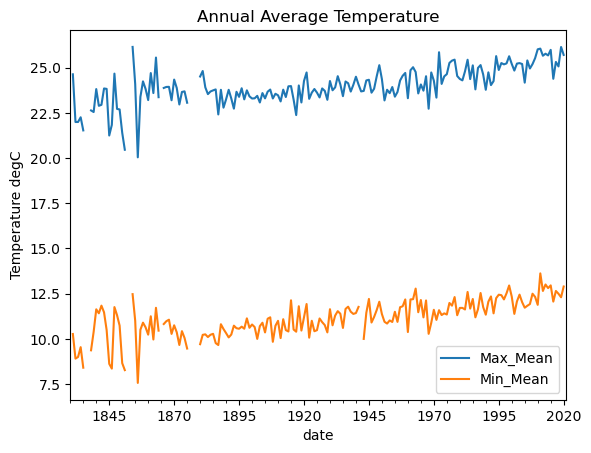

In [71]:
Monthly_Data_Mon_Manipulated_Cons.resample('Y').mean().plot()
plt.title('Annual Average Temperature')
plt.ylabel('Temperature degC')

In [66]:
Monthly_Data_Mon_Manipulated_Cons.resample('Y').mean().head(50)

Max_Mean   Min_Mean
date                            
1830-12-31  21.093389   7.365632
1831-12-31  24.638484  10.266729
1832-12-31  21.998615   8.904394
1833-12-31  22.000282   8.996174
1834-12-31  22.260429   9.539355
1835-12-31  21.534020   8.401889
1836-12-31        NaN        NaN
1837-12-31        NaN        NaN
1838-12-31  22.638616   9.364313
1839-12-31  22.550913  10.387875
1840-12-31  23.820643  11.632767
1841-12-31  22.894625  11.411846
1842-12-31  22.950751  11.835607
1843-12-31  23.855060  11.465899
1844-12-31  23.831508  10.488229
1845-12-31  21.251918   8.616065
1846-12-31  21.839766   8.351103
1847-12-31  24.676676  11.757361
1848-12-31  22.724831  11.312056
1849-12-31  22.694214  10.729833
1850-12-31  21.404703   8.653393
1851-12-31  20.463211   8.266954
1852-12-31        NaN        NaN
1853-12-31        NaN        NaN
1854-12-31  26.154011  12.472214
1855-12-31  24.095479  11.000400
1856-12-31  20.044152   7.559280
1857-12-31  23.387481  10.500565
1858-12-31  24.248051  10.894978
1859-12-31  23.828018  10.634753
1860-12-31  23.213626  10.230581
1861-12-31  24.706770  11.247181
1862-12-31  23.600459   9.962403
1863-12-31  25.566001  11.717079
1864-12-31  23.372523  10.452912
1865-12-31  23.809541  11.447154
1866-12-31  23.883127  10.818803
1867-12-31  23.938864  10.976003
1868-12-31  23.945667  11.057847
1869-12-31  23.203051  10.271996
1870-12-31  24.347172  10.748199
1871-12-31  23.883562  10.361696
1872-12-31  22.967559   9.658150
1873-12-31  23.661988  10.424059
1874-12-31  23.695224  10.048240
1875-12-31  23.065381   9.461246
1876-12-31        NaN        NaN
1877-12-31        NaN        NaN
1878-12-31        NaN        NaN
1879-12-31        NaN        NaN

#What we see is a wild swing of temperatures in the 1854 to 1856 range however looking througj the paper described above for this dataset they have not identified any issue with this part of the dataset and the only thing that has been spoken about is. therefore I cannot conclude to anything as it could a result of the climate, the person reading the values, thermometer was not working propoerly and it was failed to be mentioned in the meta data, there are all the possibilities

# Now the development of 5 year Segment PDFs

Now using the original data set, we want to work on creating the PDFs of the extended summer season for a 5 year average, provided we acheive a % of 80%

In [79]:
Daily_data = Mean_Data.reset_index().copy()

<AxesSubplot:xlabel='date'>

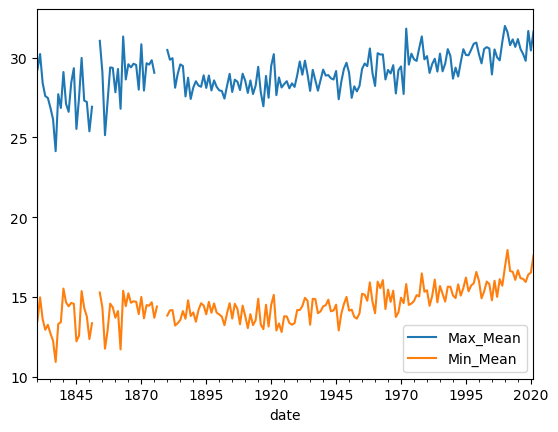

In [96]:
Right = Daily_data[Daily_data['date'].dt.month >= 11]
Left = Daily_data[Daily_data['date'].dt.month <= 3]

Extended_Summer_Season =  pd.concat([Left,Right],axis=0)

Extended_Summer_Season.set_index('date').resample('Y').mean().plot()

In [103]:
Extended_Summer_Season = Extended_Summer_Season.set_index('date')

In [180]:
#Pass the 85% test

Date = 2004
nonnan = Extended_Summer_Season.loc["{}-11".format(Date):"{}-10".format(Date+5)].count()
allL = len(Extended_Summer_Season.loc["{}-11".format(Date):"{}-10".format(Date+5)])
nonnan/allL

Max_Mean    1.0
Min_Mean    1.0
dtype: float64

In [294]:
Seg_1830_1835 =  Extended_Summer_Season.loc["1830-11":"1835-10"]
Seg_1835_1840 =  Extended_Summer_Season.loc["1835-11":"1840-10"]
Seg_1840_1845 =  Extended_Summer_Season.loc["1840-11":"1845-10"]
Seg_1845_1850 =  Extended_Summer_Season.loc["1845-11":"1850-10"]
Seg_1854_1859 =  Extended_Summer_Season.loc["1854-11":"1859-10"]
Seg_1859_1864 =  Extended_Summer_Season.loc["1859-11":"1864-10"]
Seg_1879_1884 =  Extended_Summer_Season.loc["1879-11":"1884-10"]
Seg_1884_1889 =  Extended_Summer_Season.loc["1884-11":"1889-10"]
Seg_1889_1894 =  Extended_Summer_Season.loc["1889-11":"1894-10"]
Seg_1894_1899 =  Extended_Summer_Season.loc["1894-11":"1899-10"]
Seg_1899_1904 =  Extended_Summer_Season.loc["1899-11":"1904-10"]
Seg_1904_1909 =  Extended_Summer_Season.loc["1904-11":"1909-10"]
Seg_1909_1914 =  Extended_Summer_Season.loc["1909-11":"1914-10"]
Seg_1914_1919 =  Extended_Summer_Season.loc["1914-11":"1919-10"]
Seg_1919_1924 =  Extended_Summer_Season.loc["1919-11":"1924-10"]
Seg_1924_1929 =  Extended_Summer_Season.loc["1924-11":"1929-10"]
Seg_1929_1934 =  Extended_Summer_Season.loc["1929-11":"1934-10"]
Seg_1934_1939 =  Extended_Summer_Season.loc["1934-11":"1939-10"]
Seg_1939_1944 =  Extended_Summer_Season.loc["1939-11":"1944-10"]
Seg_1944_1949 =  Extended_Summer_Season.loc["1944-11":"1949-10"]
Seg_1949_1954 =  Extended_Summer_Season.loc["1949-11":"1954-10"]
Seg_1954_1959 =  Extended_Summer_Season.loc["1954-11":"1959-10"]
Seg_1959_1964 =  Extended_Summer_Season.loc["1959-11":"1964-10"]
Seg_1964_1969 =  Extended_Summer_Season.loc["1964-11":"1969-10"]
Seg_1969_1974 =  Extended_Summer_Season.loc["1969-11":"1974-10"]
Seg_1974_1979 =  Extended_Summer_Season.loc["1974-11":"1979-10"]
Seg_1979_1984 =  Extended_Summer_Season.loc["1979-11":"1984-10"]
Seg_1984_1989 =  Extended_Summer_Season.loc["1984-11":"1989-10"]
Seg_1989_1994 =  Extended_Summer_Season.loc["1989-11":"1994-10"]
Seg_1994_1999 =  Extended_Summer_Season.loc["1994-11":"1999-10"]
Seg_1999_2004 =  Extended_Summer_Season.loc["1999-11":"2004-10"]
Seg_2004_2009 =  Extended_Summer_Season.loc["2004-11":"2009-10"]
Seg_2009_2014 =  Extended_Summer_Season.loc["2009-11":"2014-10"]
Seg_2014_2019 =  Extended_Summer_Season.loc["2014-11":"2019-10"]





Max = [Seg_1830_1835, 
Seg_1835_1840,
Seg_1840_1845,
Seg_1845_1850,
Seg_1854_1859,
Seg_1859_1864 ,
Seg_1879_1884,
Seg_1884_1889 ,
Seg_1889_1894 ,
Seg_1894_1899 ,
Seg_1899_1904,
Seg_1904_1909 ,
Seg_1909_1914 ,
Seg_1914_1919 ,
Seg_1919_1924 ,
Seg_1924_1929,
Seg_1929_1934,
Seg_1934_1939,
Seg_1939_1944,
Seg_1944_1949,
Seg_1949_1954,
Seg_1954_1959,
Seg_1959_1964,
Seg_1964_1969,
Seg_1969_1974,
Seg_1974_1979,
Seg_1979_1984,
Seg_1984_1989,
Seg_1989_1994,
Seg_1994_1999,
Seg_1999_2004,
Seg_2004_2009,
Seg_2009_2014,
Seg_2014_2019]



Min = [Seg_1830_1835, 
Seg_1835_1840,
Seg_1840_1845,
Seg_1845_1850,
Seg_1854_1859,
Seg_1859_1864 ,
Seg_1879_1884,
Seg_1884_1889 ,
Seg_1889_1894 ,
Seg_1894_1899 ,
Seg_1899_1904,
Seg_1904_1909 ,
Seg_1909_1914 ,
Seg_1914_1919 ,
Seg_1919_1924 ,
Seg_1924_1929,
Seg_1929_1934,
Seg_1934_1939,
Seg_1944_1949,
Seg_1949_1954,
Seg_1954_1959,
Seg_1959_1964,
Seg_1964_1969,
Seg_1969_1974,
Seg_1974_1979,
Seg_1979_1984,
Seg_1984_1989,
Seg_1989_1994,
Seg_1994_1999,
Seg_1999_2004,
Seg_2004_2009,
Seg_2009_2014,
Seg_2014_2019]













Now I will need to use one to test how to present the distrubition of the data

In [295]:
Data_Set = 'Max_Mean'

Test = Seg_2014_2019[Data_Set]



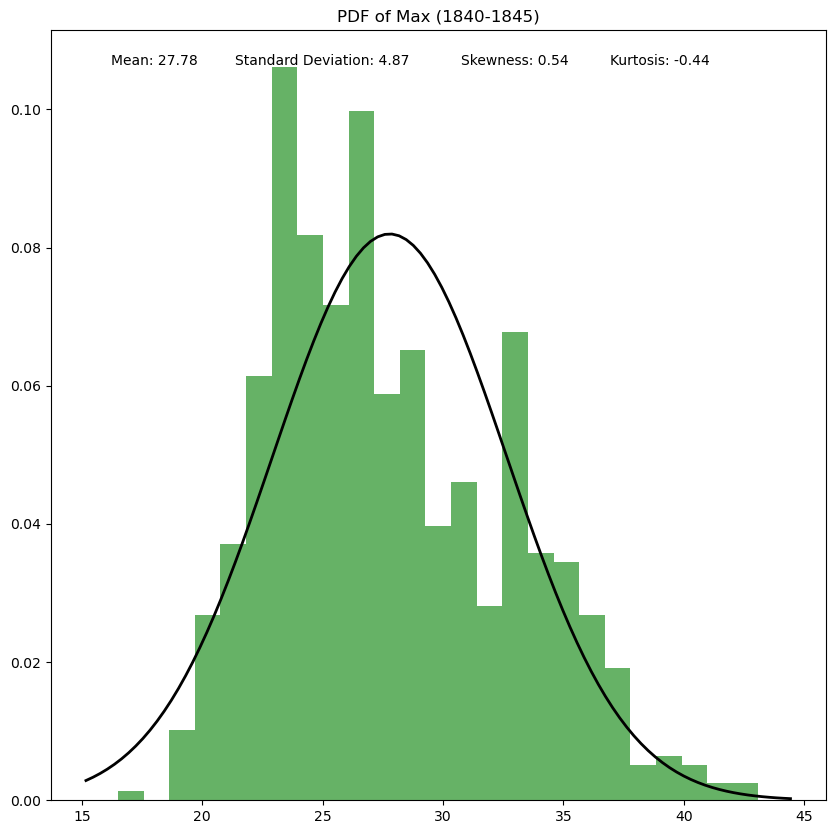

In [296]:
import numpy as np
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
plt.figure(figsize = (10,10))

import matplotlib.pyplot as plt
Data_Set = 'Max_Mean'

Test = Seg_1840_1845[Data_Set].dropna()

# Generate some data for this demonstration.
data = Test

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Importing library
from scipy.stats import skew
St_Y = Test.reset_index()['date'].dt.year.min()
St_E = Test.reset_index()['date'].dt.year.max()


Sk = skew(data, axis=0, bias=True)
Ku = kurtosis(data, axis=0, bias=True)
# Add annotations for statistical measures
plt.text(18, 0.106, f"Mean: {mu:.2f}", ha='center', va='bottom')
plt.text(25, 0.106, f"Standard Deviation: {std:.2f}", ha='center', va='bottom')
plt.text(33, 0.106, f"Skewness: {Sk:.2f}", ha='center', va='bottom')
plt.text(39, 0.106, f"Kurtosis: {Ku:.2f}", ha='center', va='bottom')

# Show the plot
title = "PDF of {} ({}-{})".format('Max',St_Y,St_E)
plt.title(title)

plt.show()



C:\Users\jarra\AppData\Local\Temp\ipykernel_18612\1451785812.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i,figsize = (10,10))


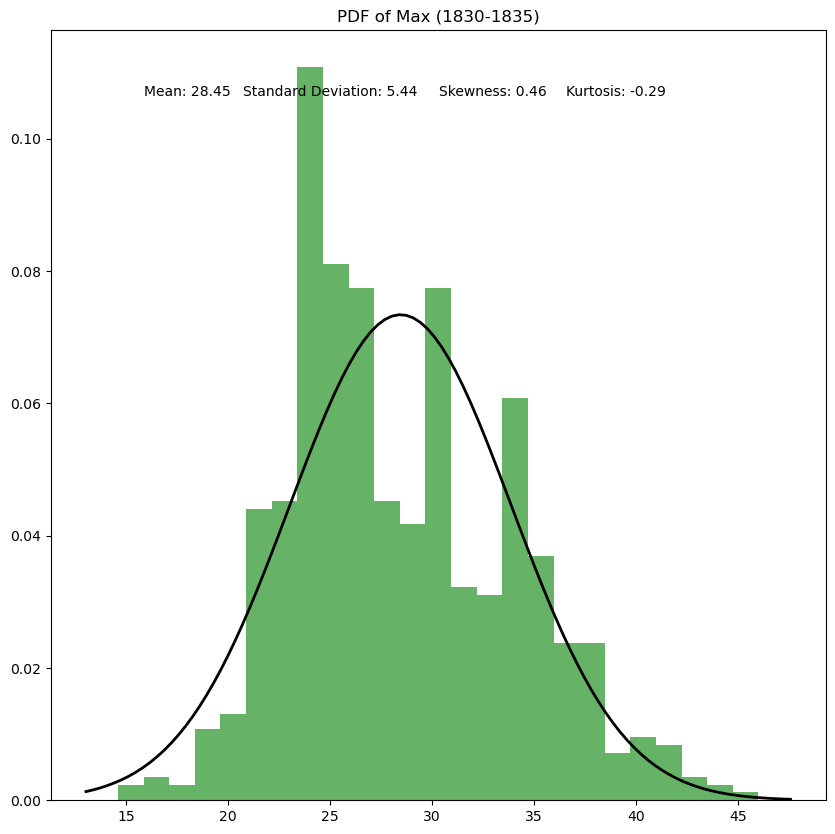

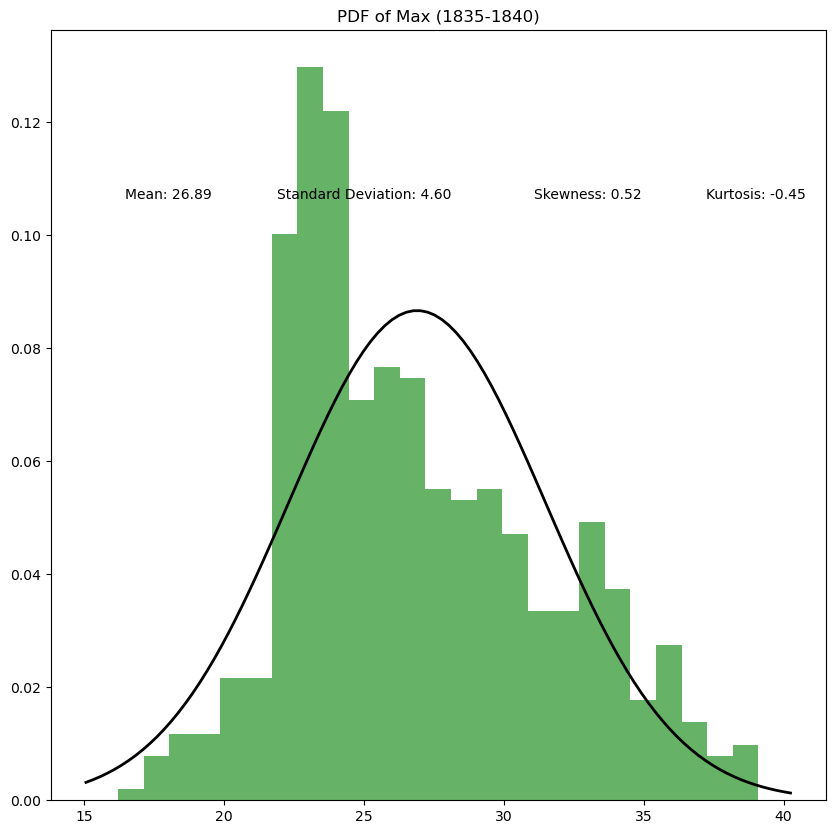

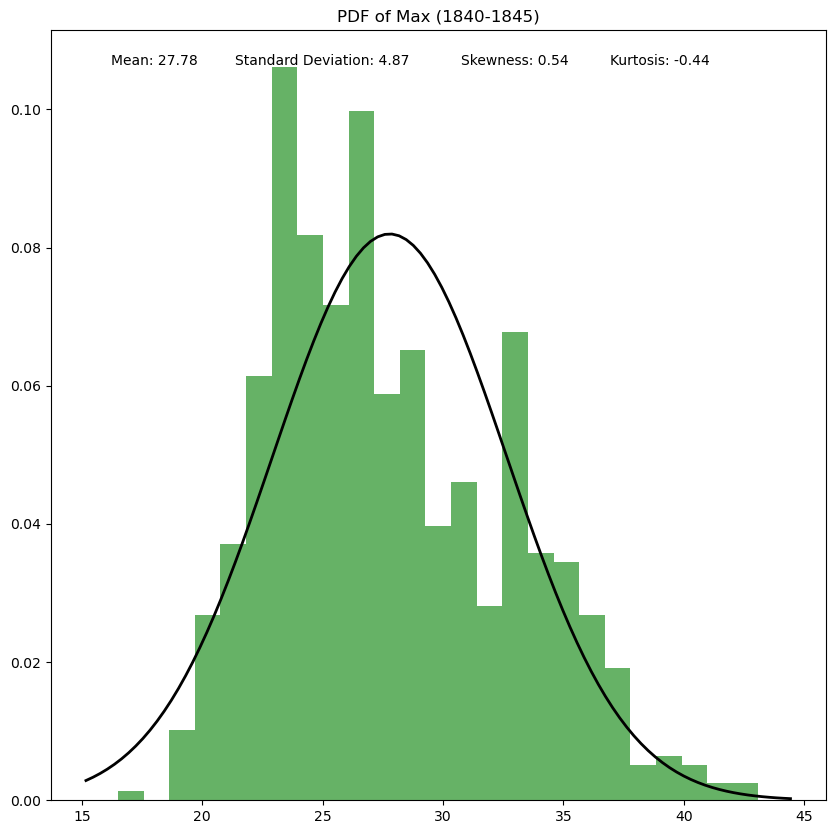

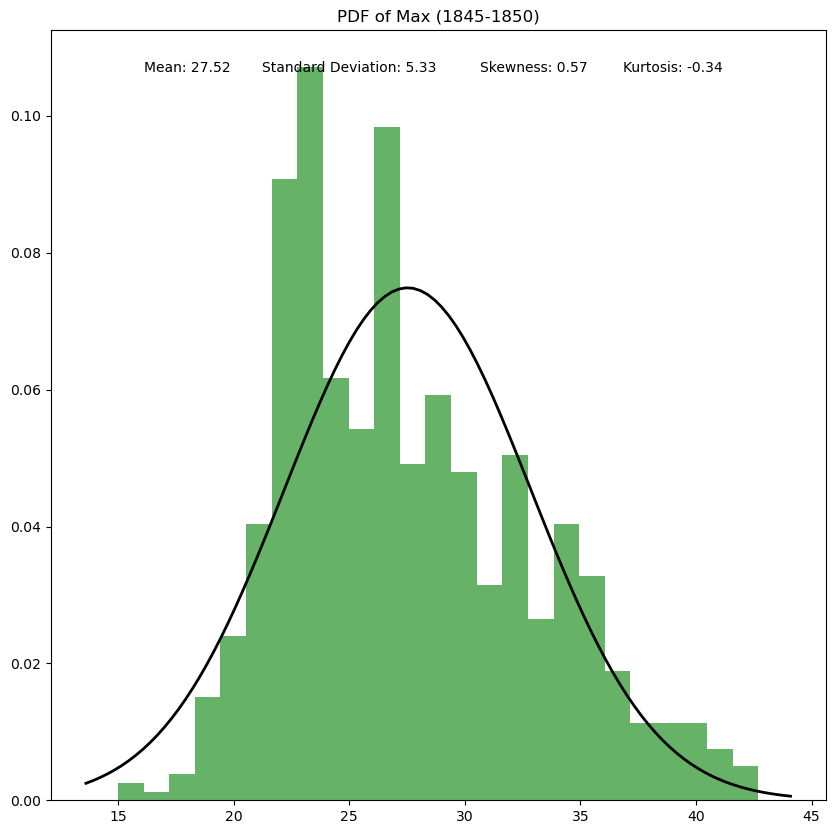

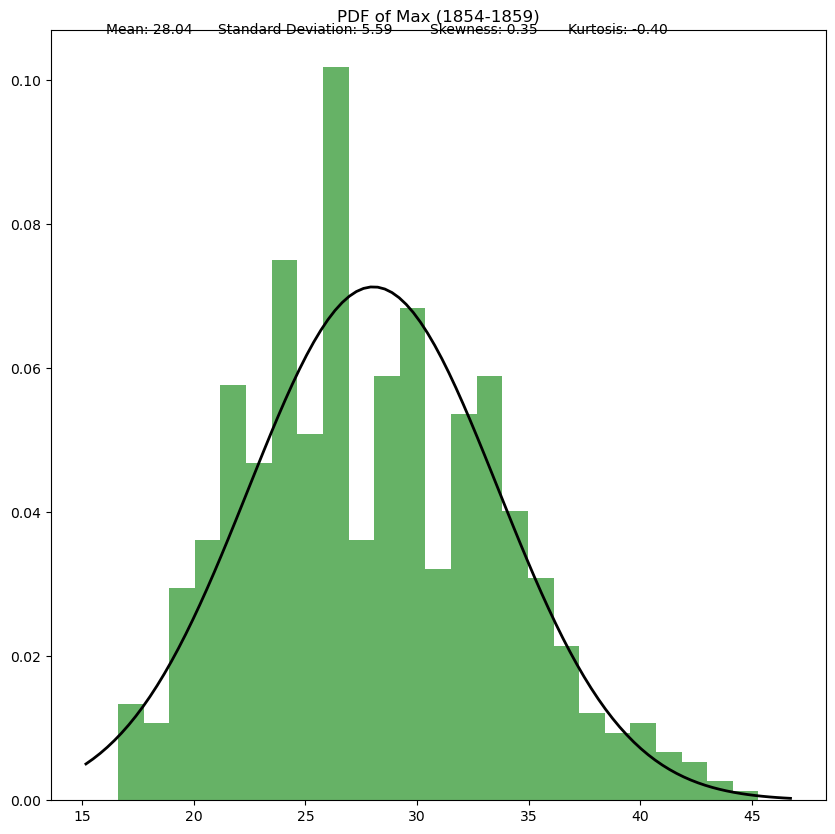

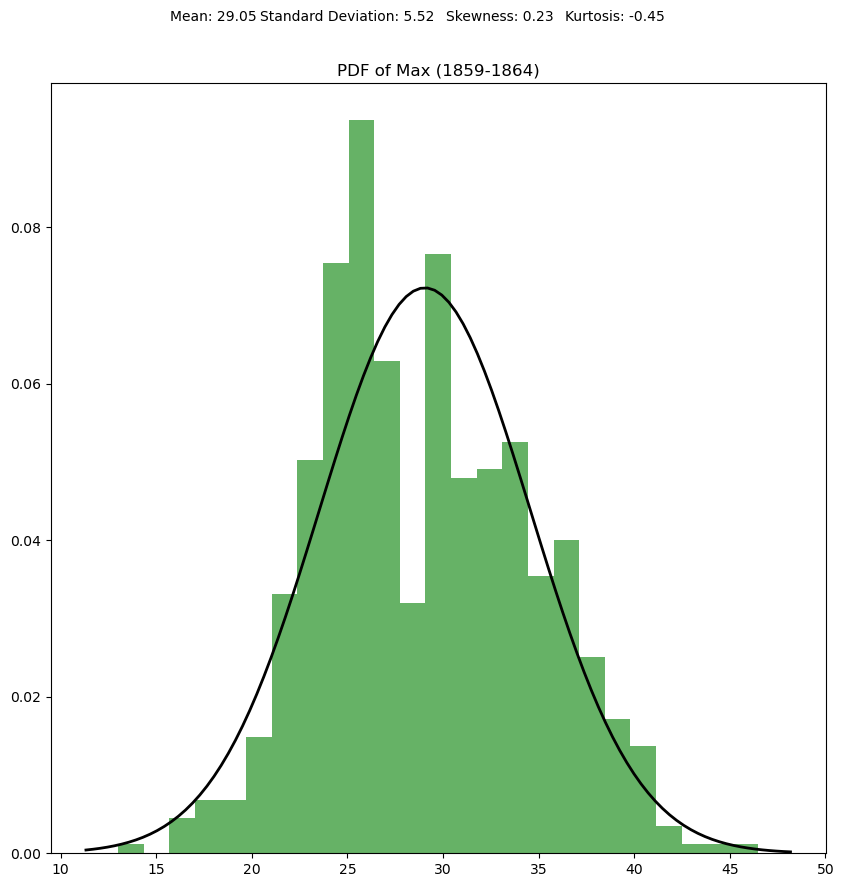

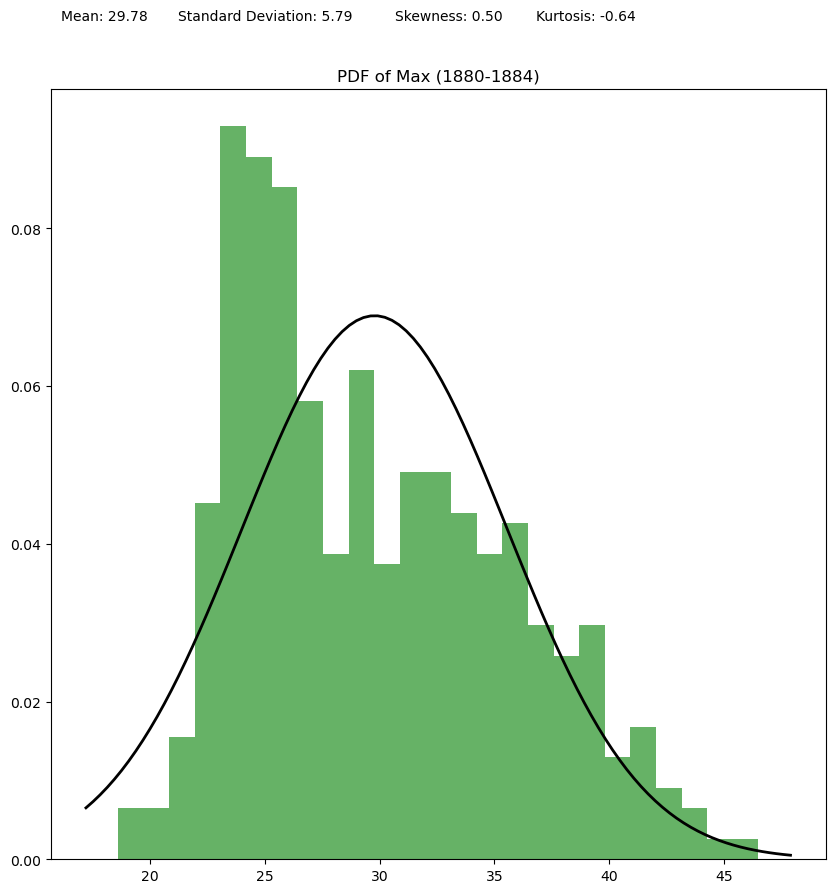

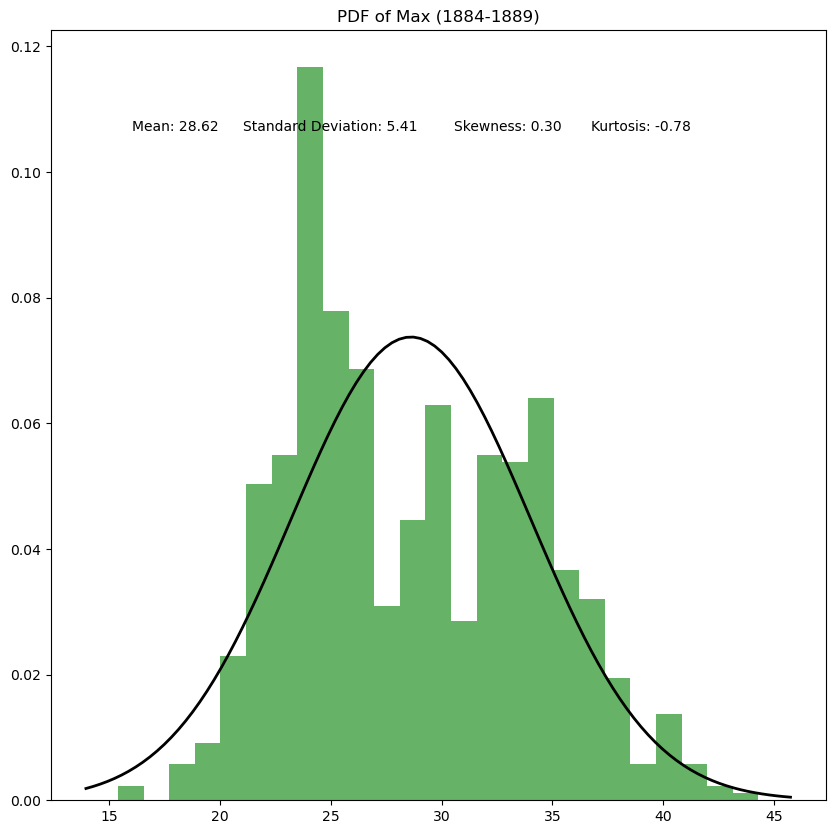

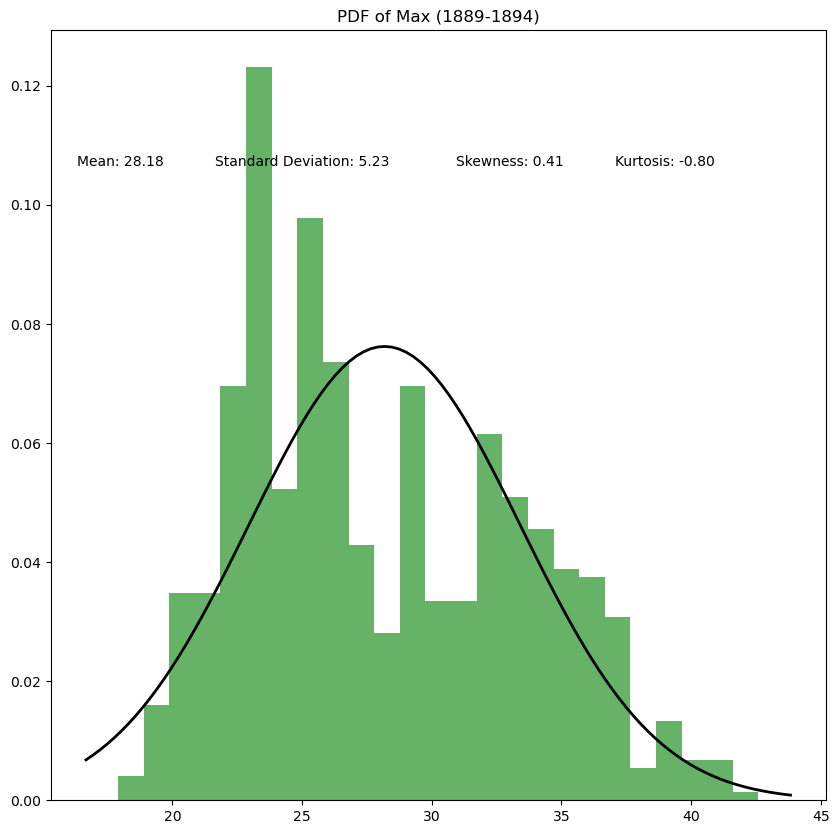

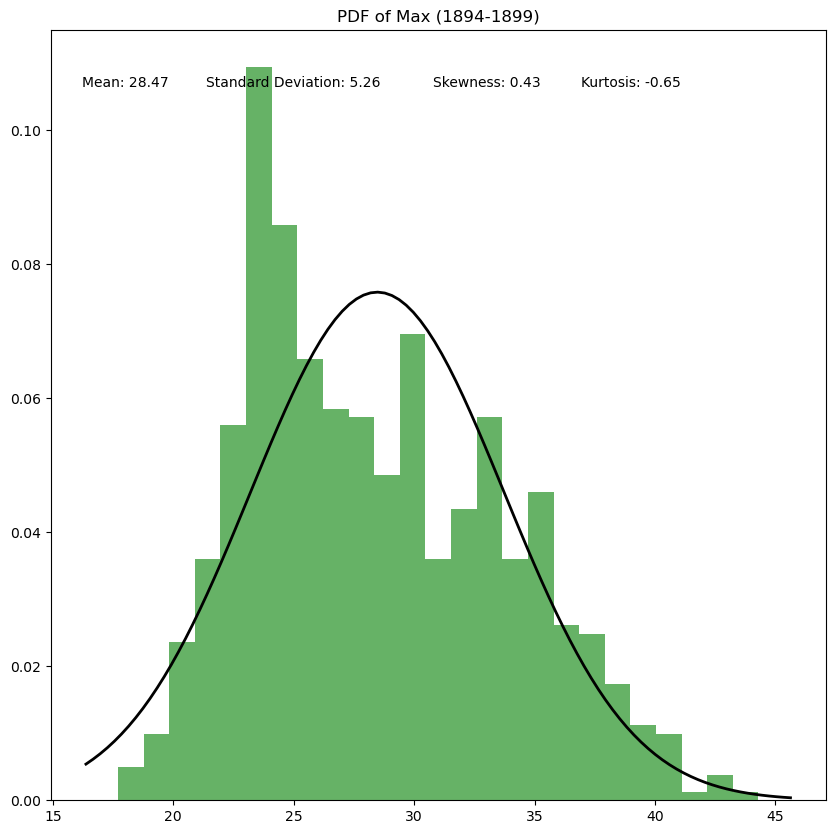

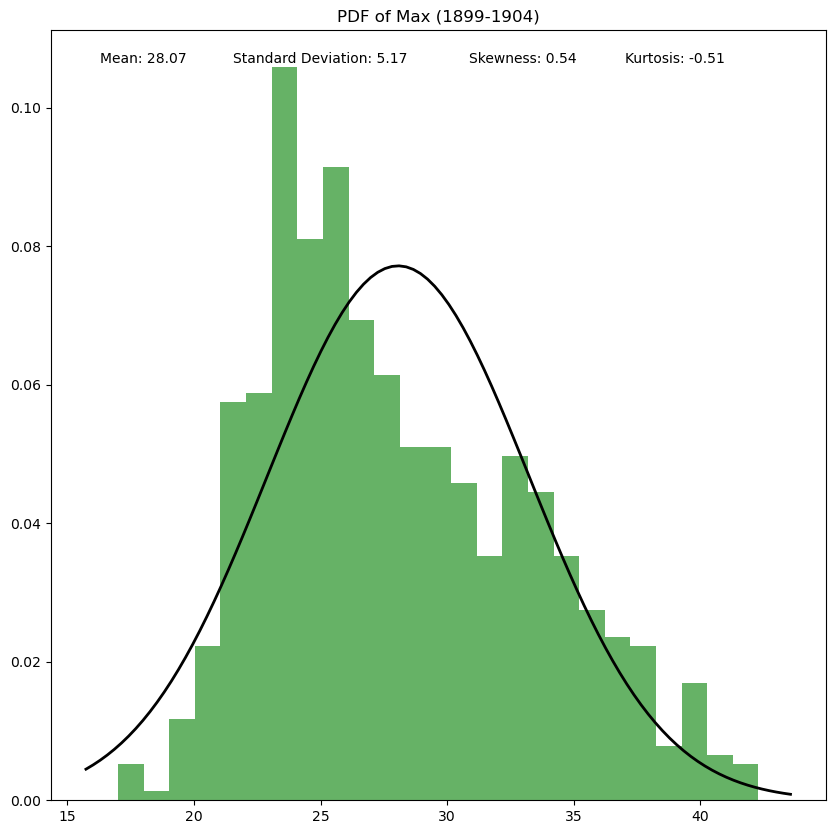

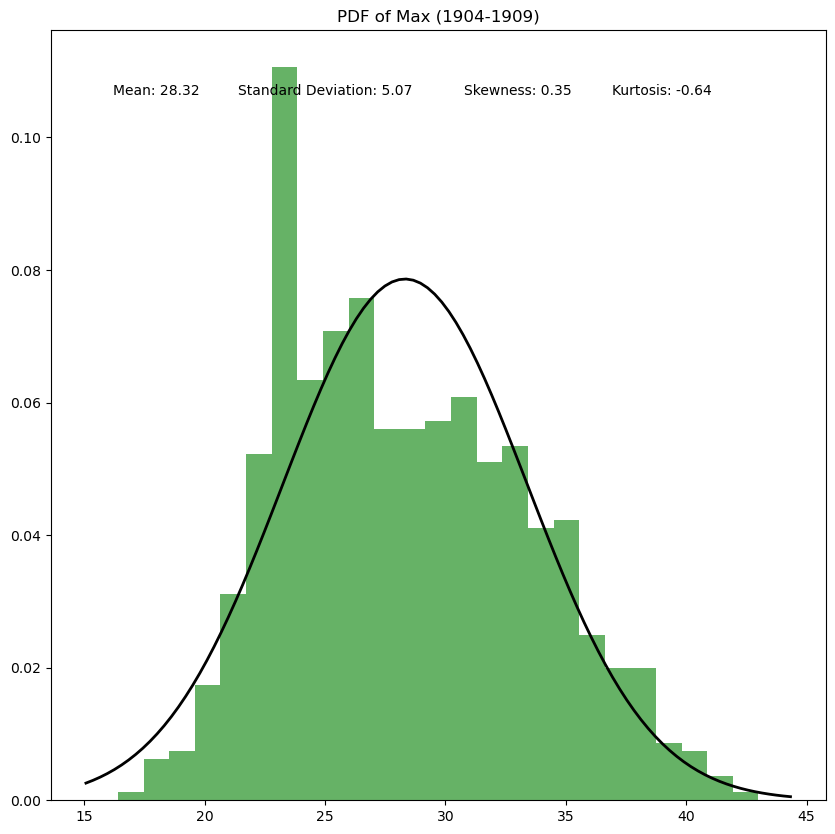

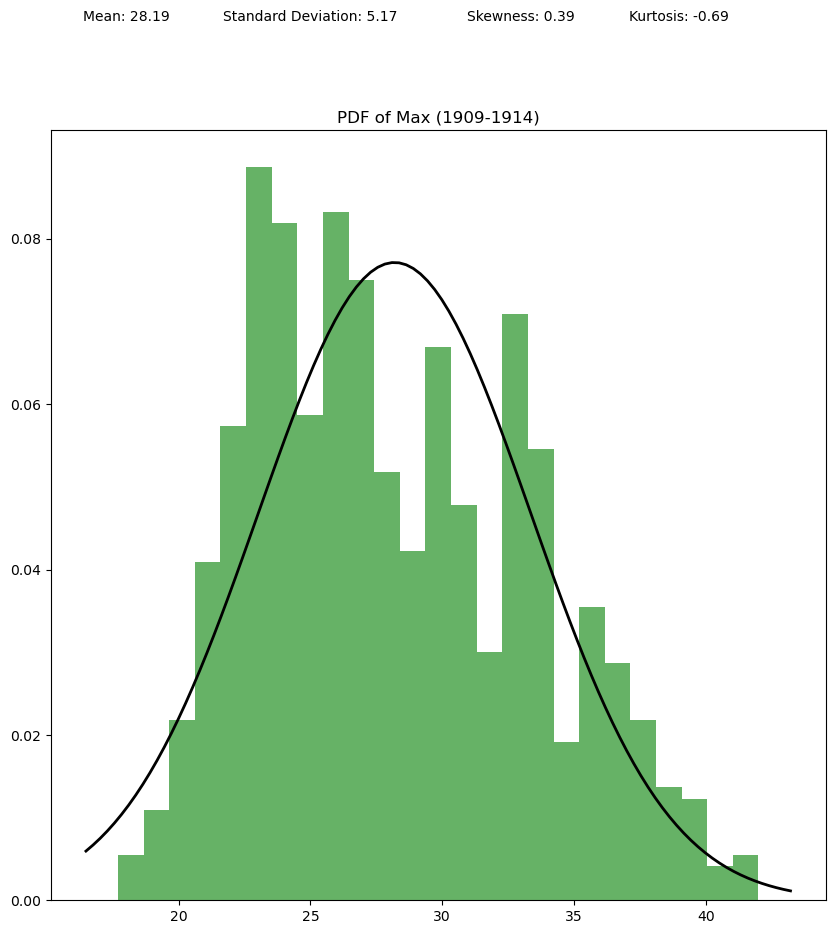

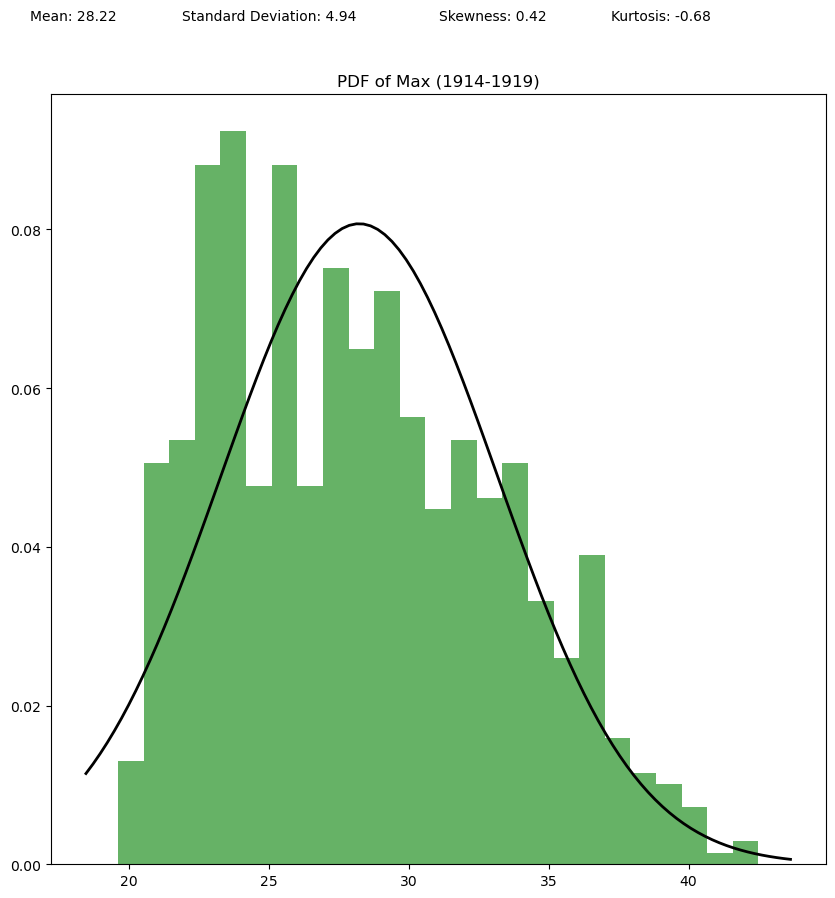

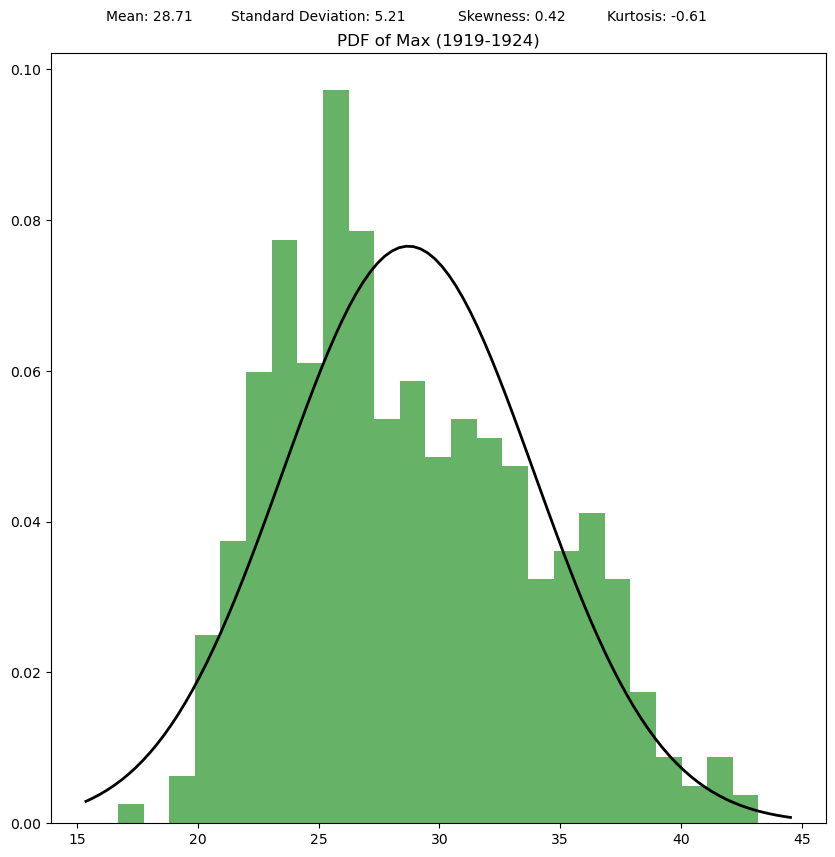

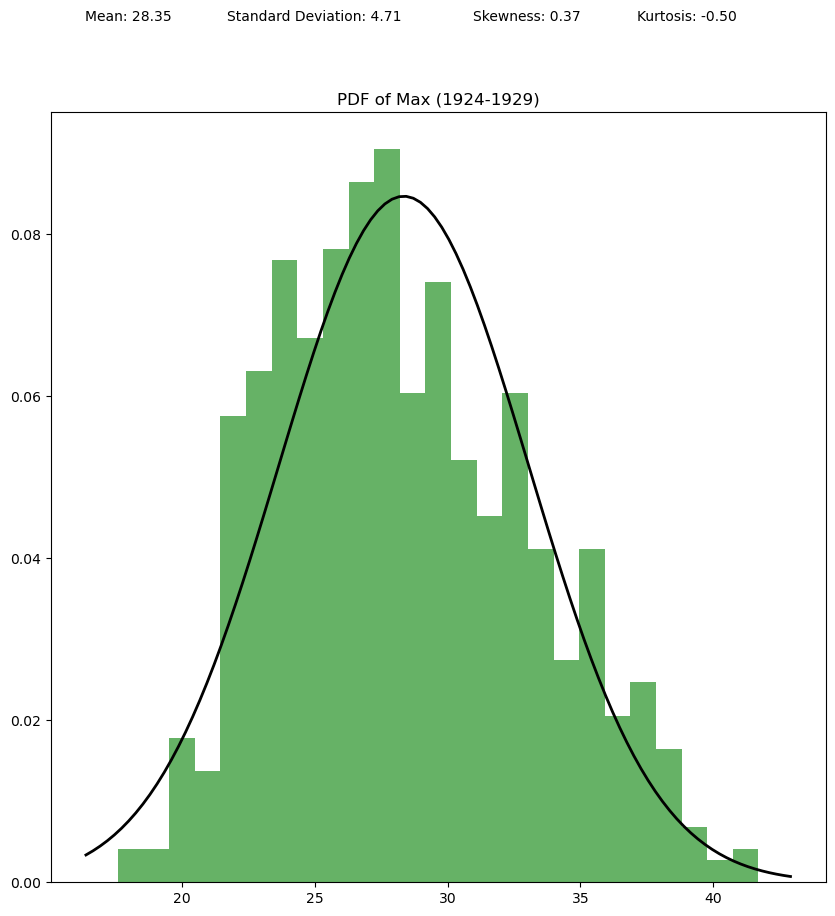

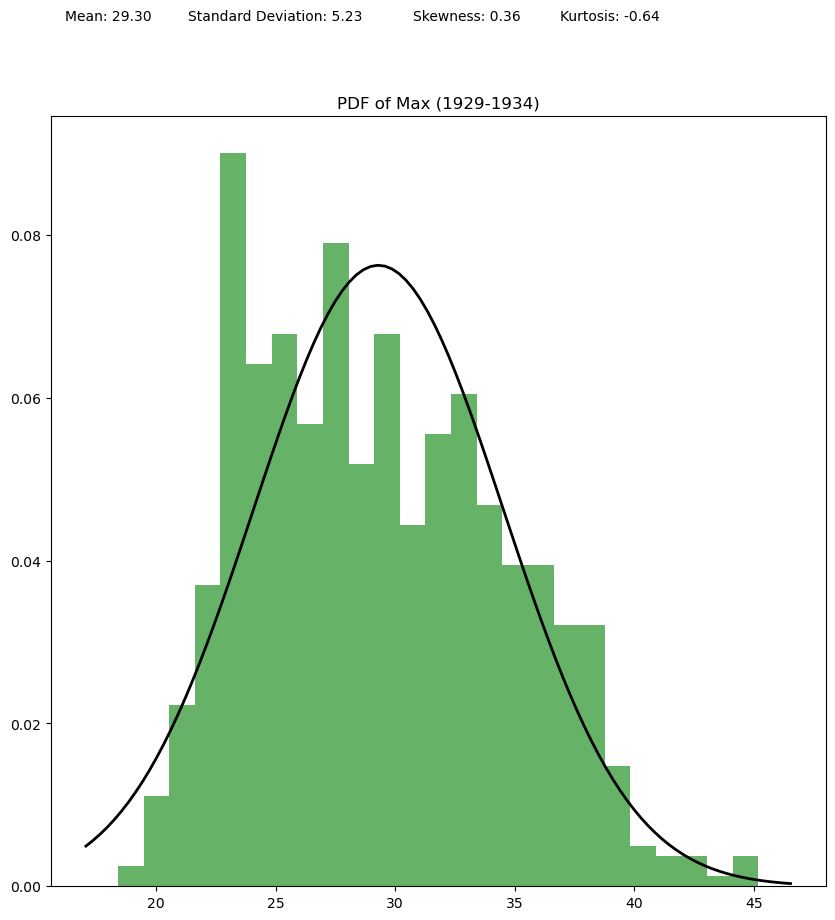

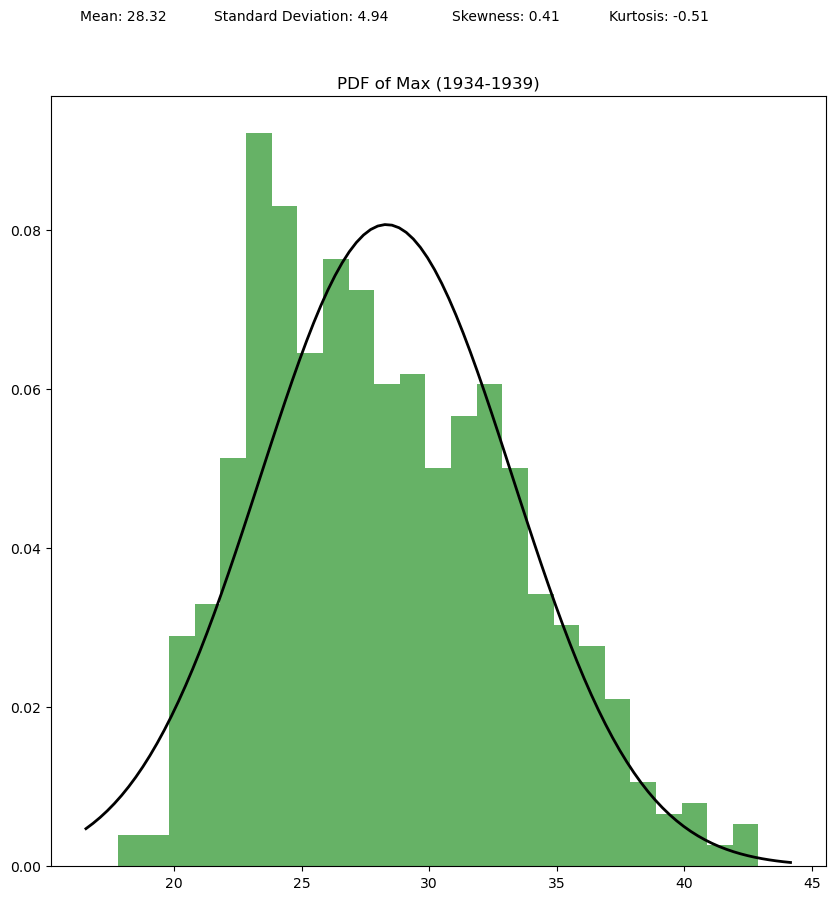

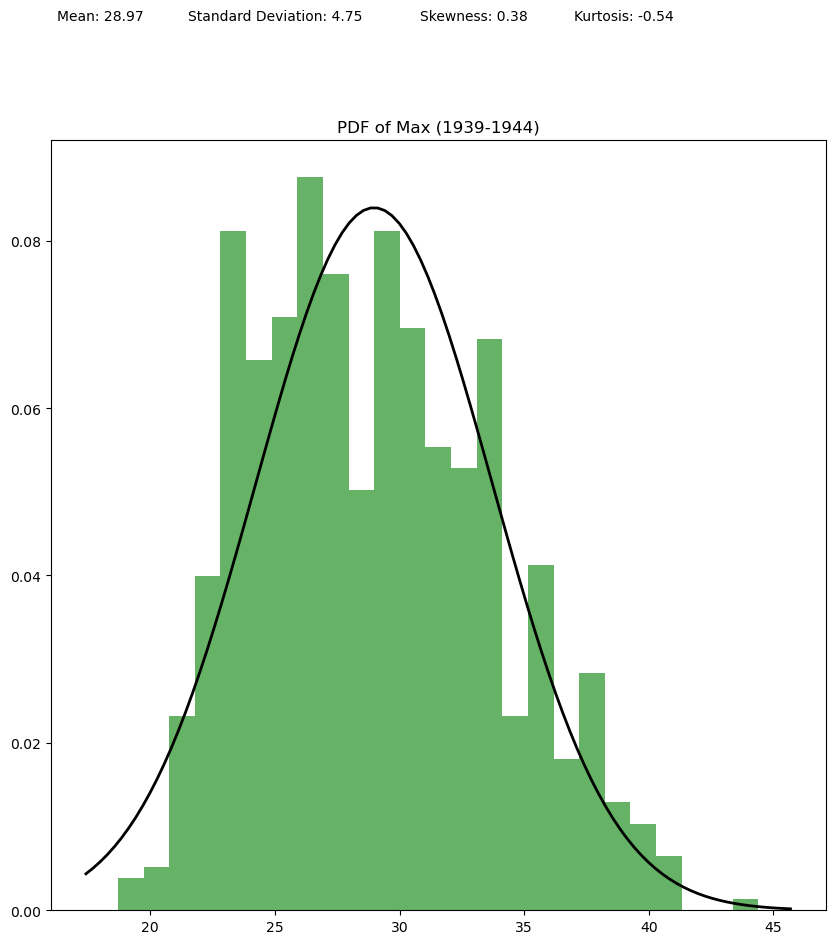

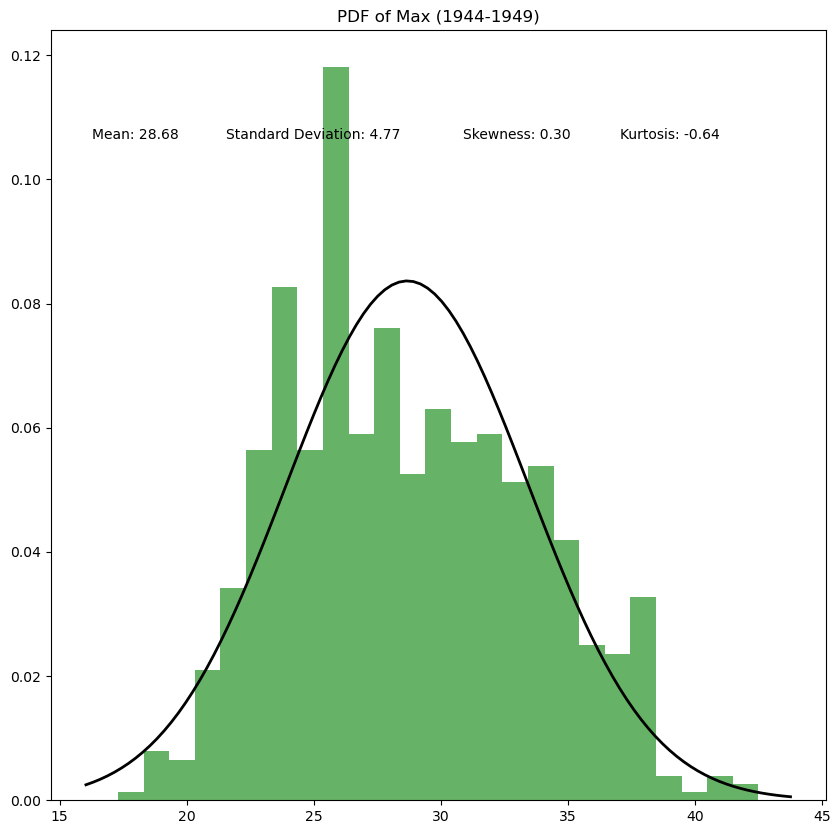

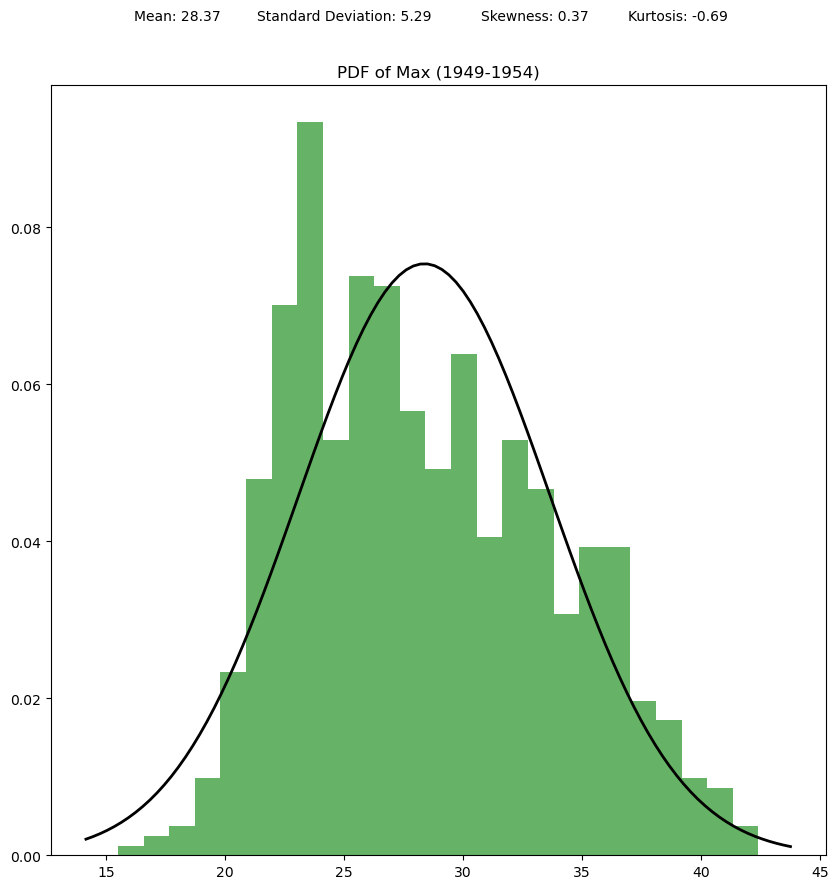

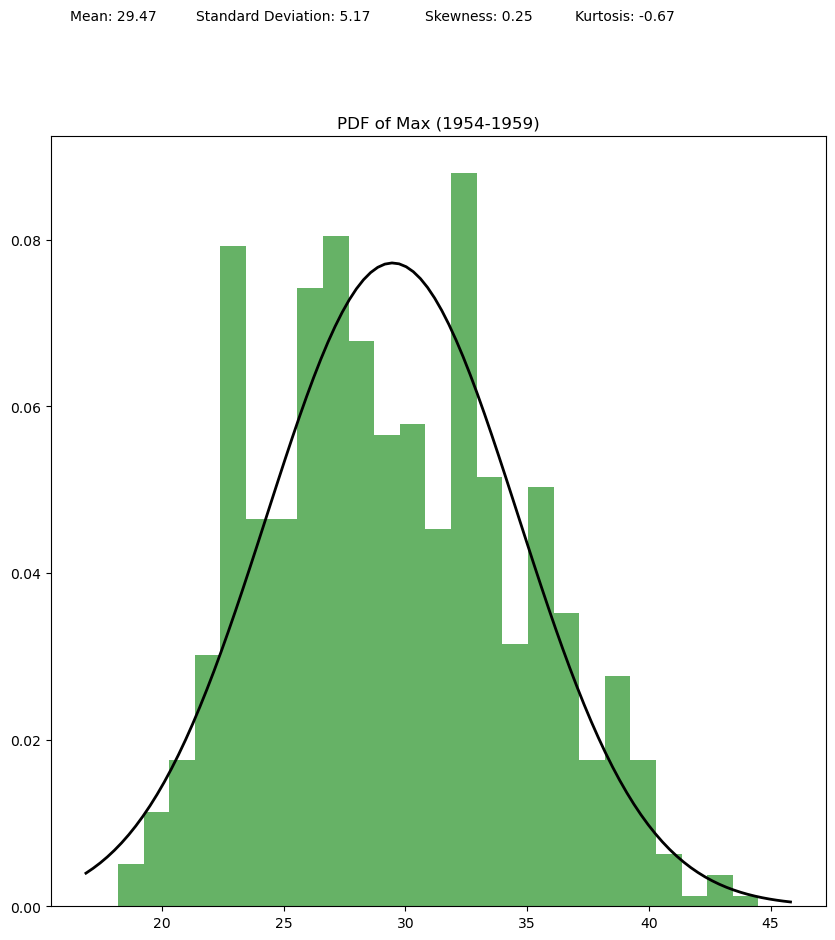

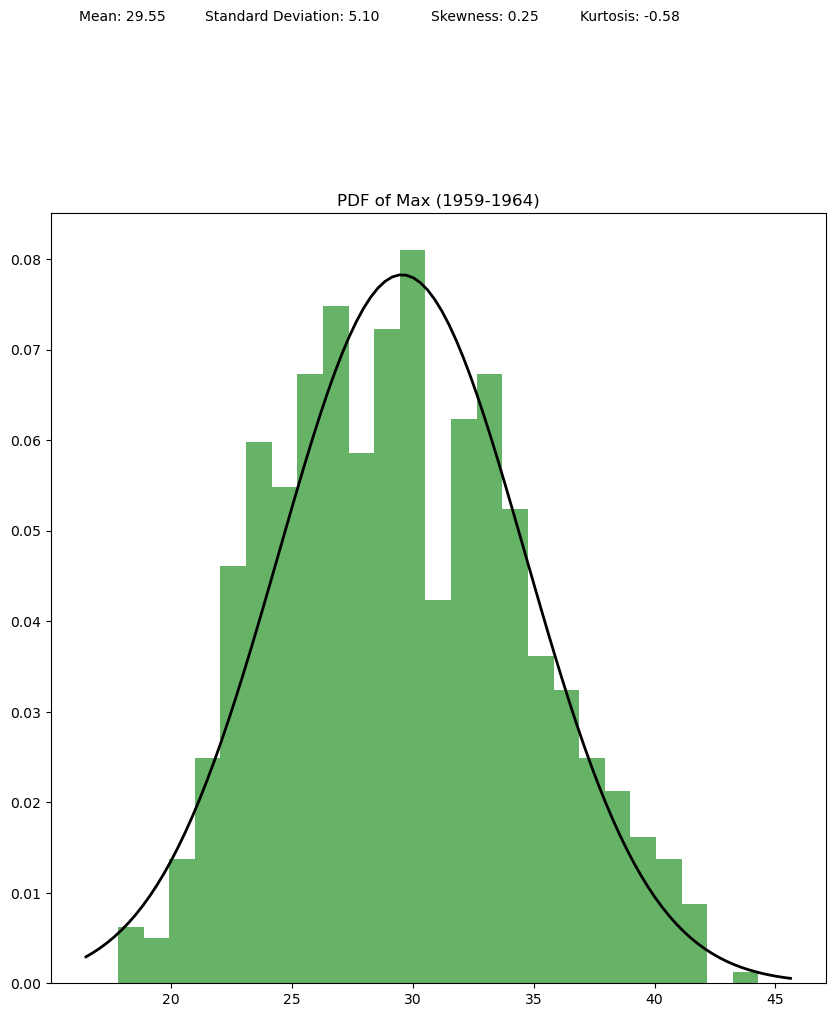

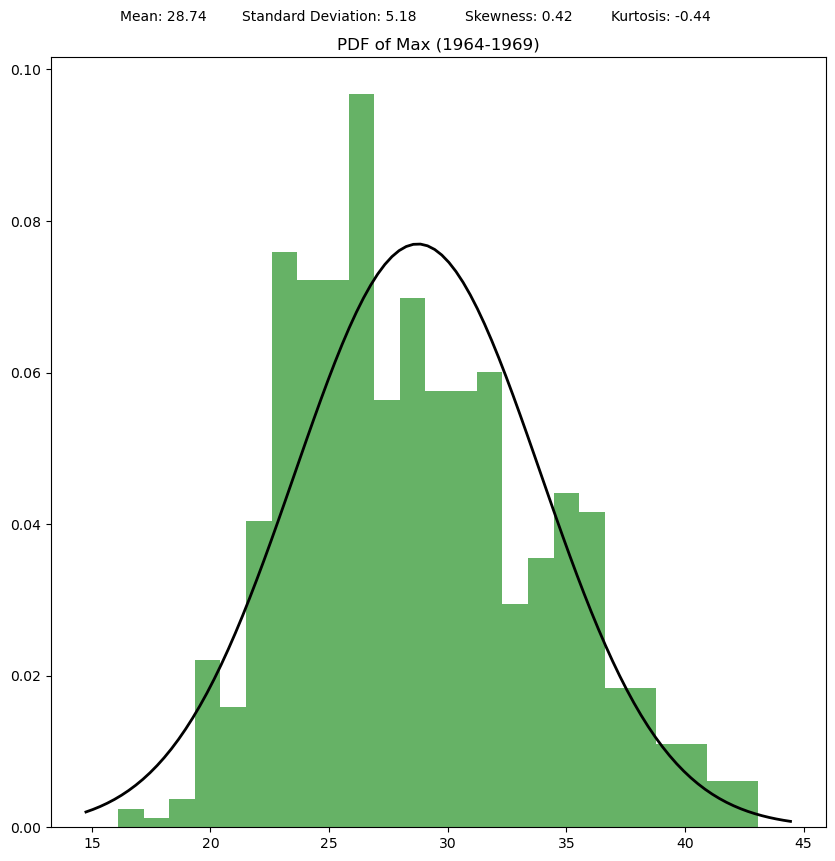

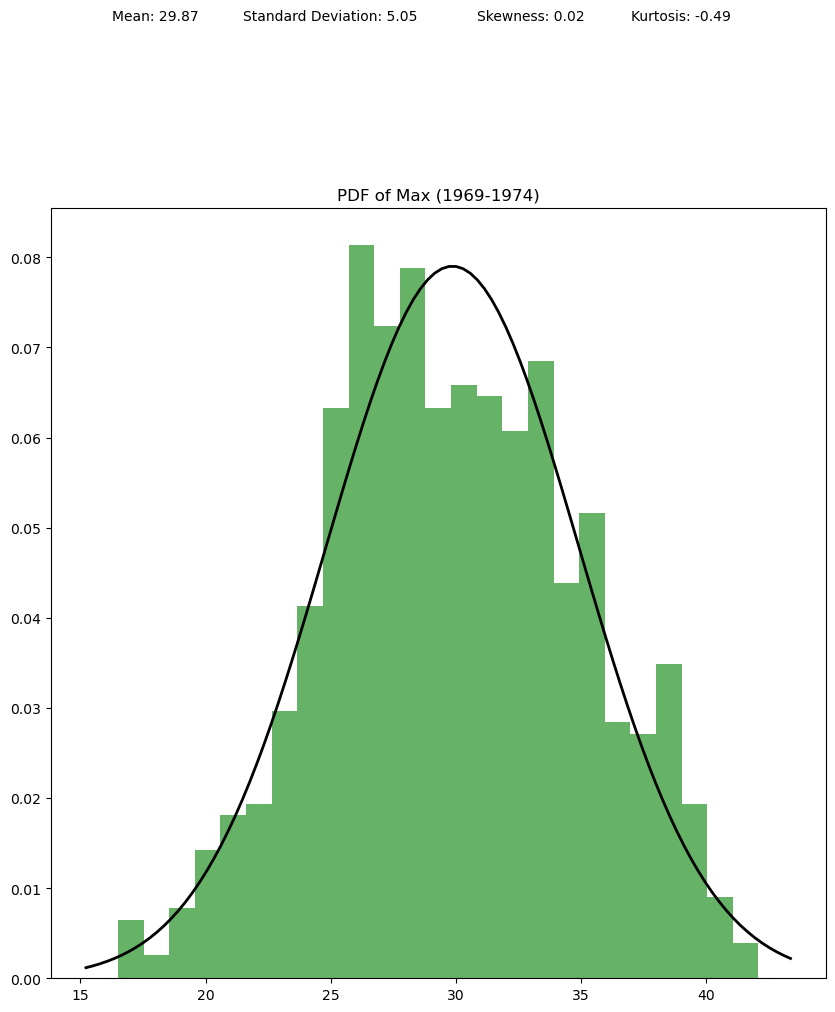

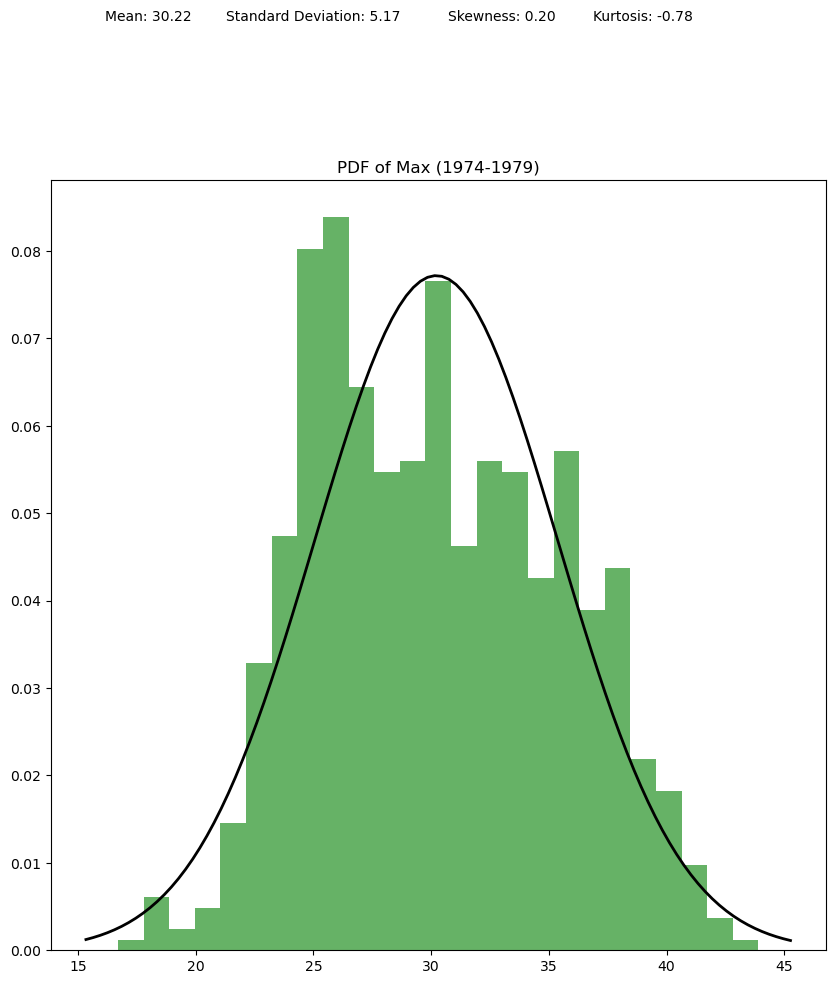

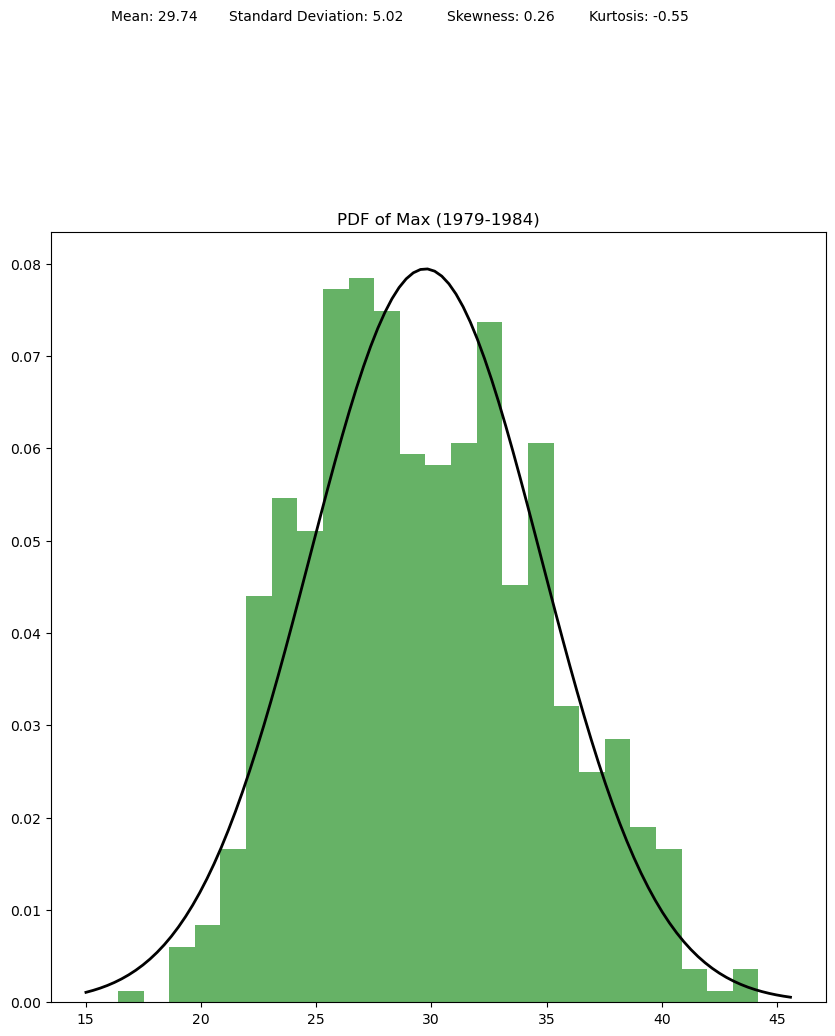

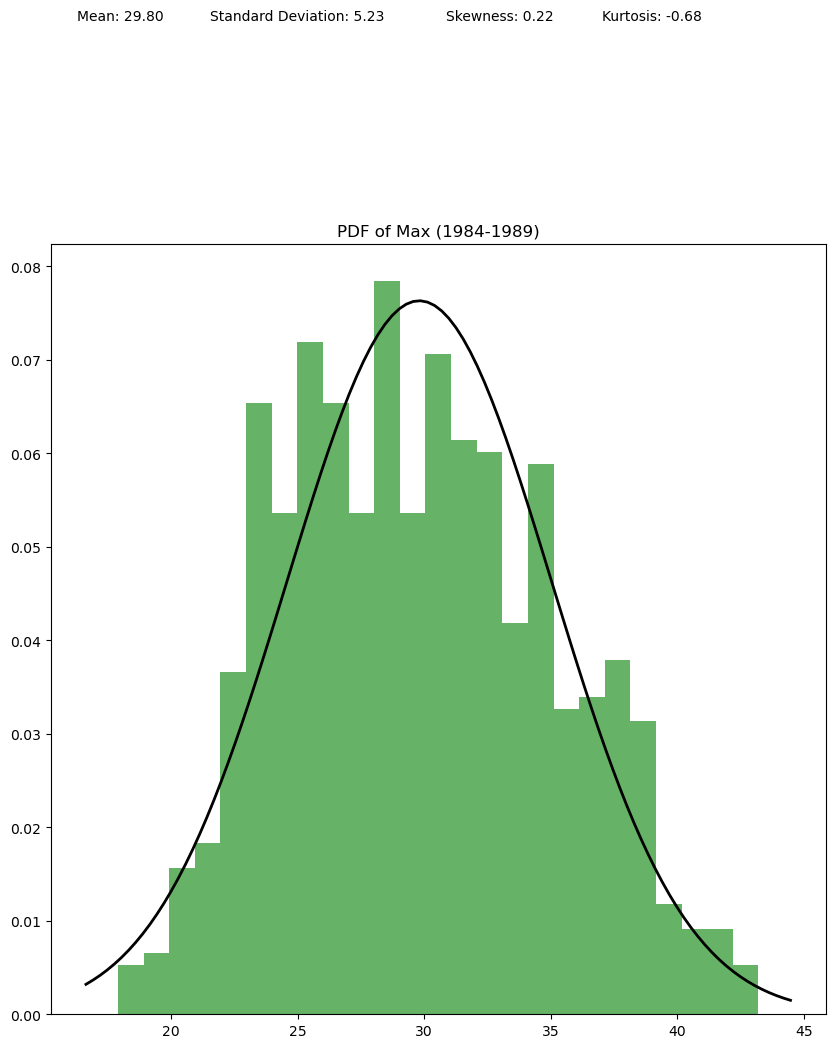

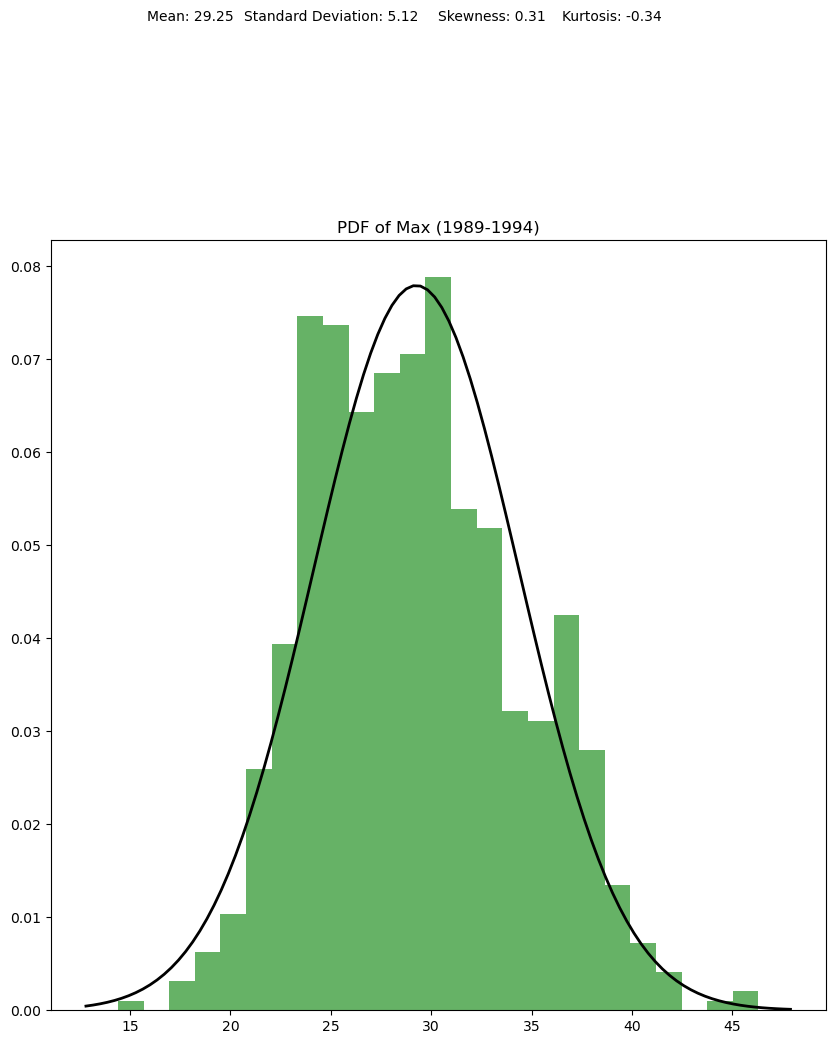

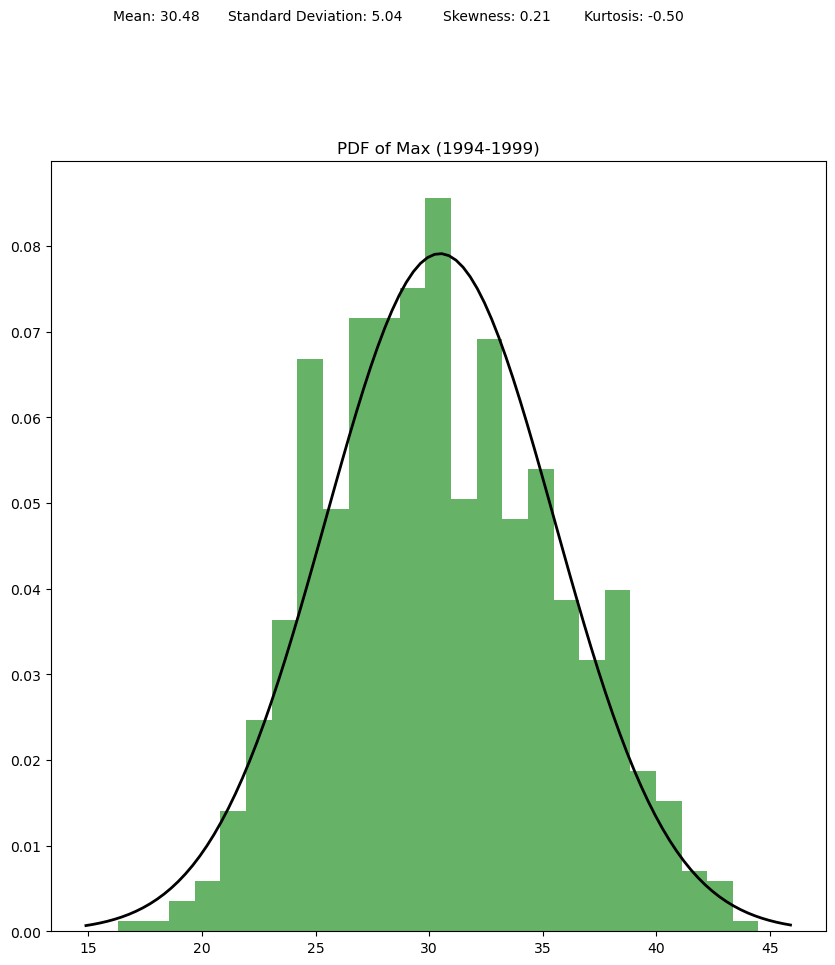

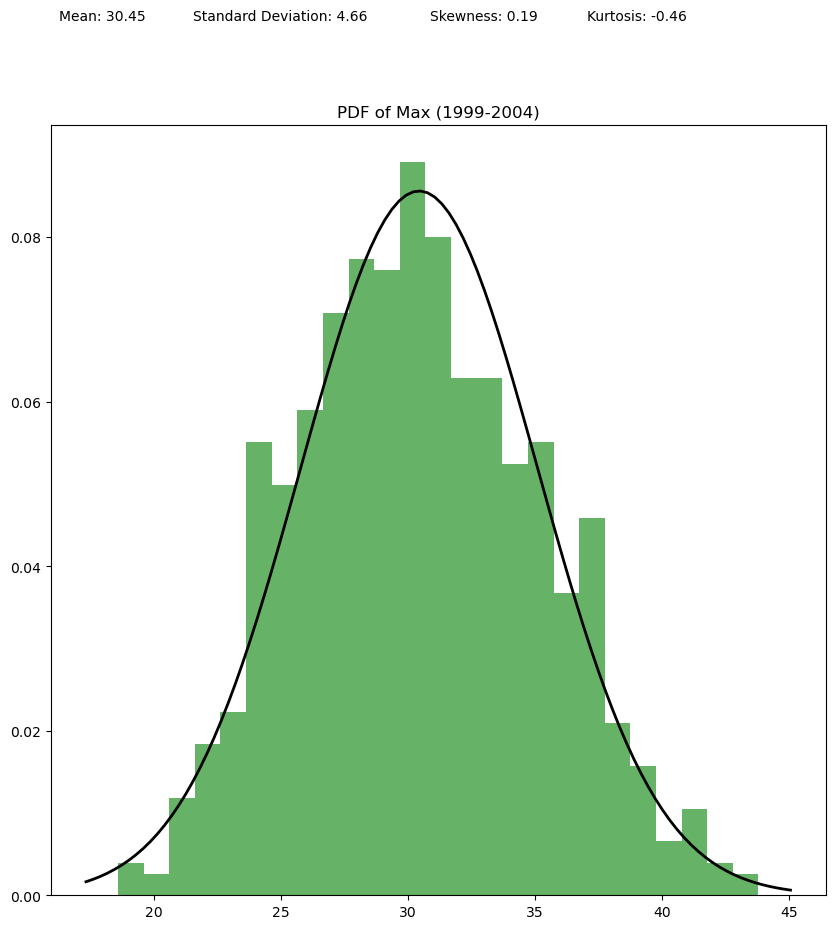

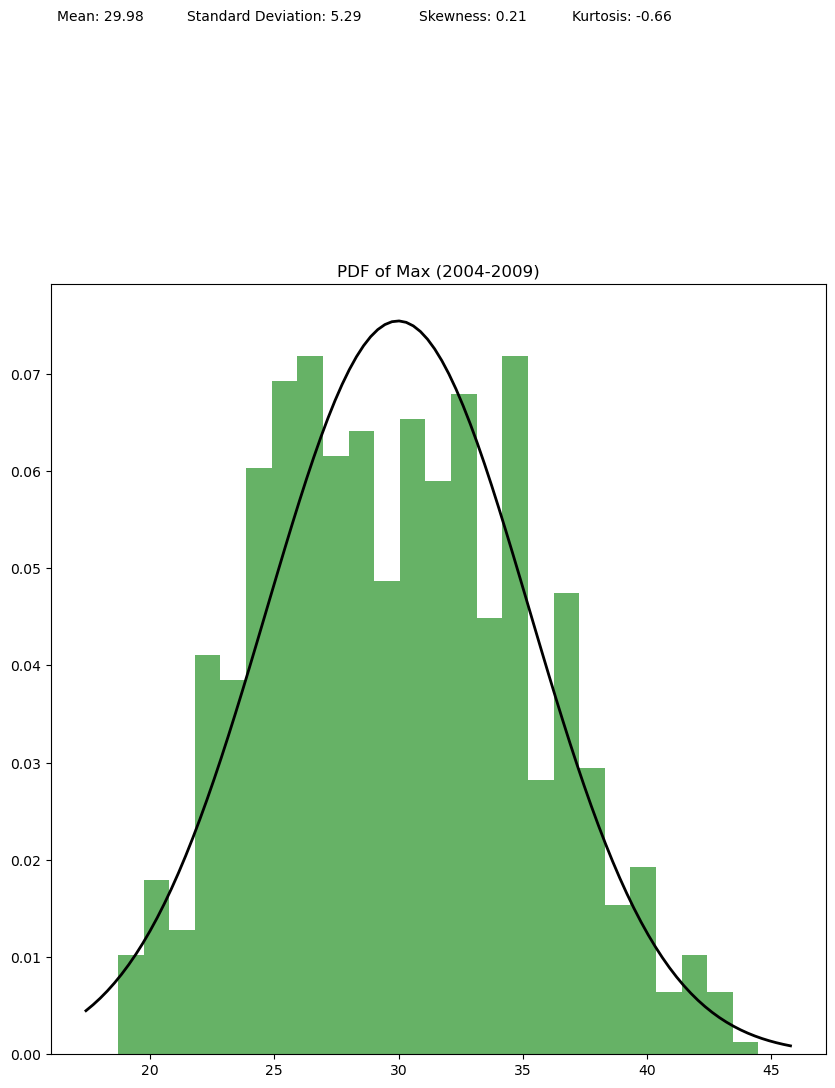

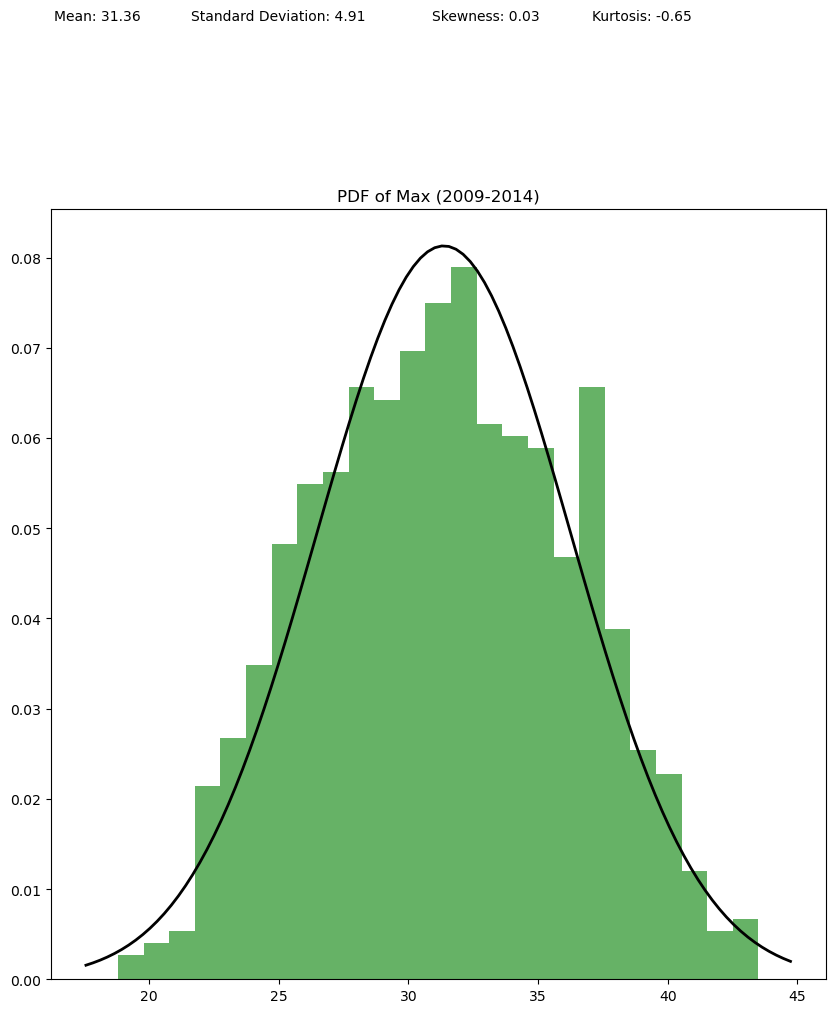

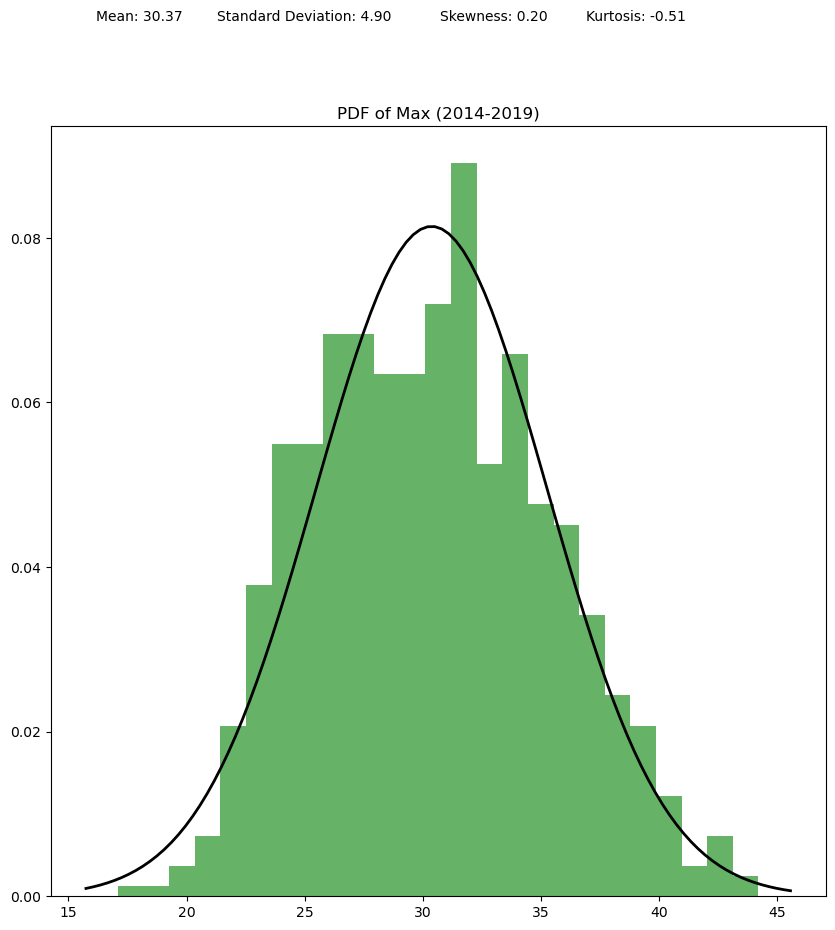

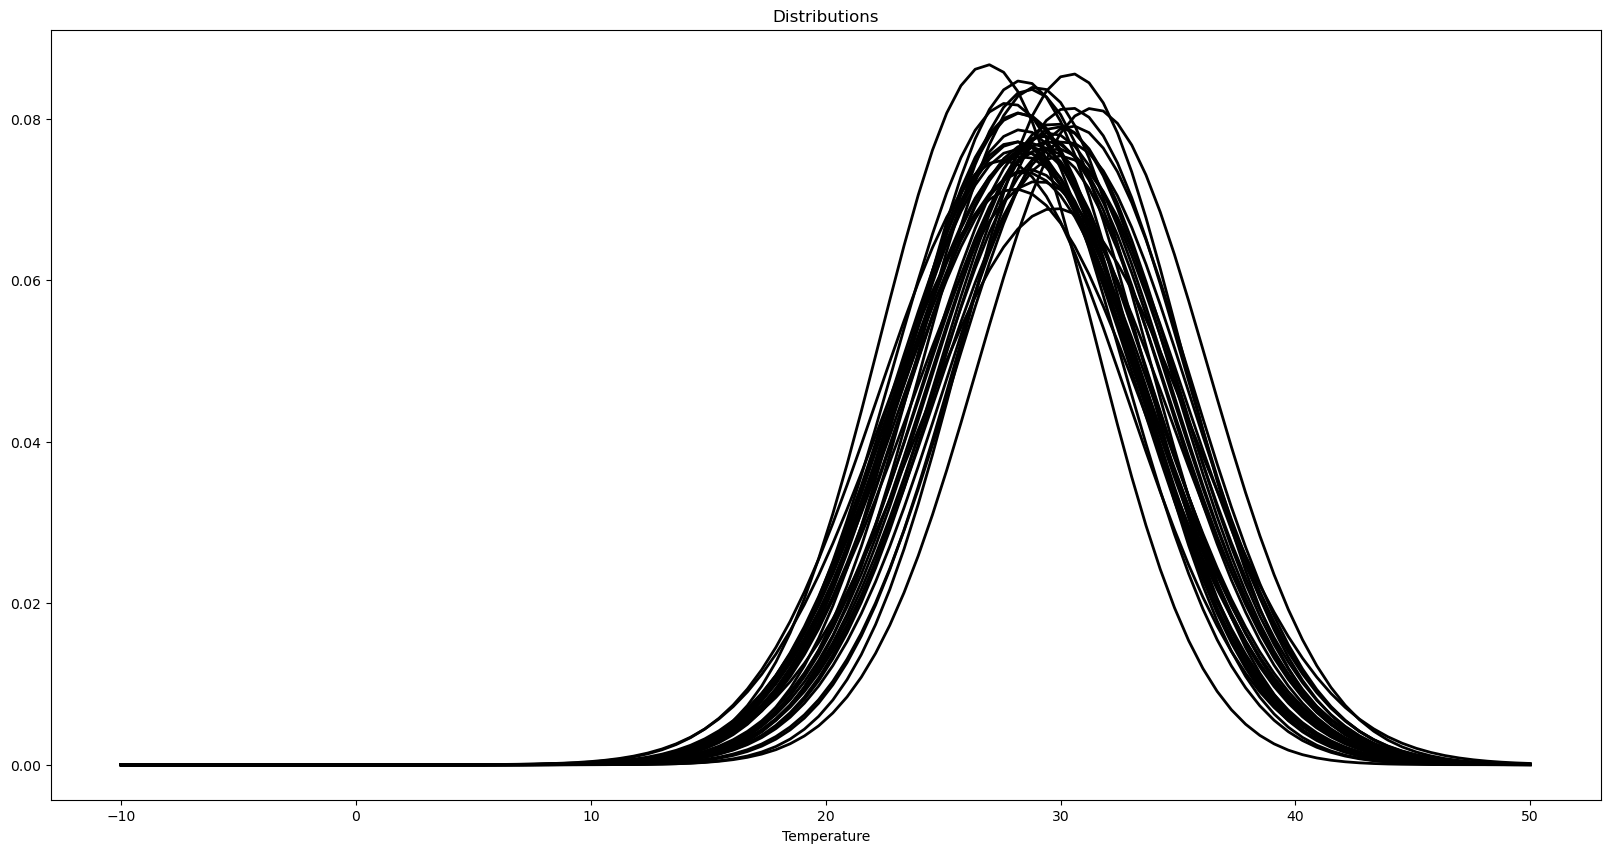

In [297]:
i = 2
Data_Set = 'Max_Mean'


for Dates in Max:
    plt.figure(i,figsize = (10,10))
    i = i+1
    
    data = Dates["Max_Mean"].dropna()
    
    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Importing library
    from scipy.stats import skew
    St_Y = data.reset_index()['date'].dt.year.min()
    St_E = data.reset_index()['date'].dt.year.max()


    Sk = skew(data, axis=0, bias=True)
    Ku = kurtosis(data, axis=0, bias=True)
    # Add annotations for statistical measures
    plt.text(18, 0.106, f"Mean: {mu:.2f}", ha='center', va='bottom')
    plt.text(25, 0.106, f"Standard Deviation: {std:.2f}", ha='center', va='bottom')
    plt.text(33, 0.106, f"Skewness: {Sk:.2f}", ha='center', va='bottom')
    plt.text(39, 0.106, f"Kurtosis: {Ku:.2f}", ha='center', va='bottom')

    # Show the plot
    title = "PDF of {} ({}-{})".format('Max',St_Y,St_E)
    plt.title(title)

    
    plt.figure(1,figsize = (20,10))

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(-10, 50, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2,label =  "{}-{}".format(St_Y,St_E))
    plt.title("Distributions")
    plt.xlabel('Temperature')

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

C:\Users\jarra\AppData\Local\Temp\ipykernel_18612\578610511.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i,figsize = (10,10))


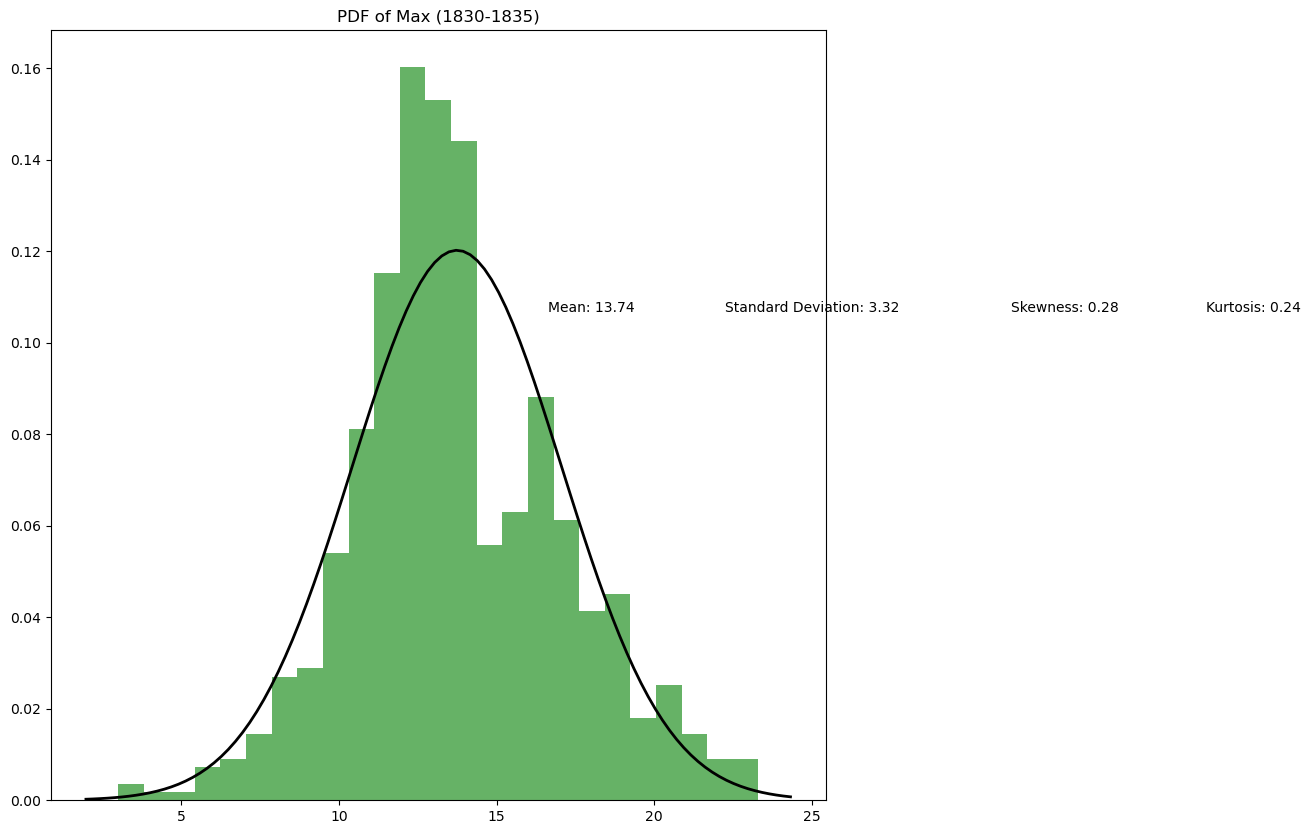

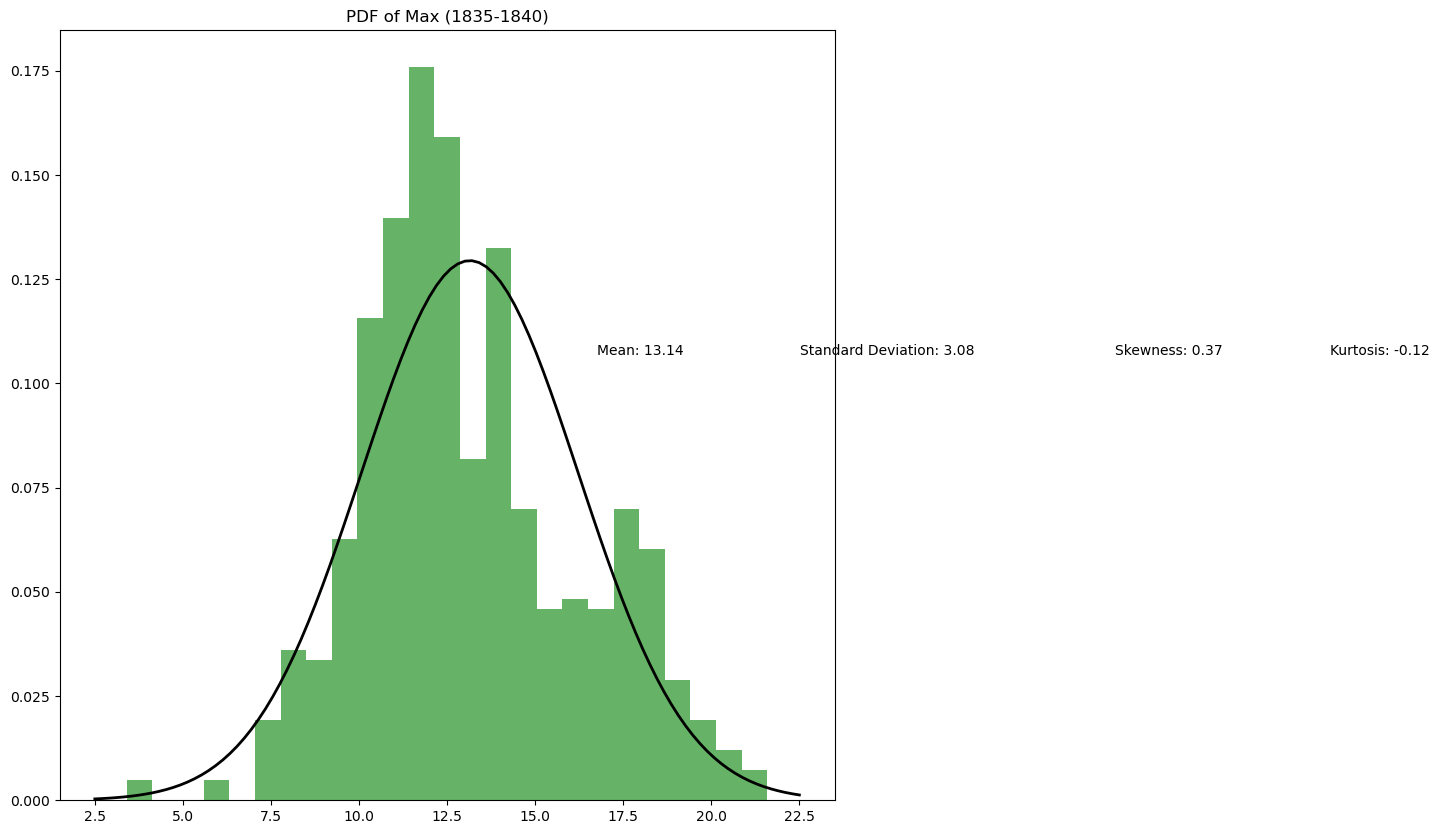

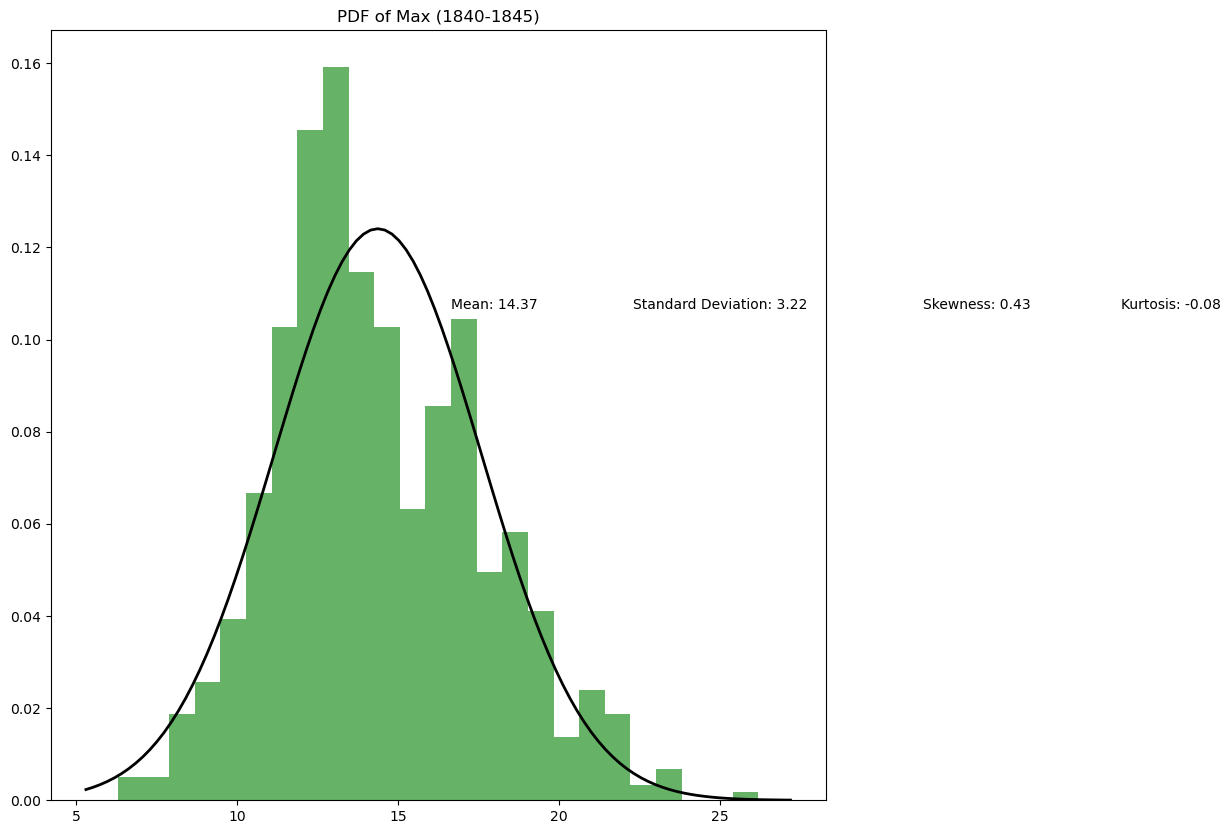

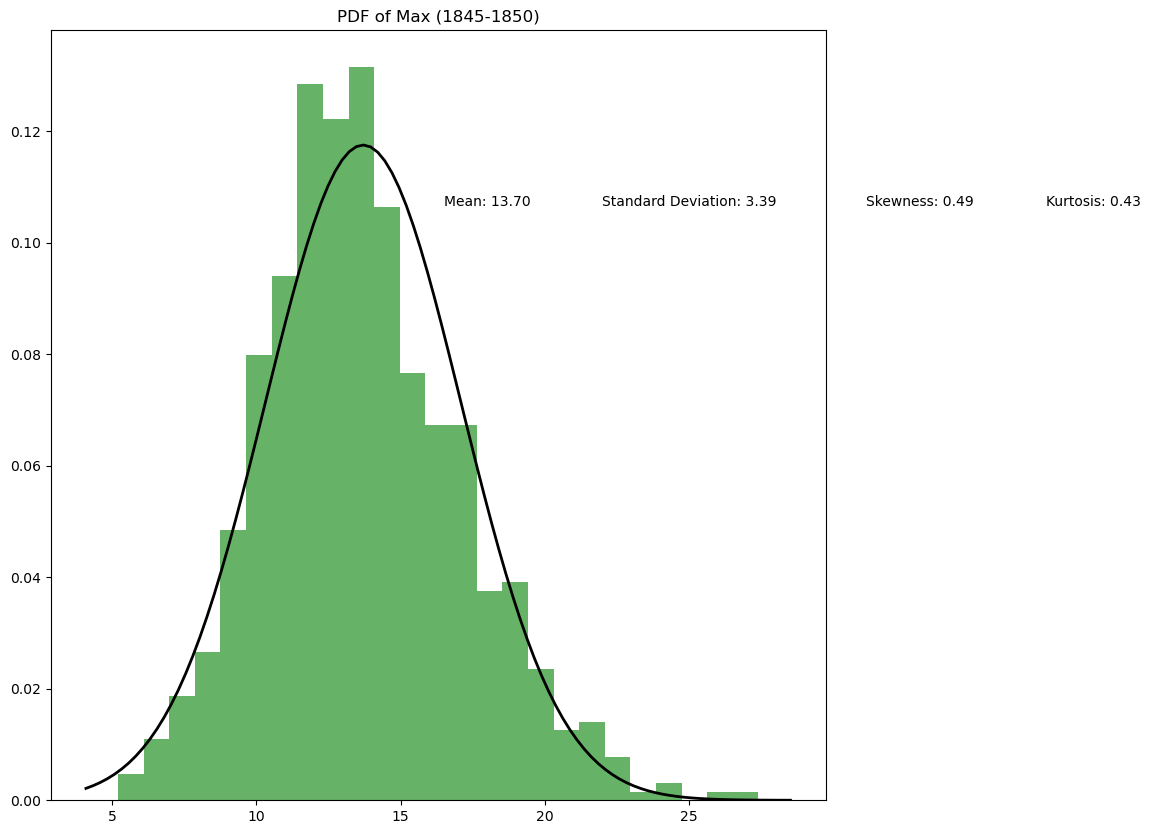

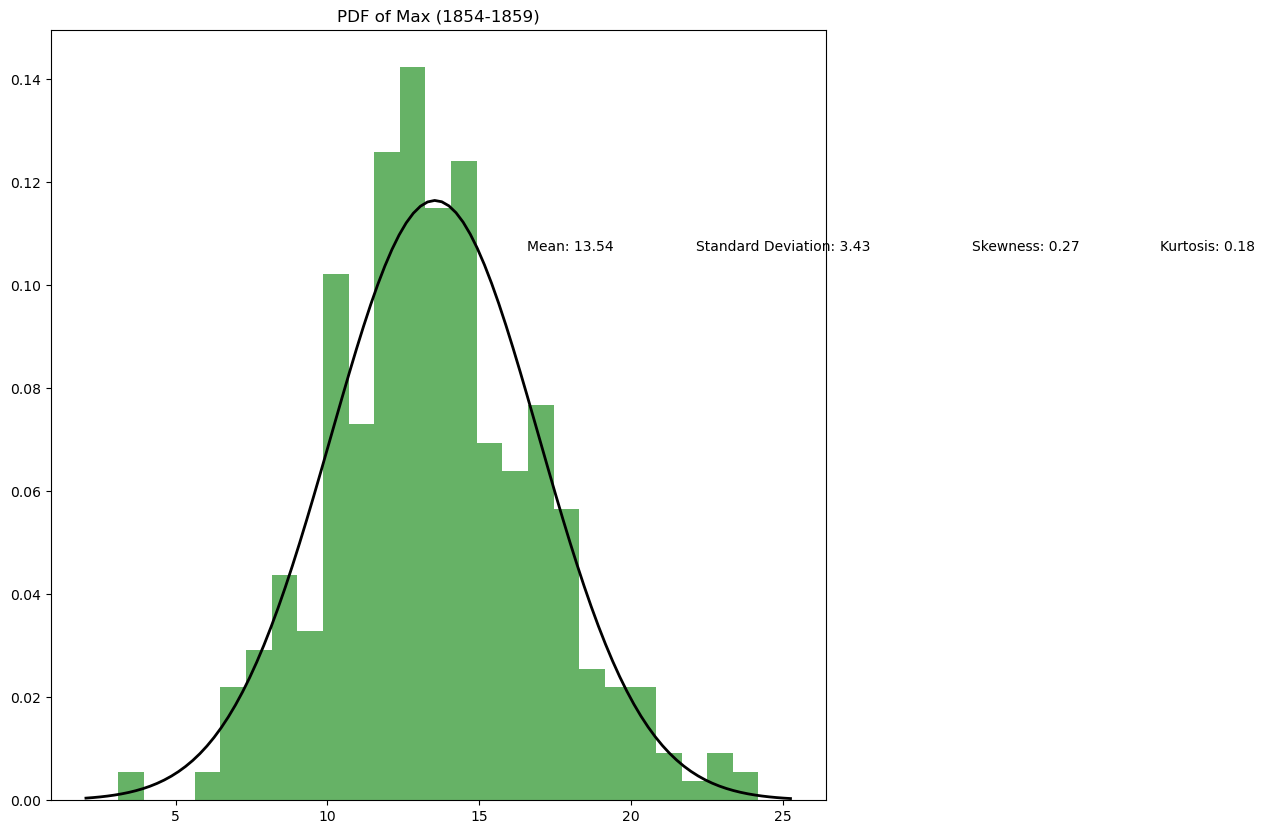

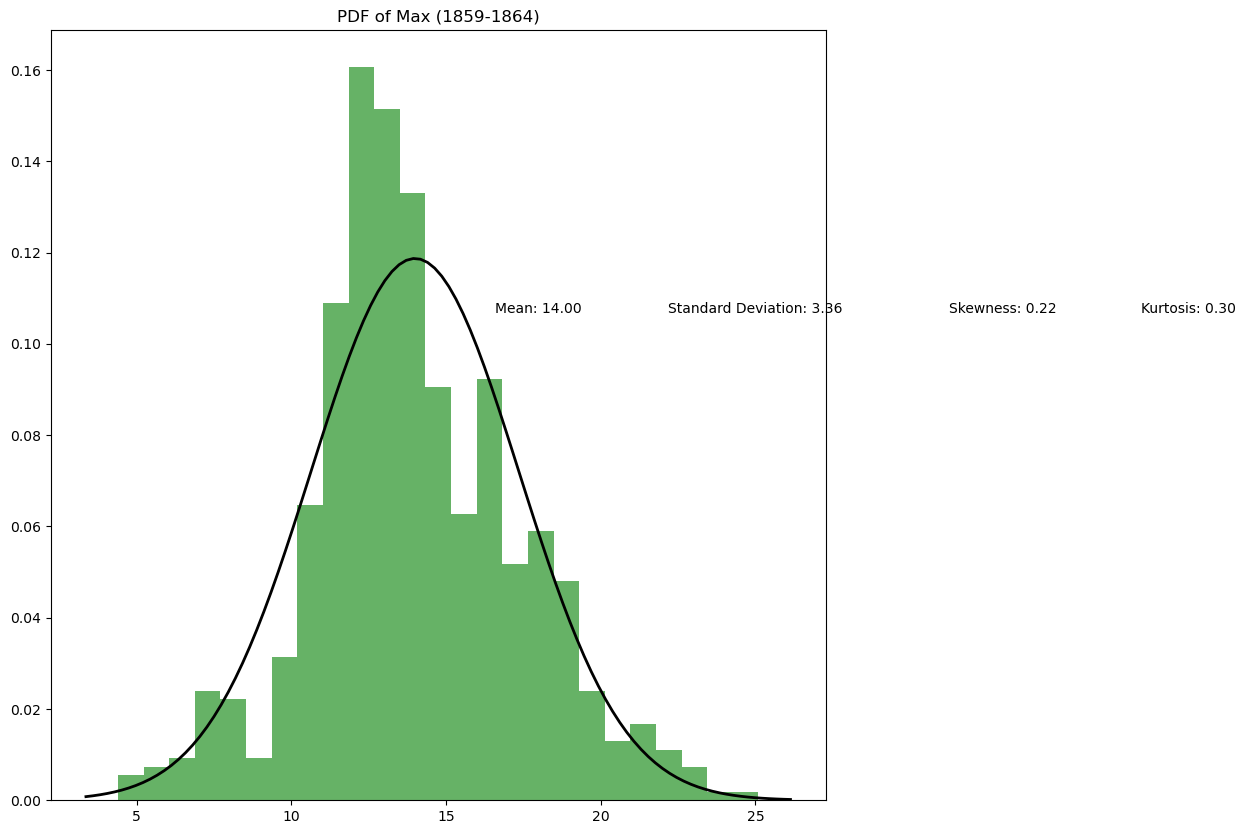

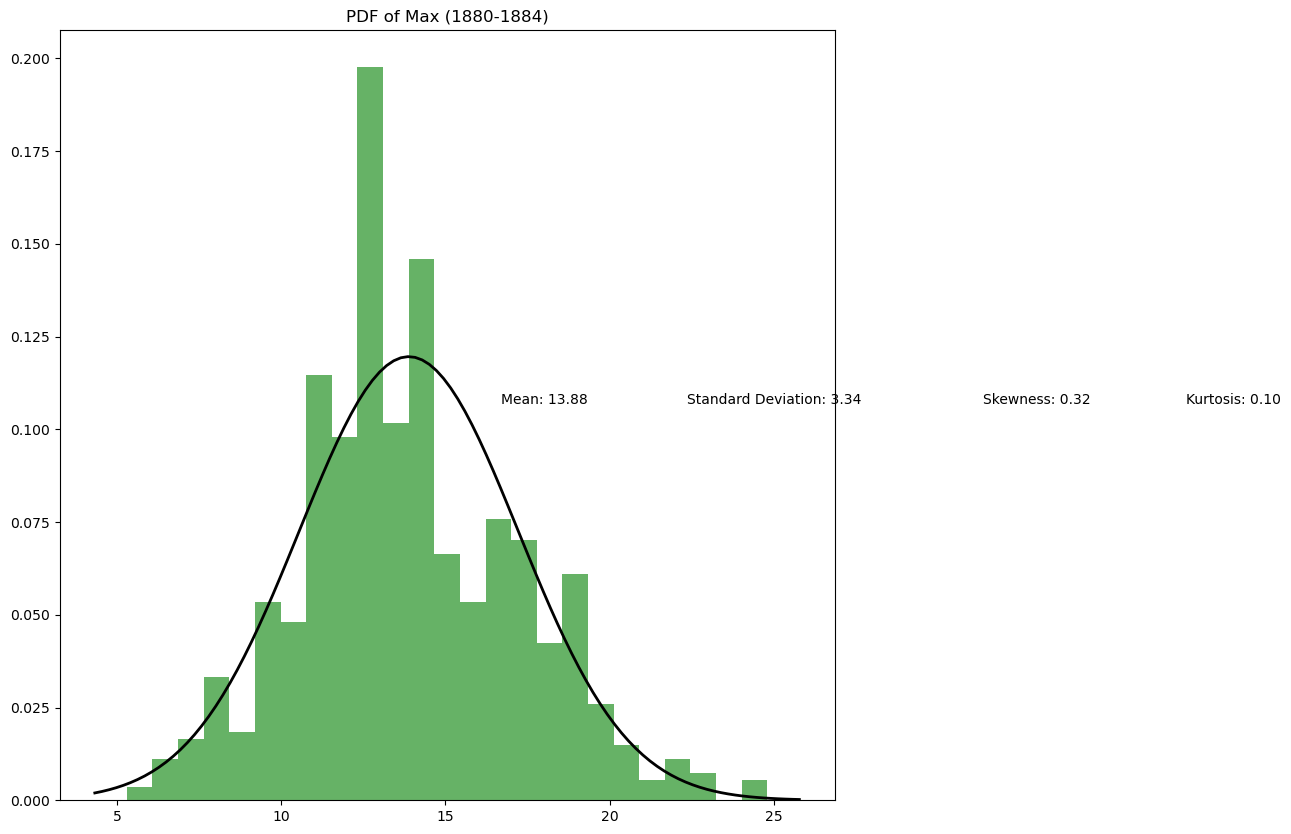

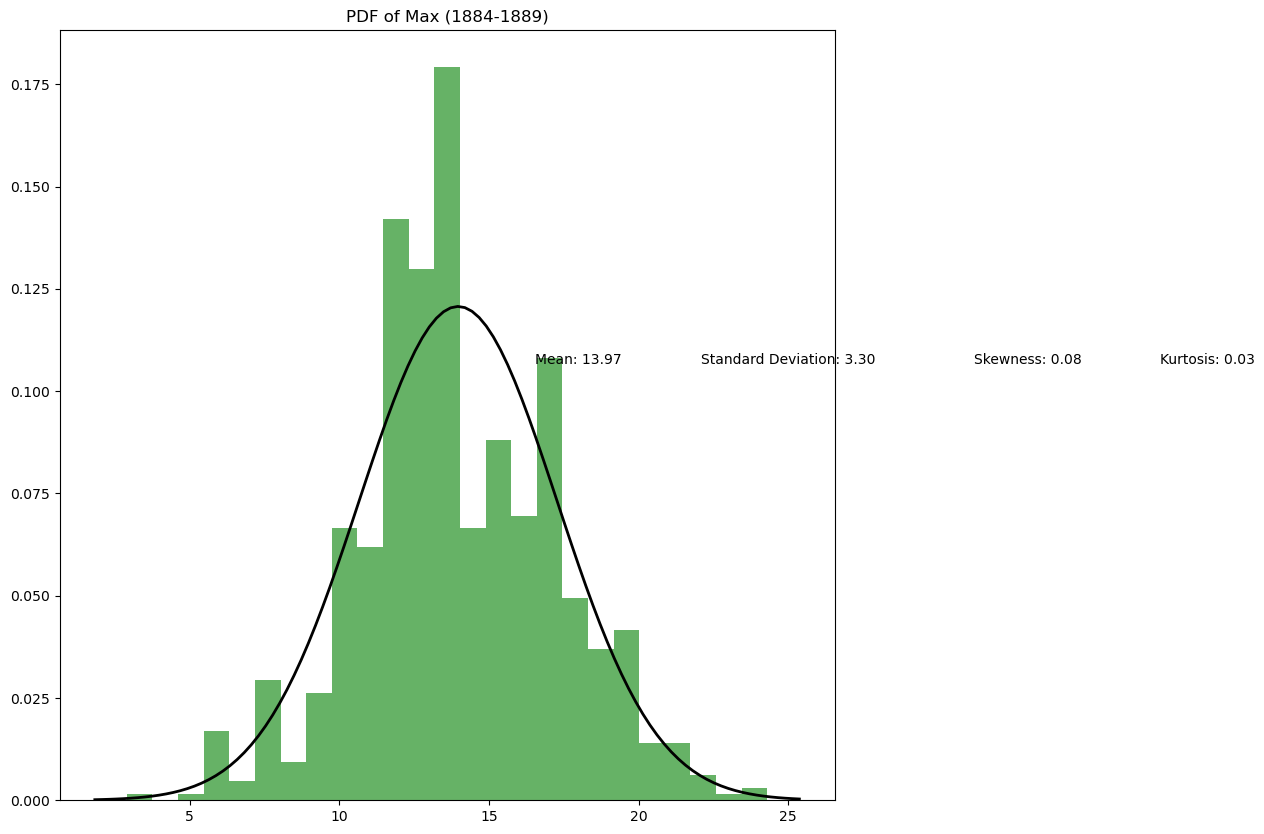

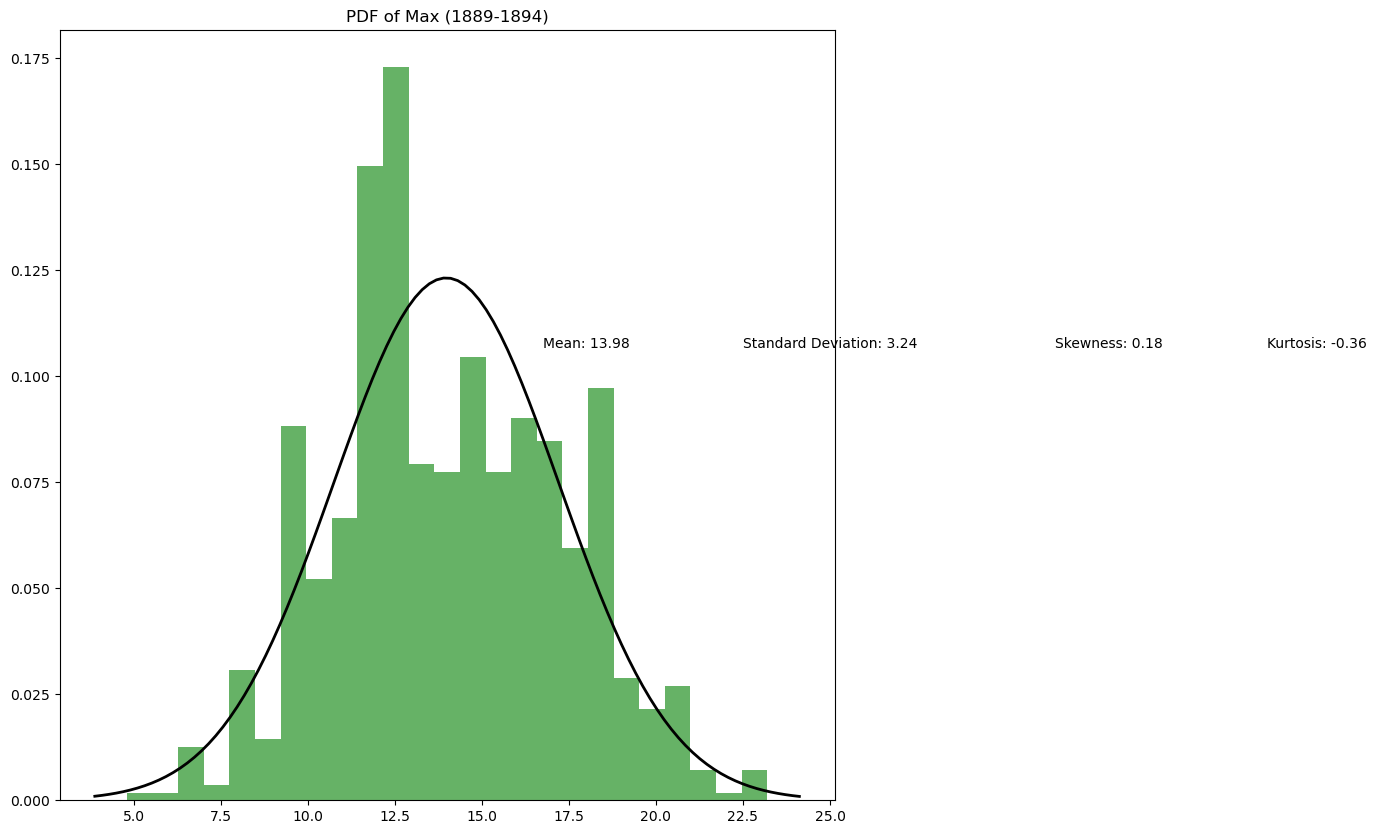

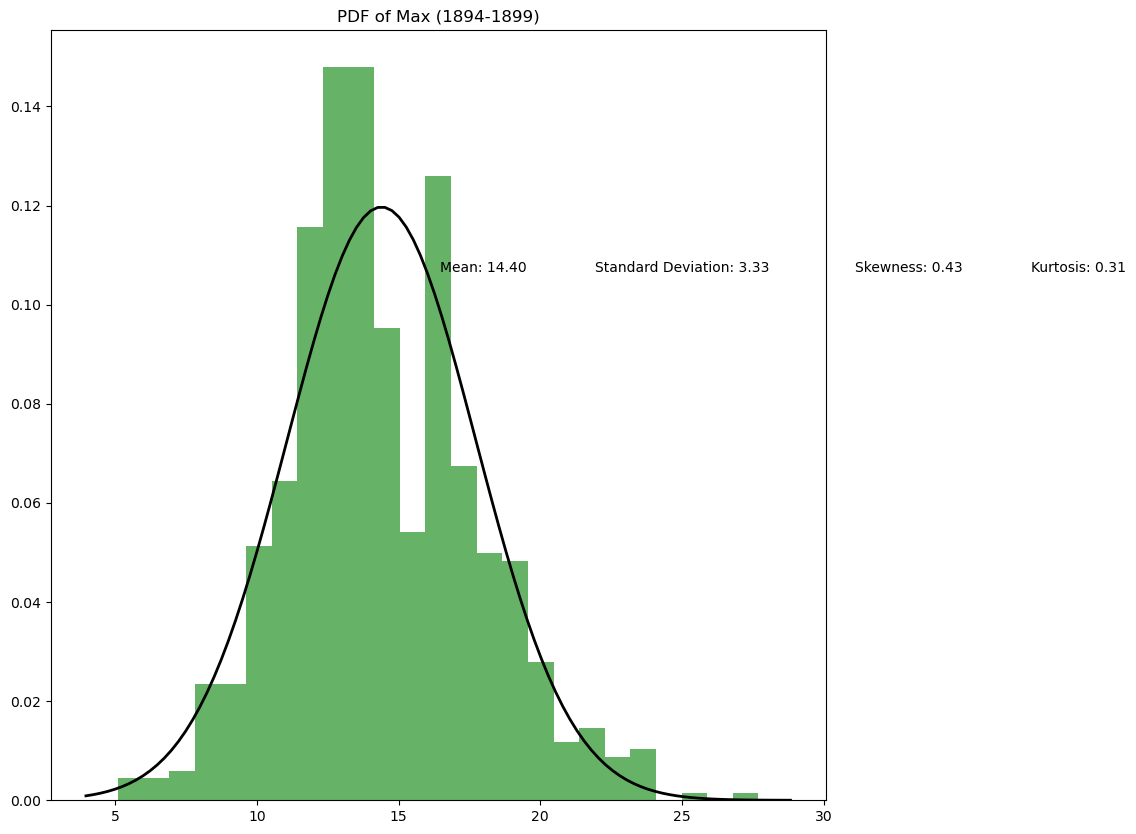

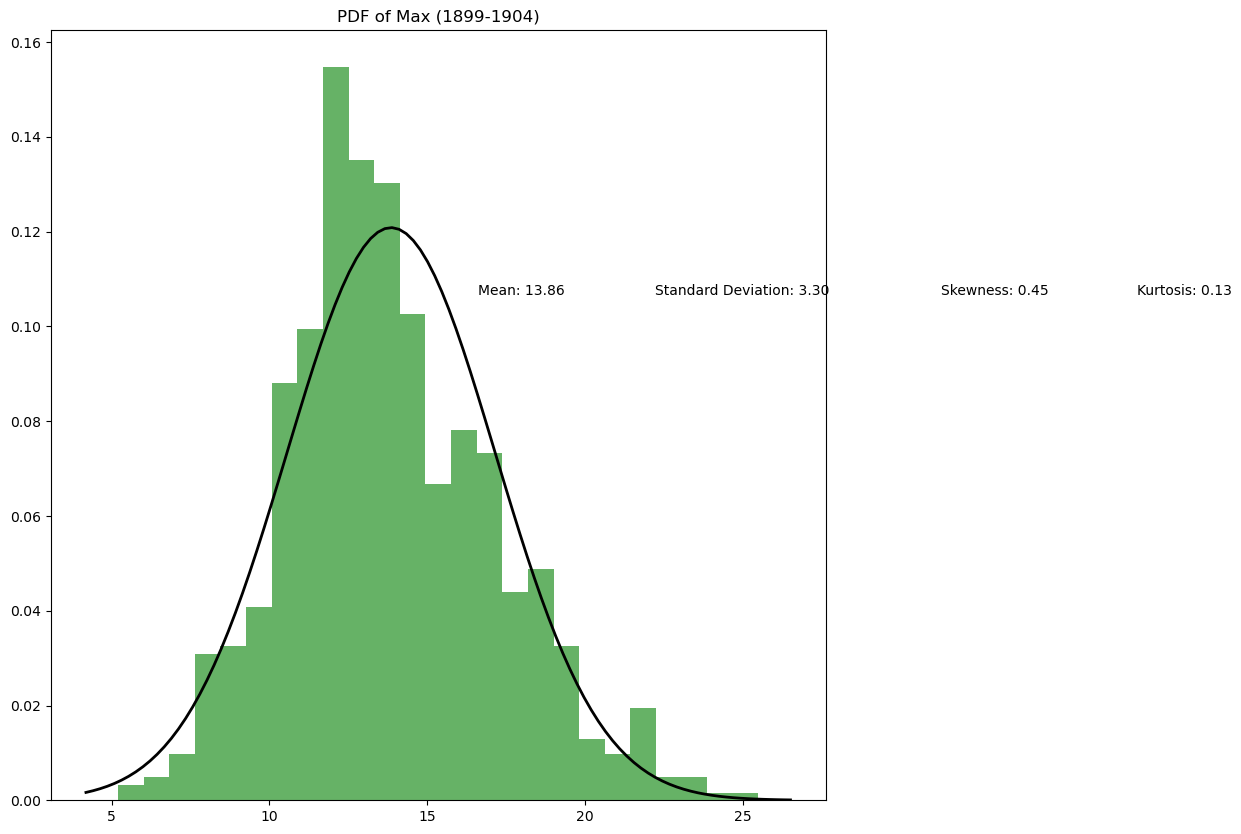

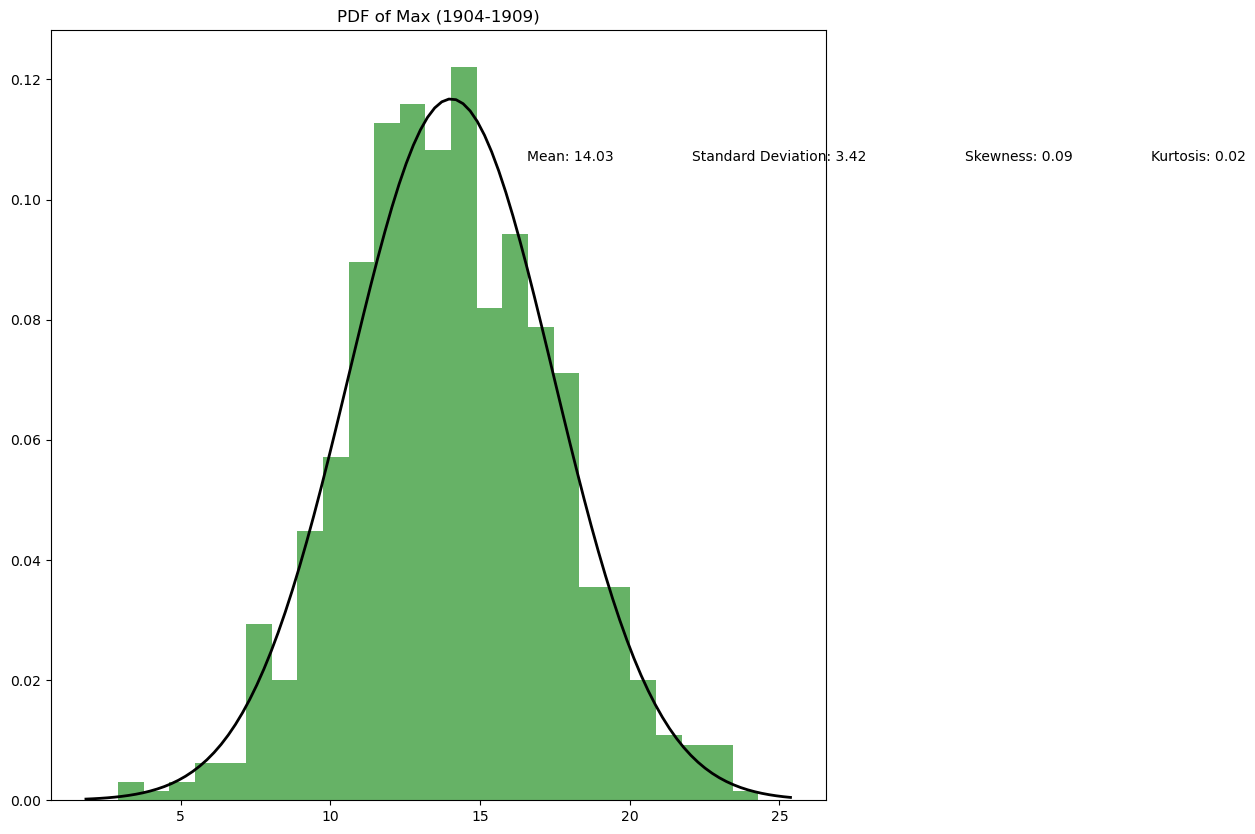

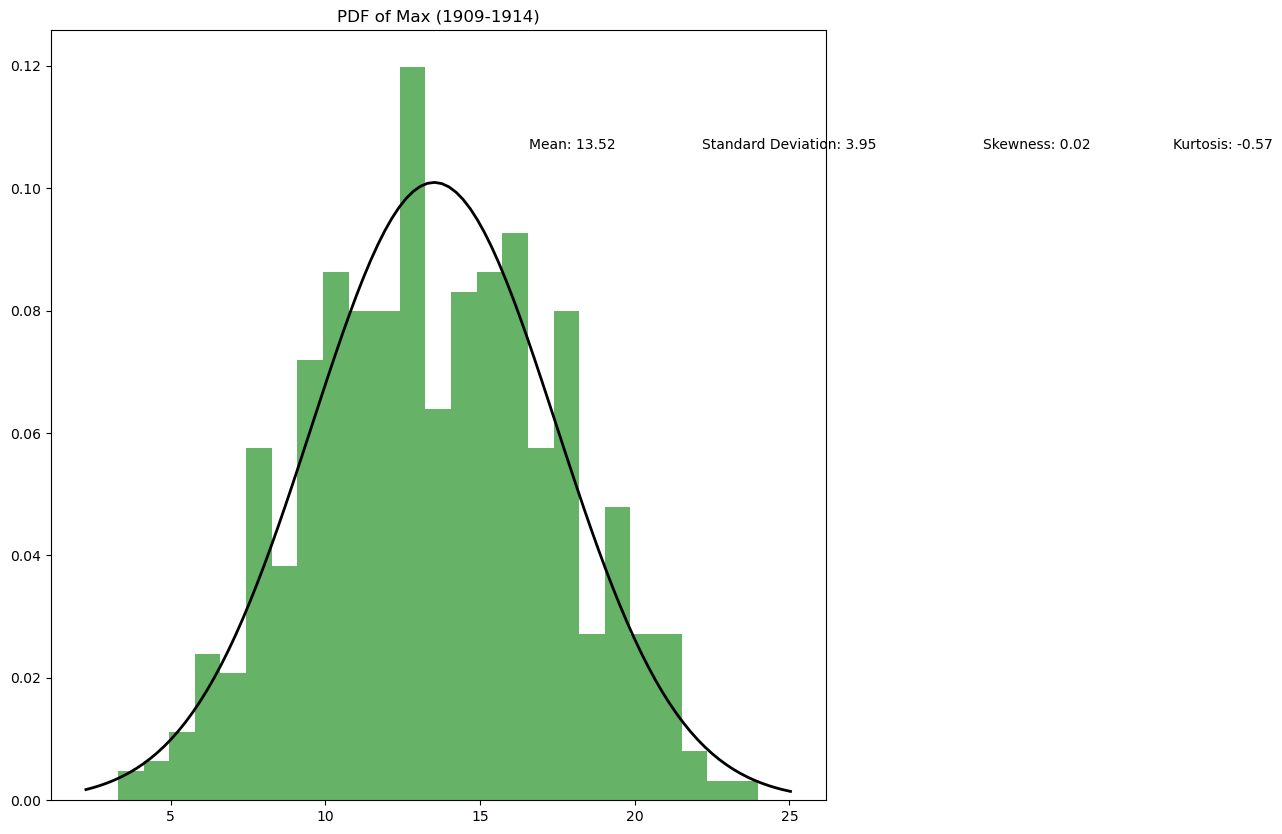

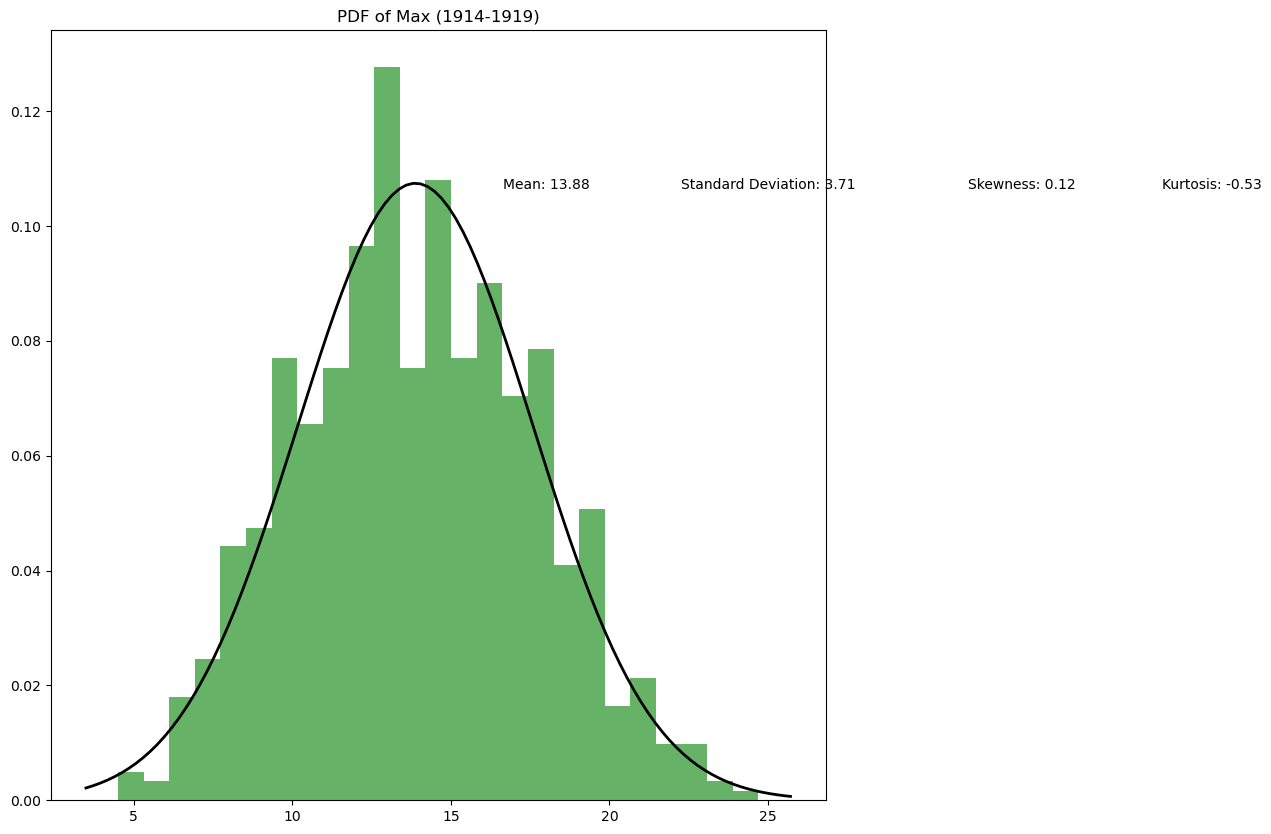

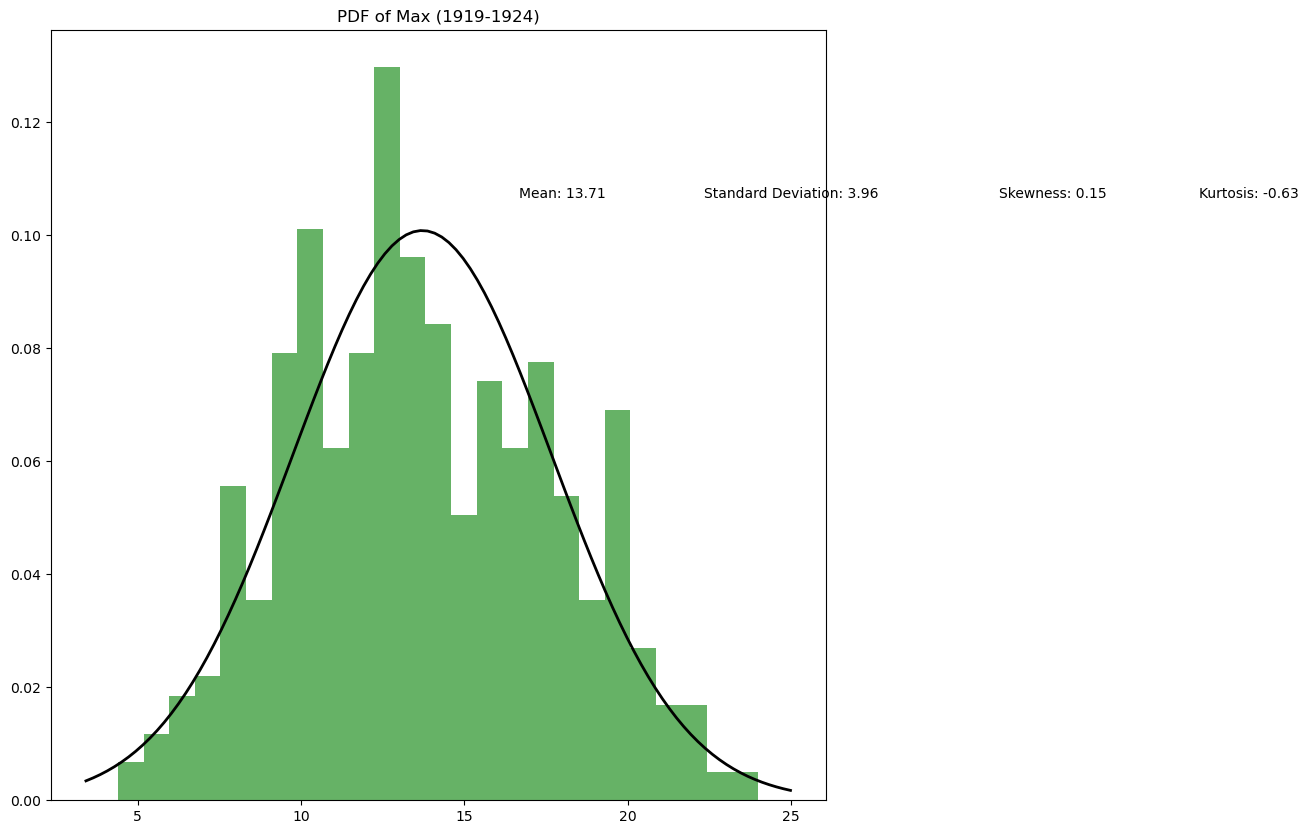

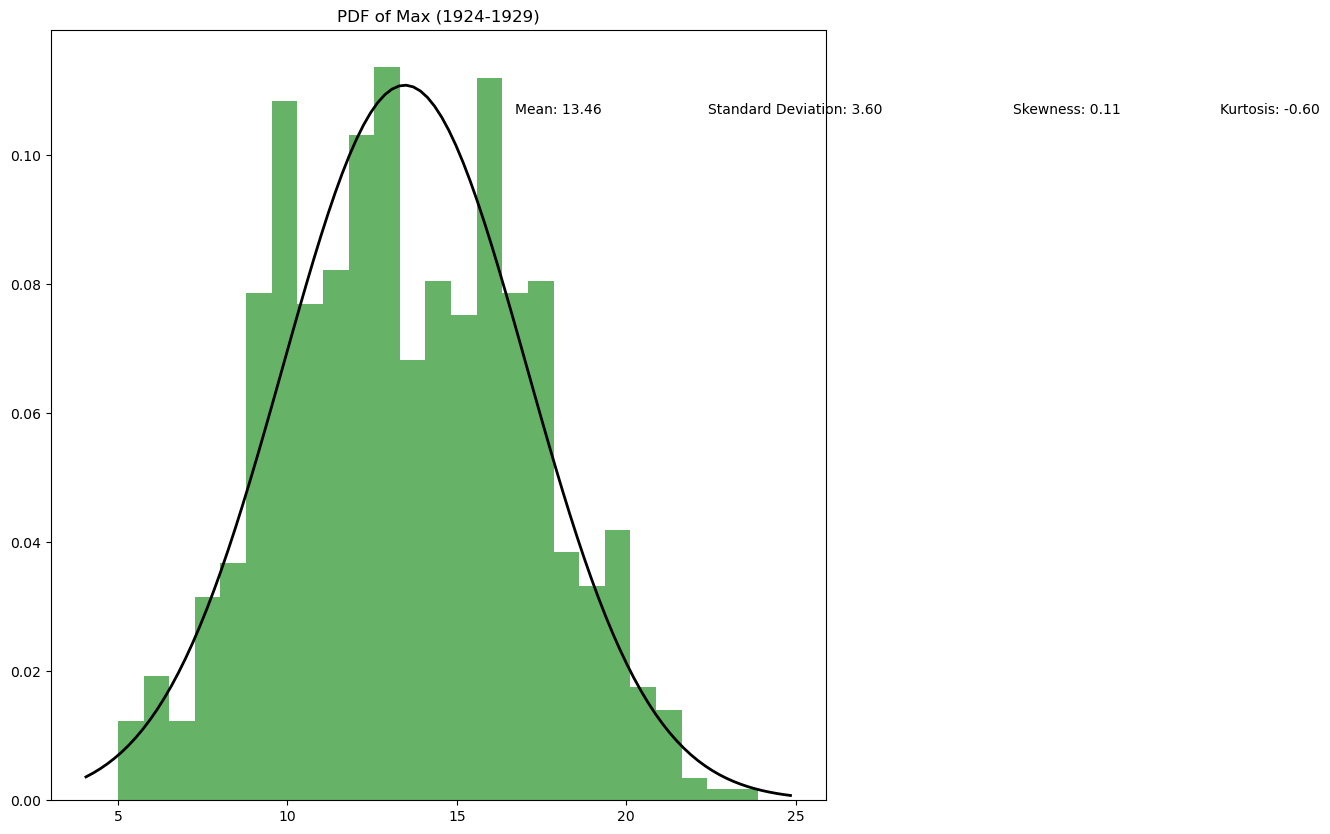

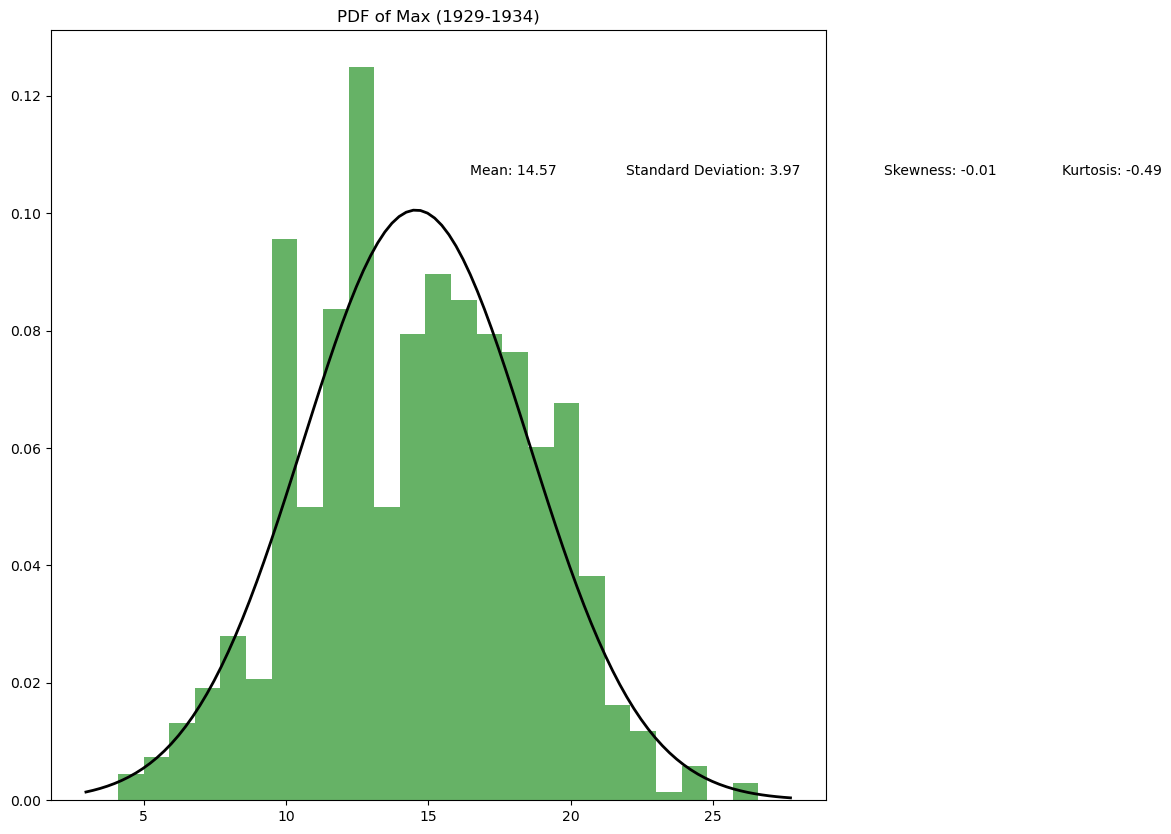

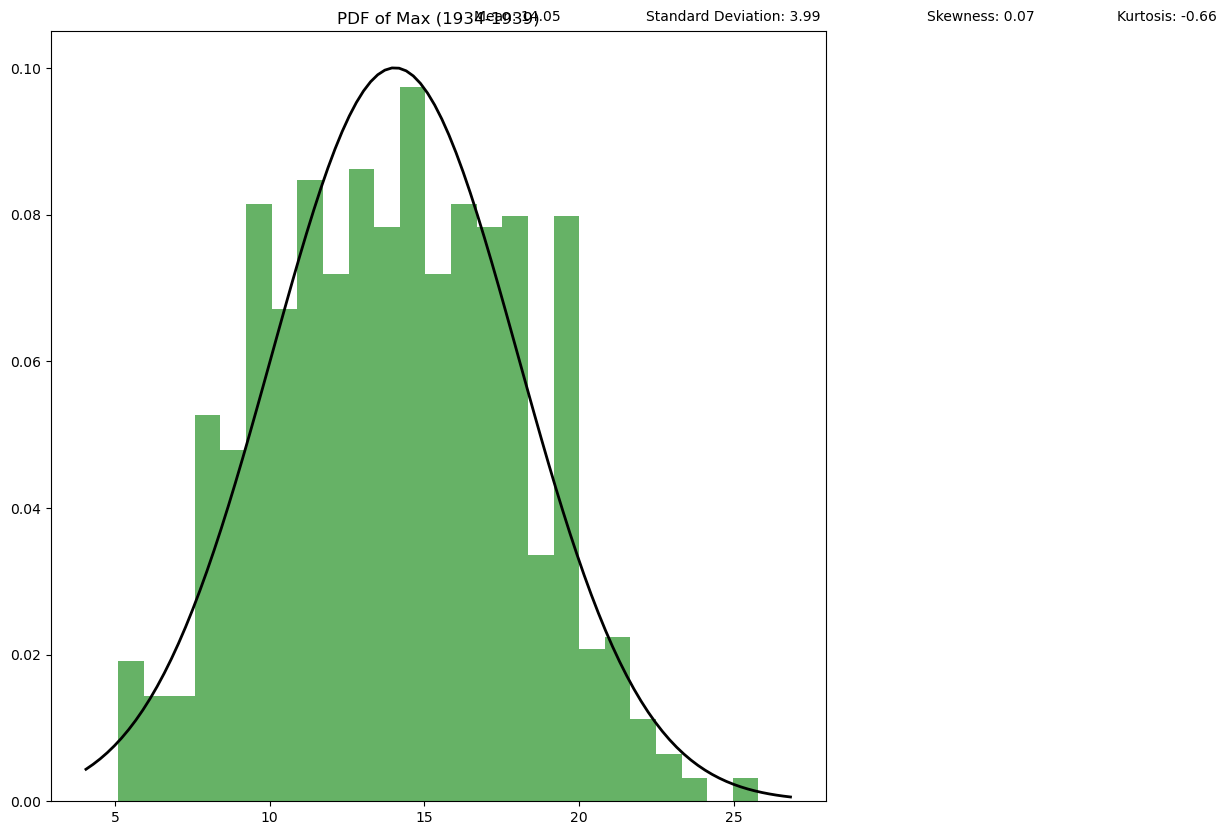

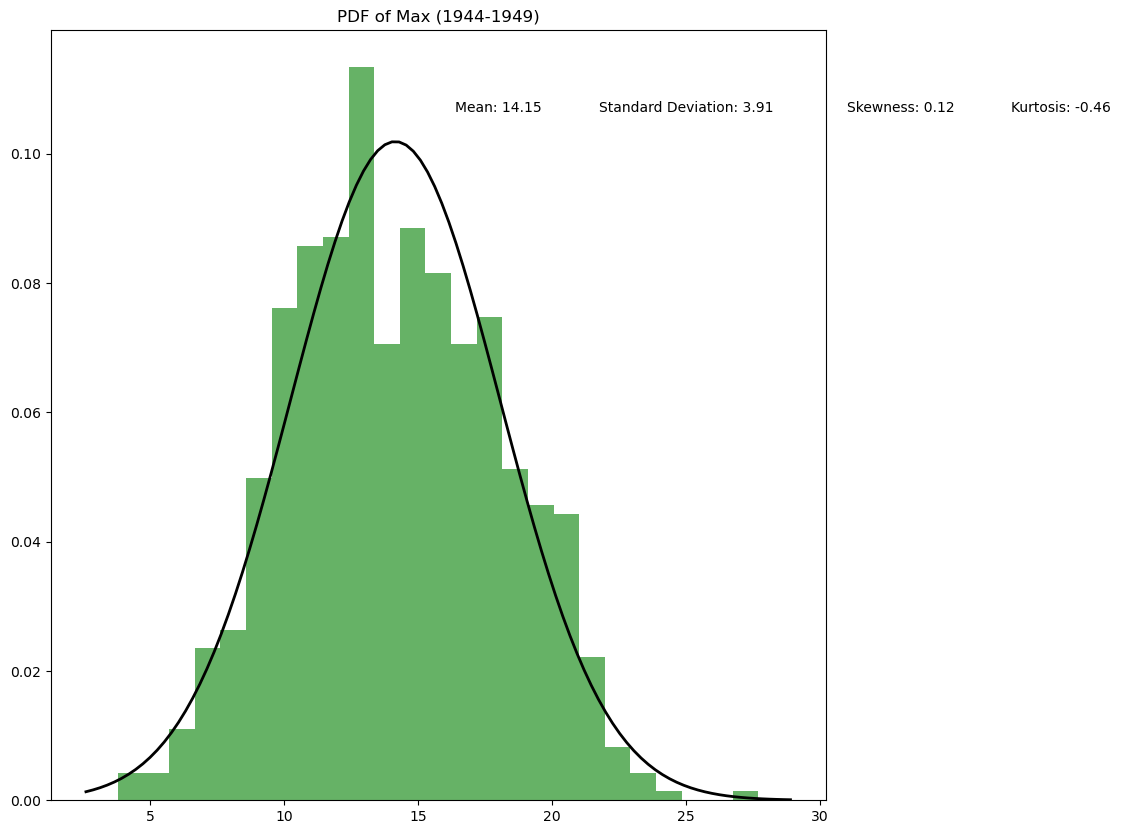

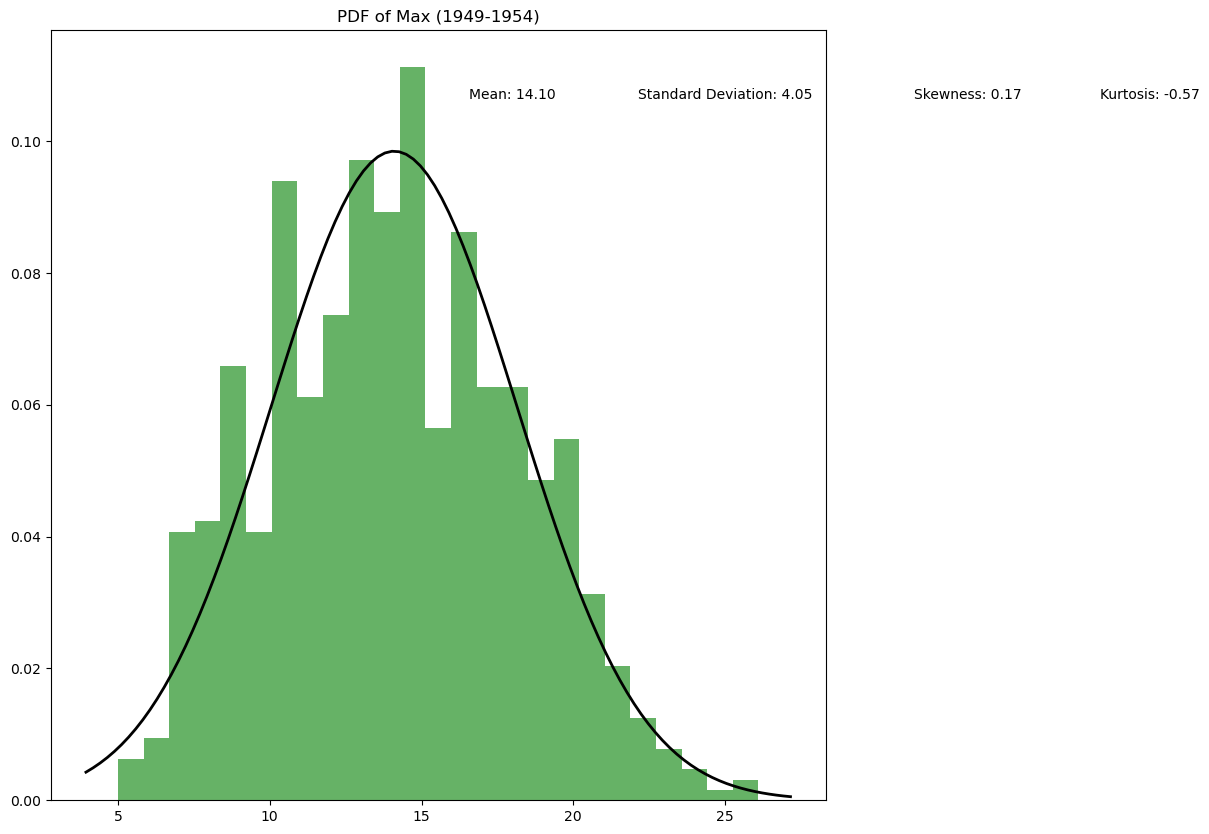

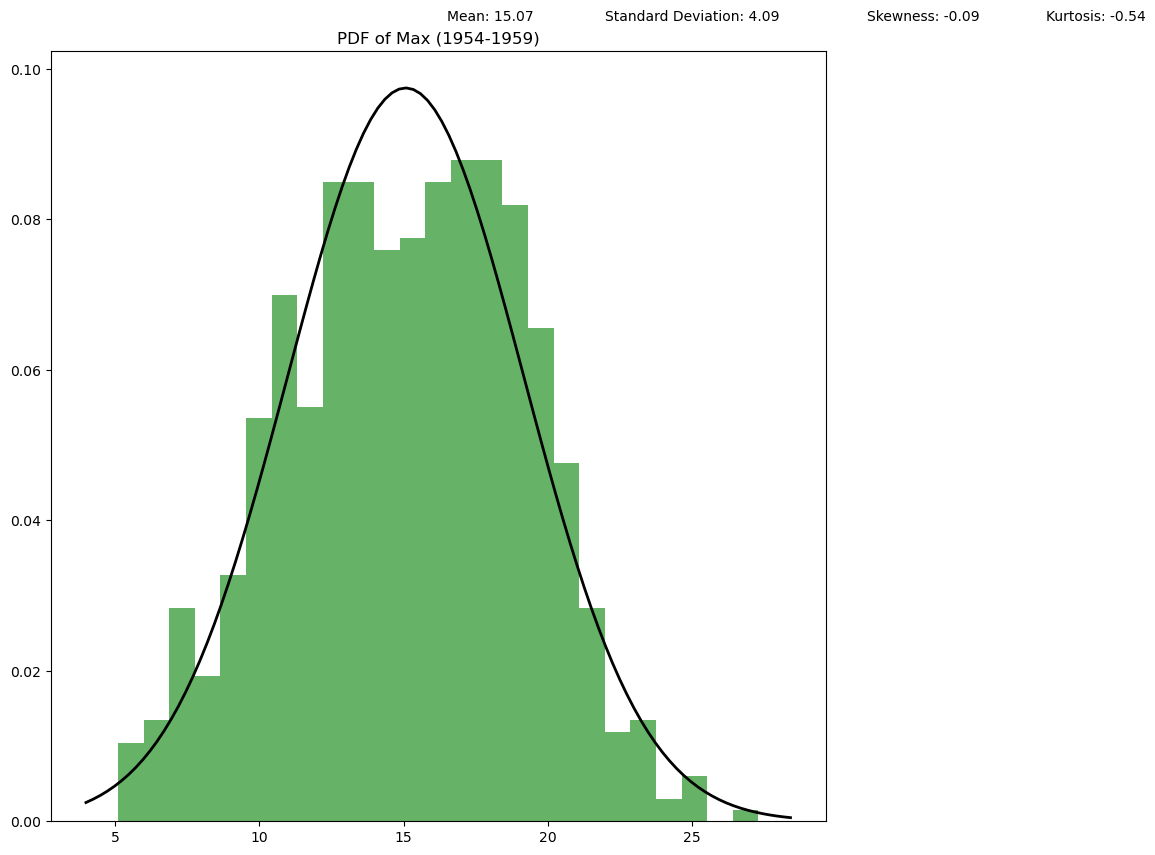

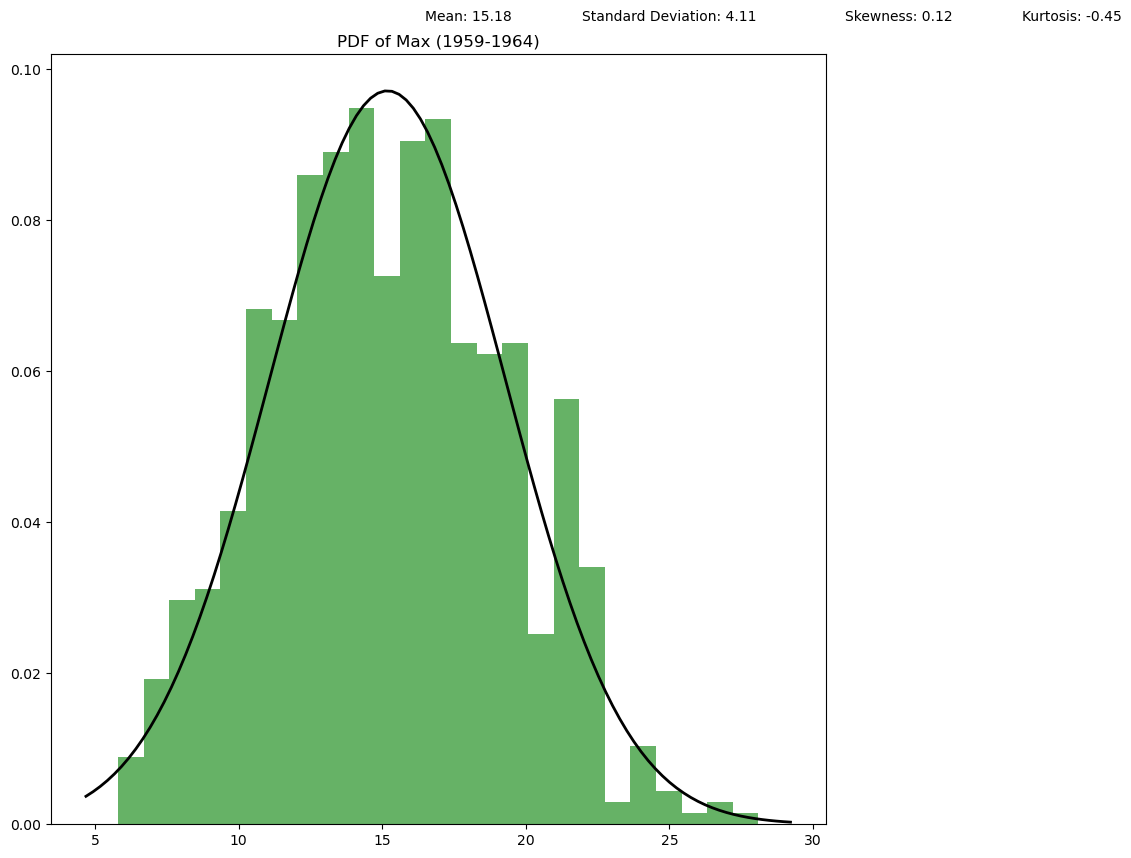

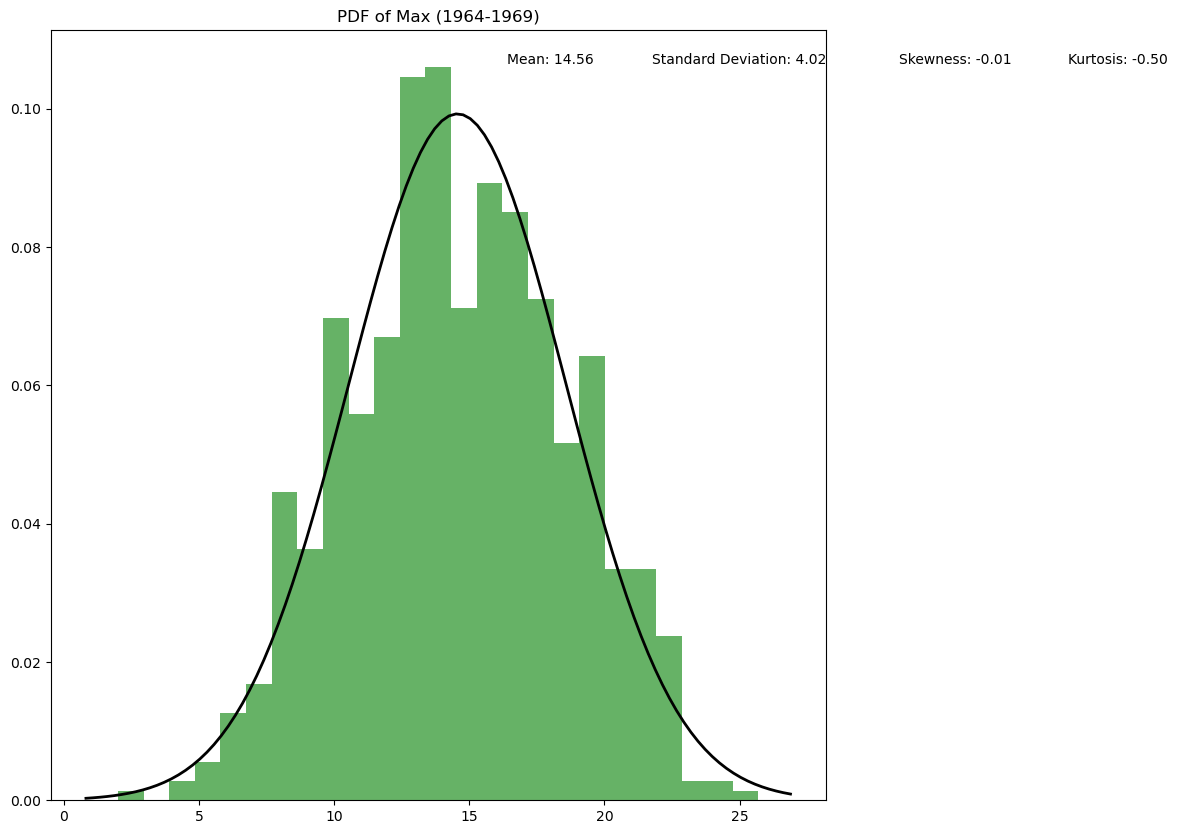

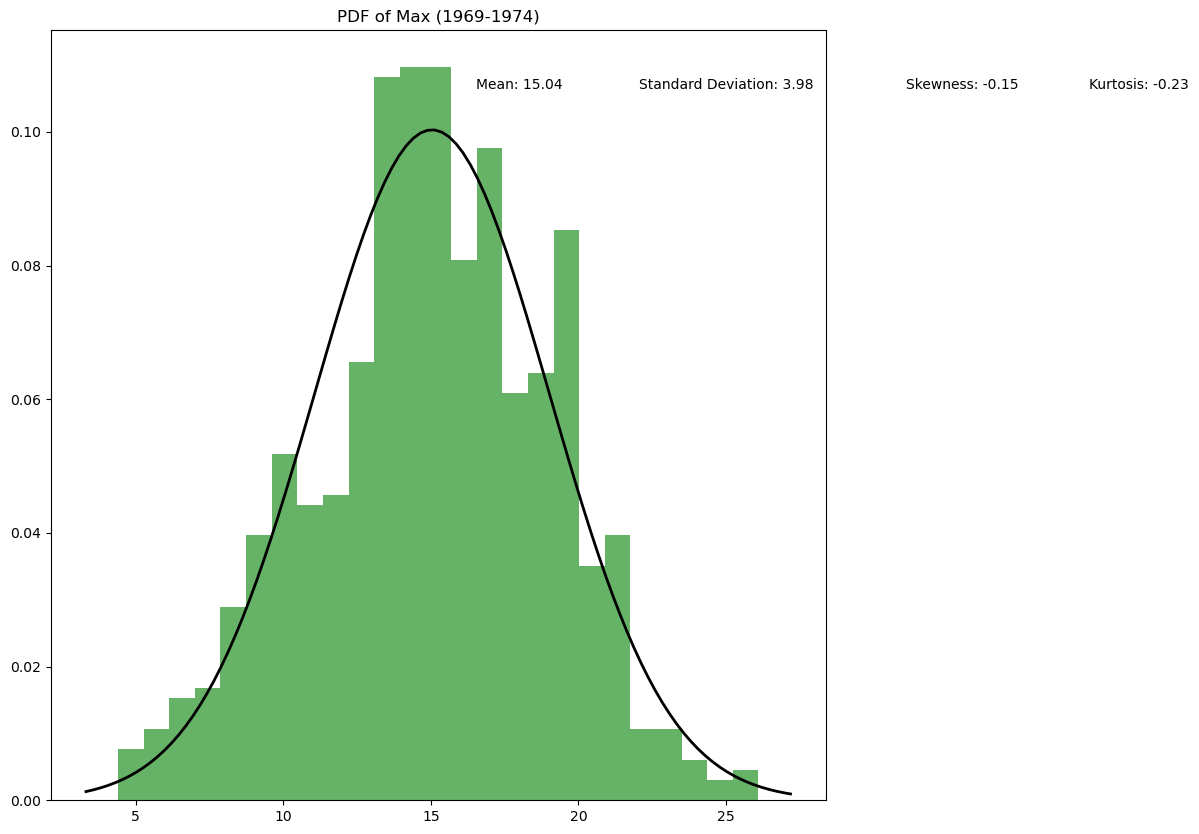

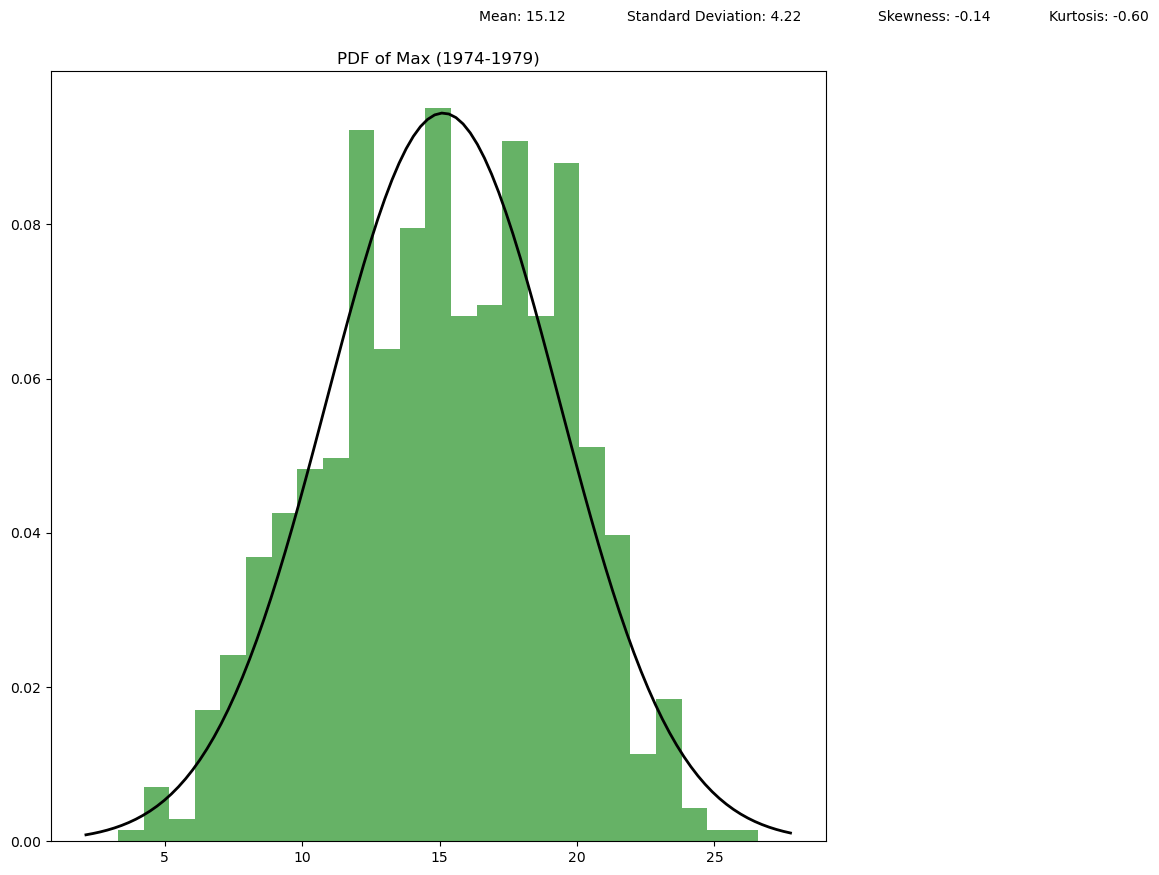

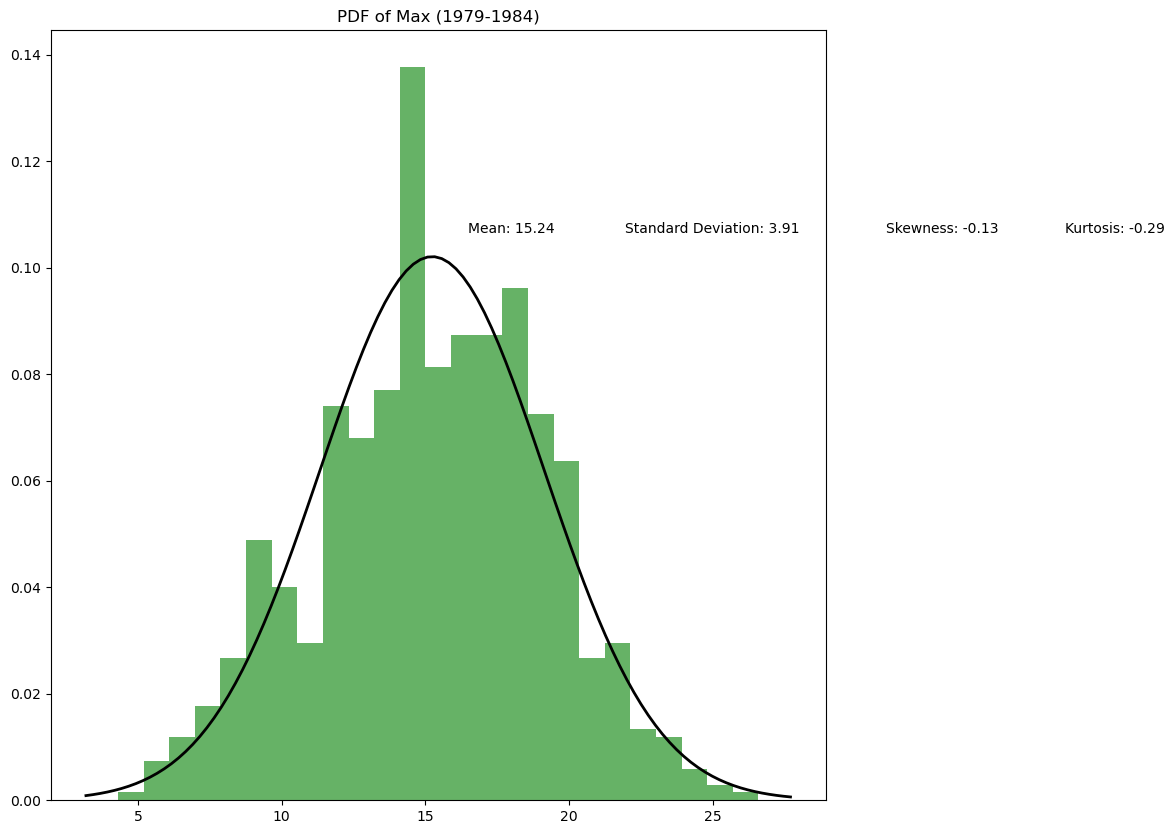

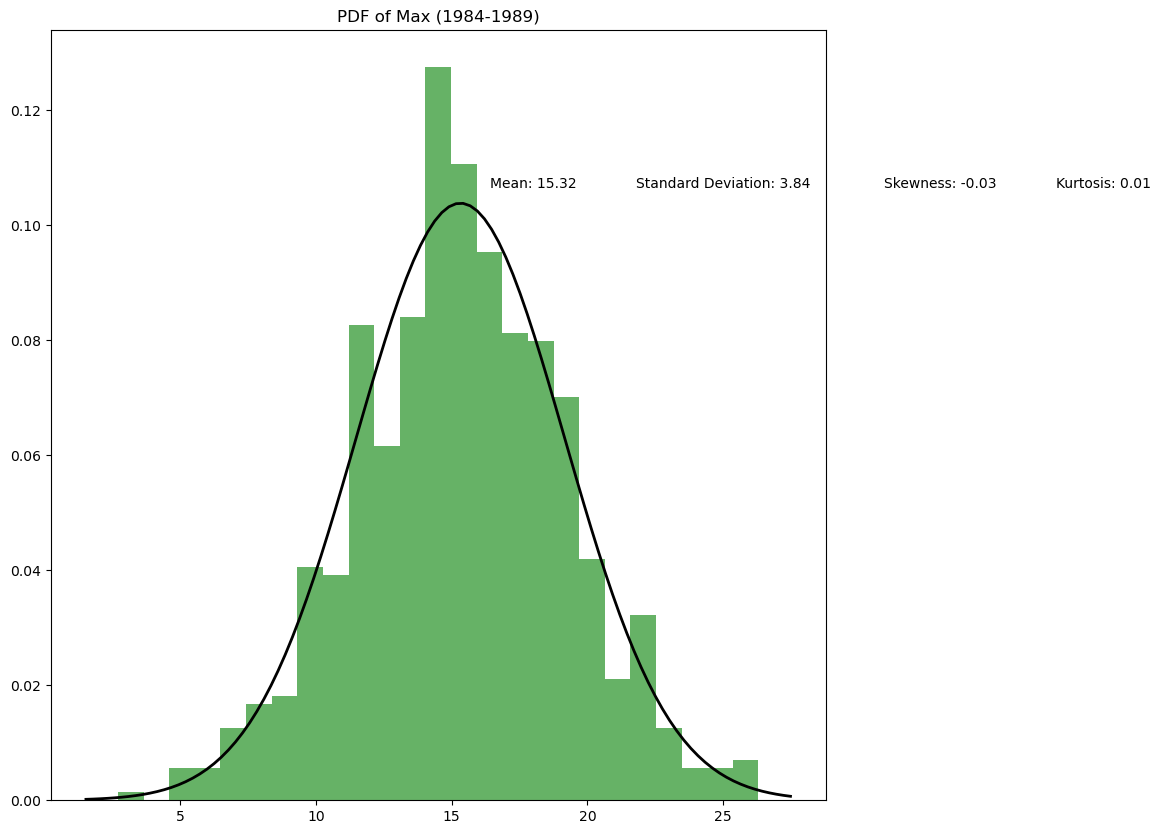

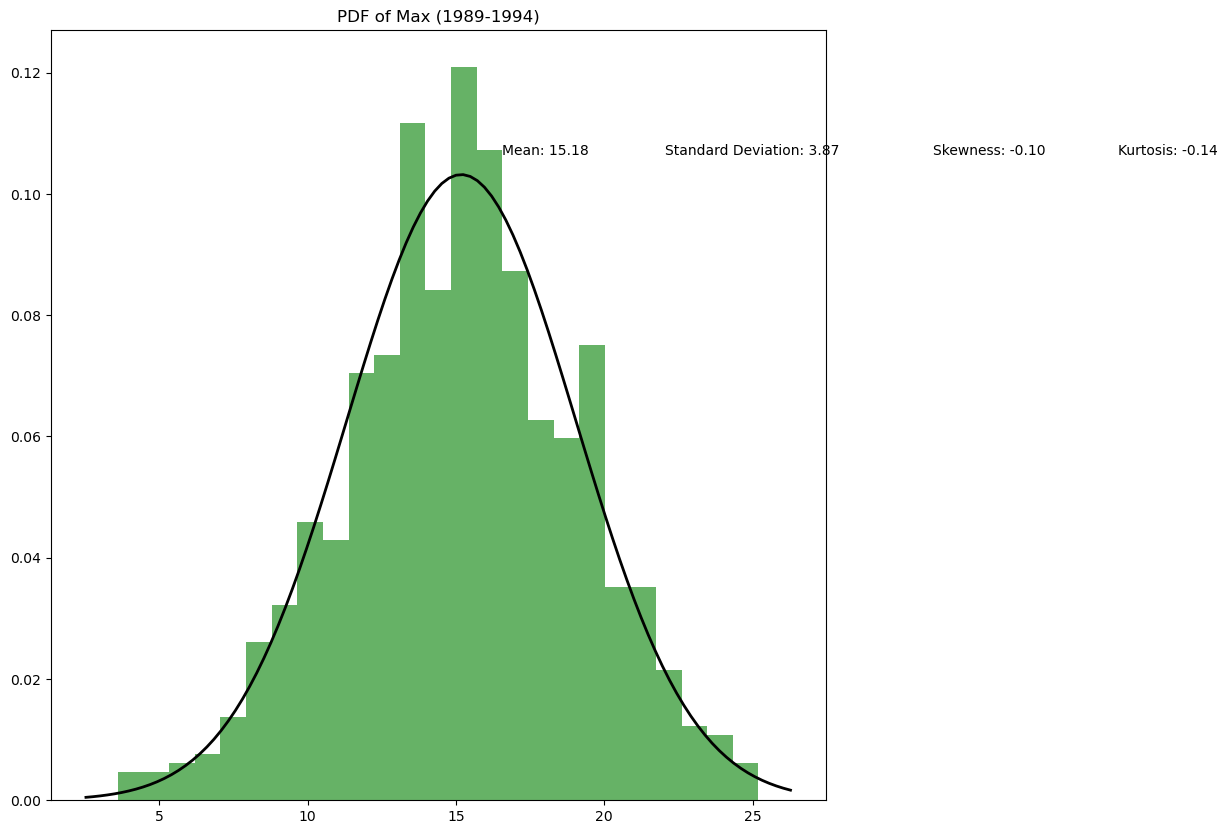

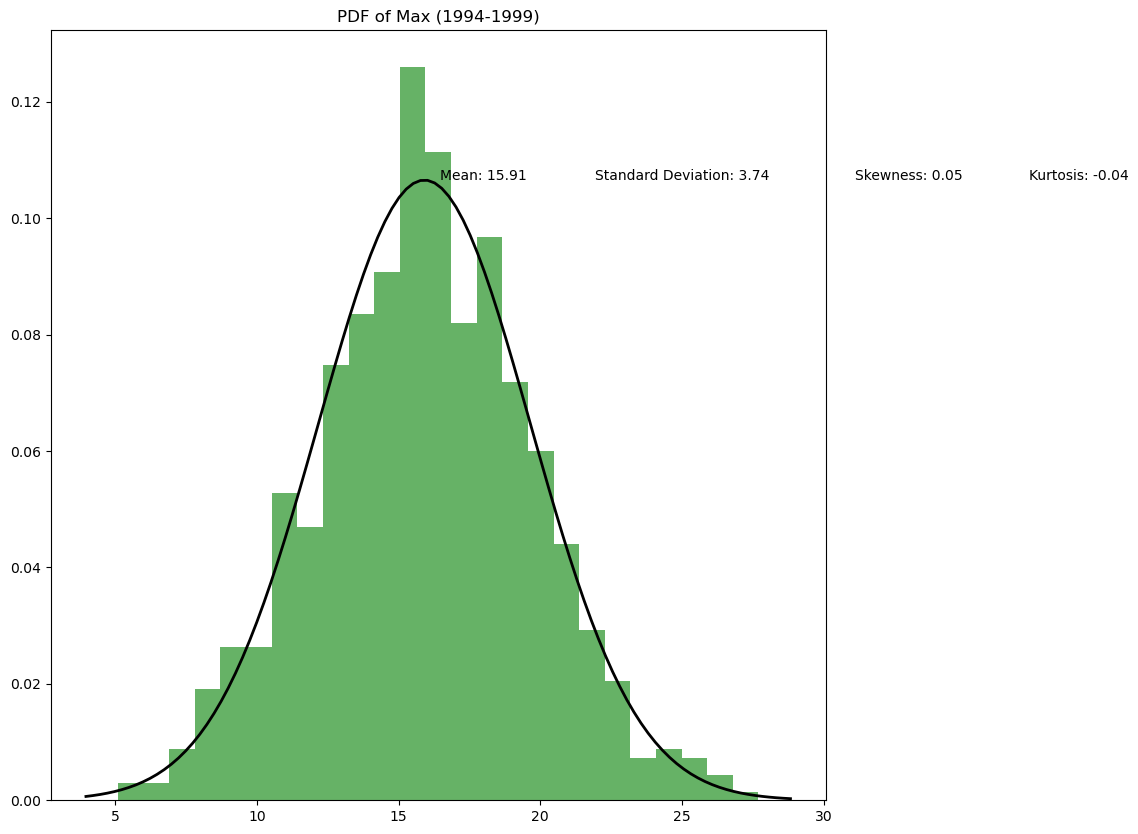

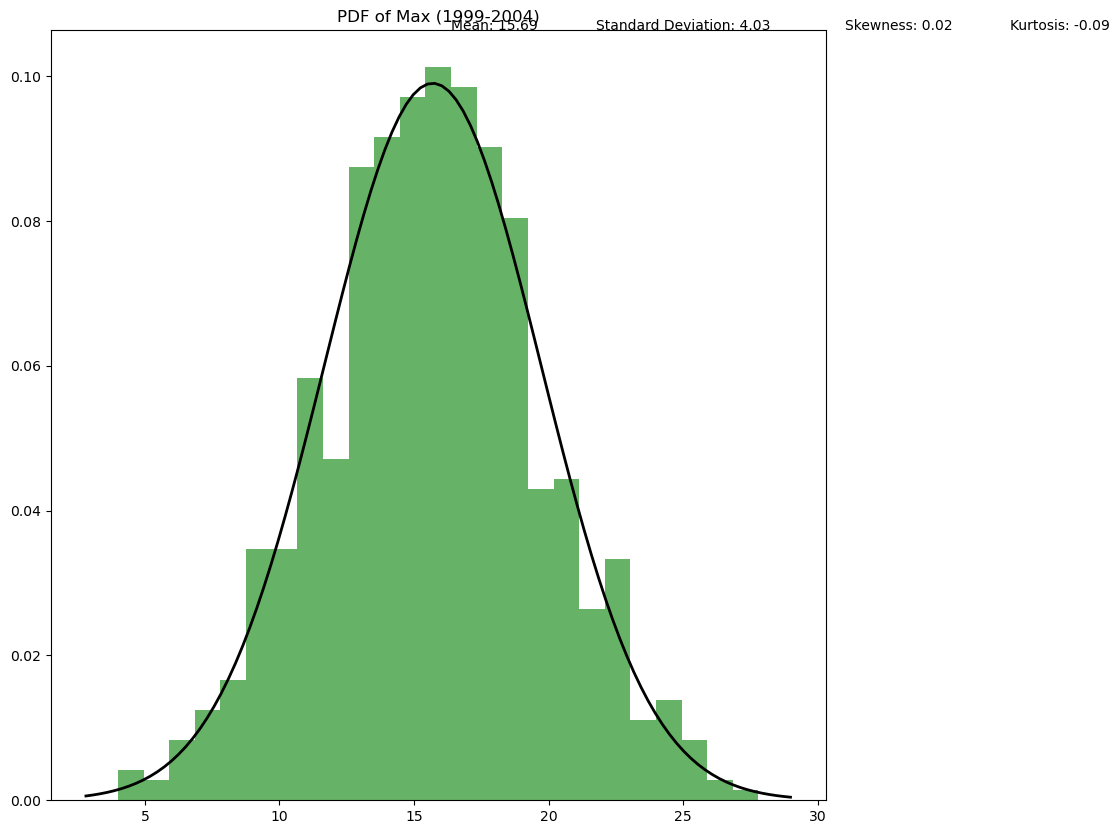

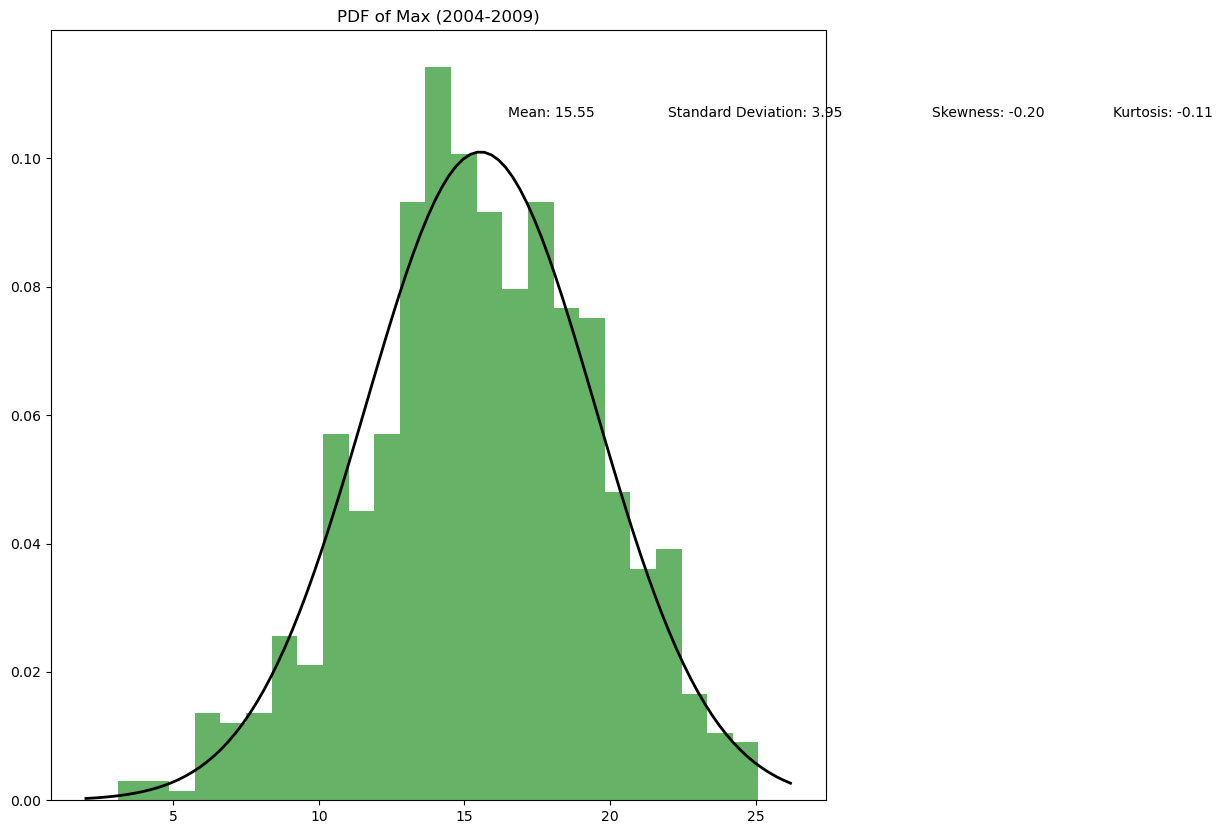

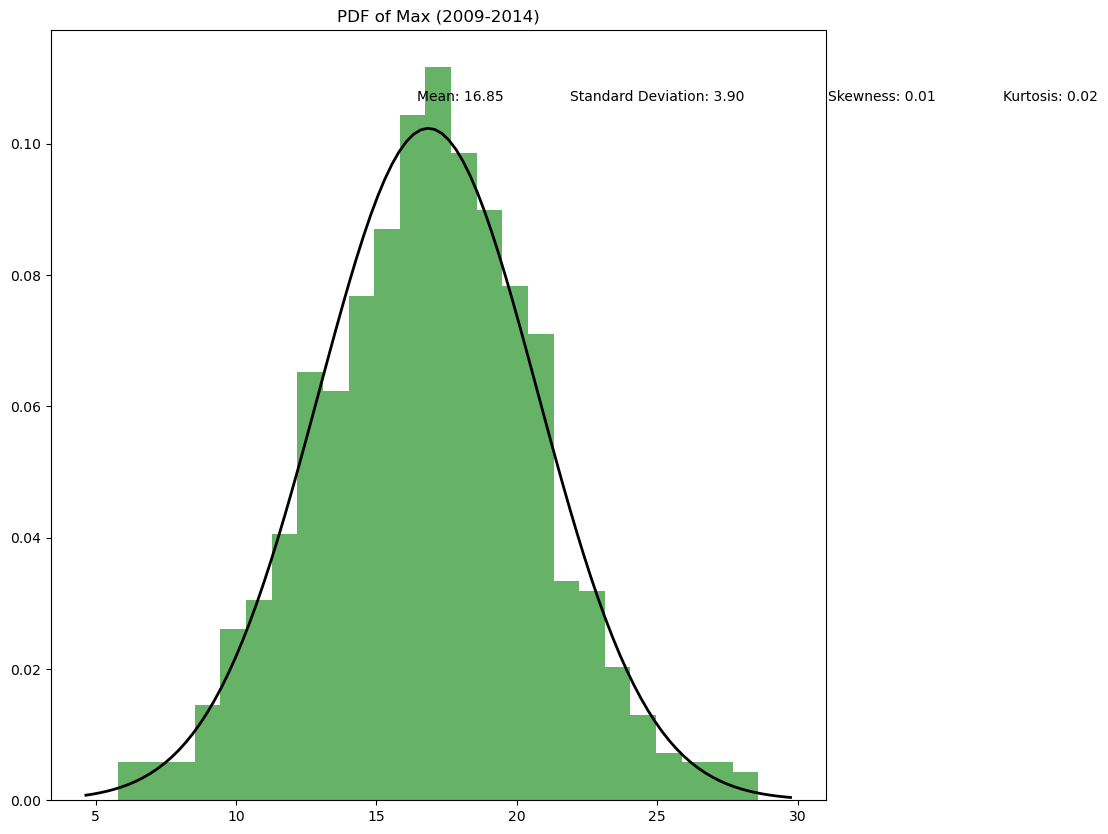

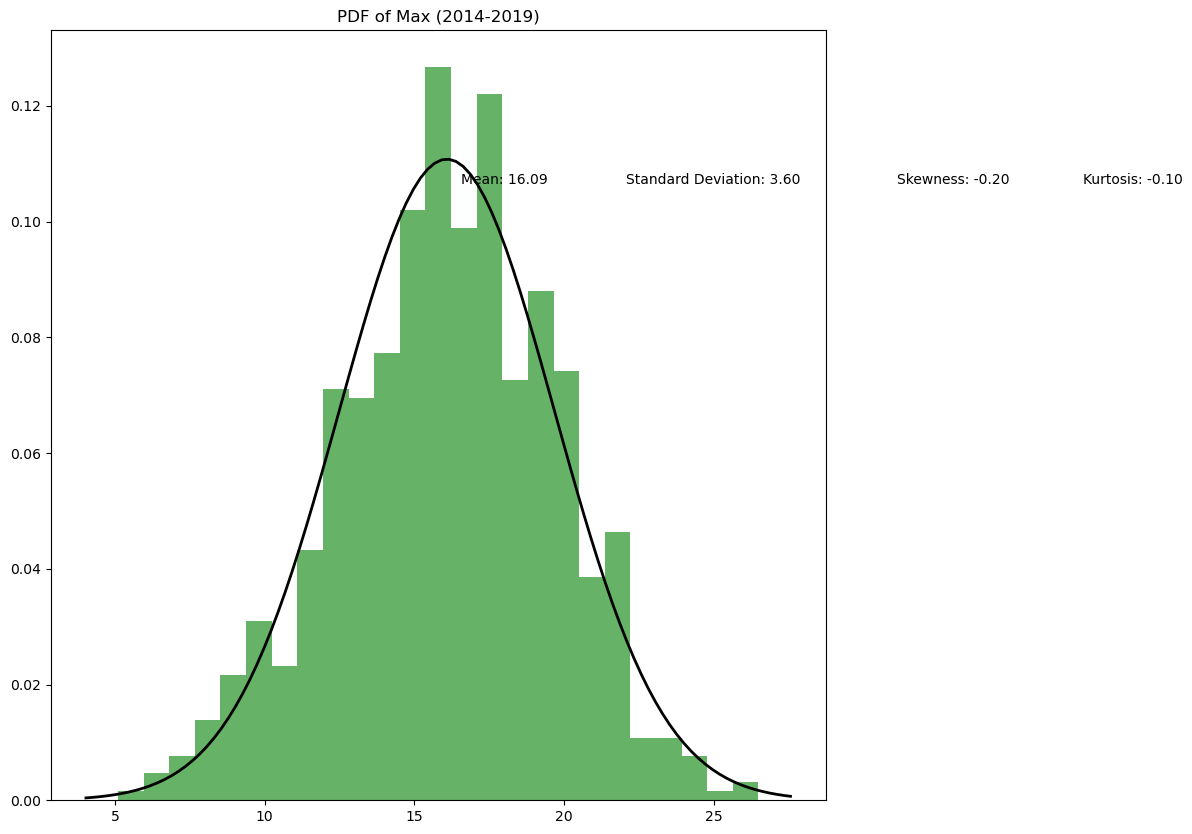

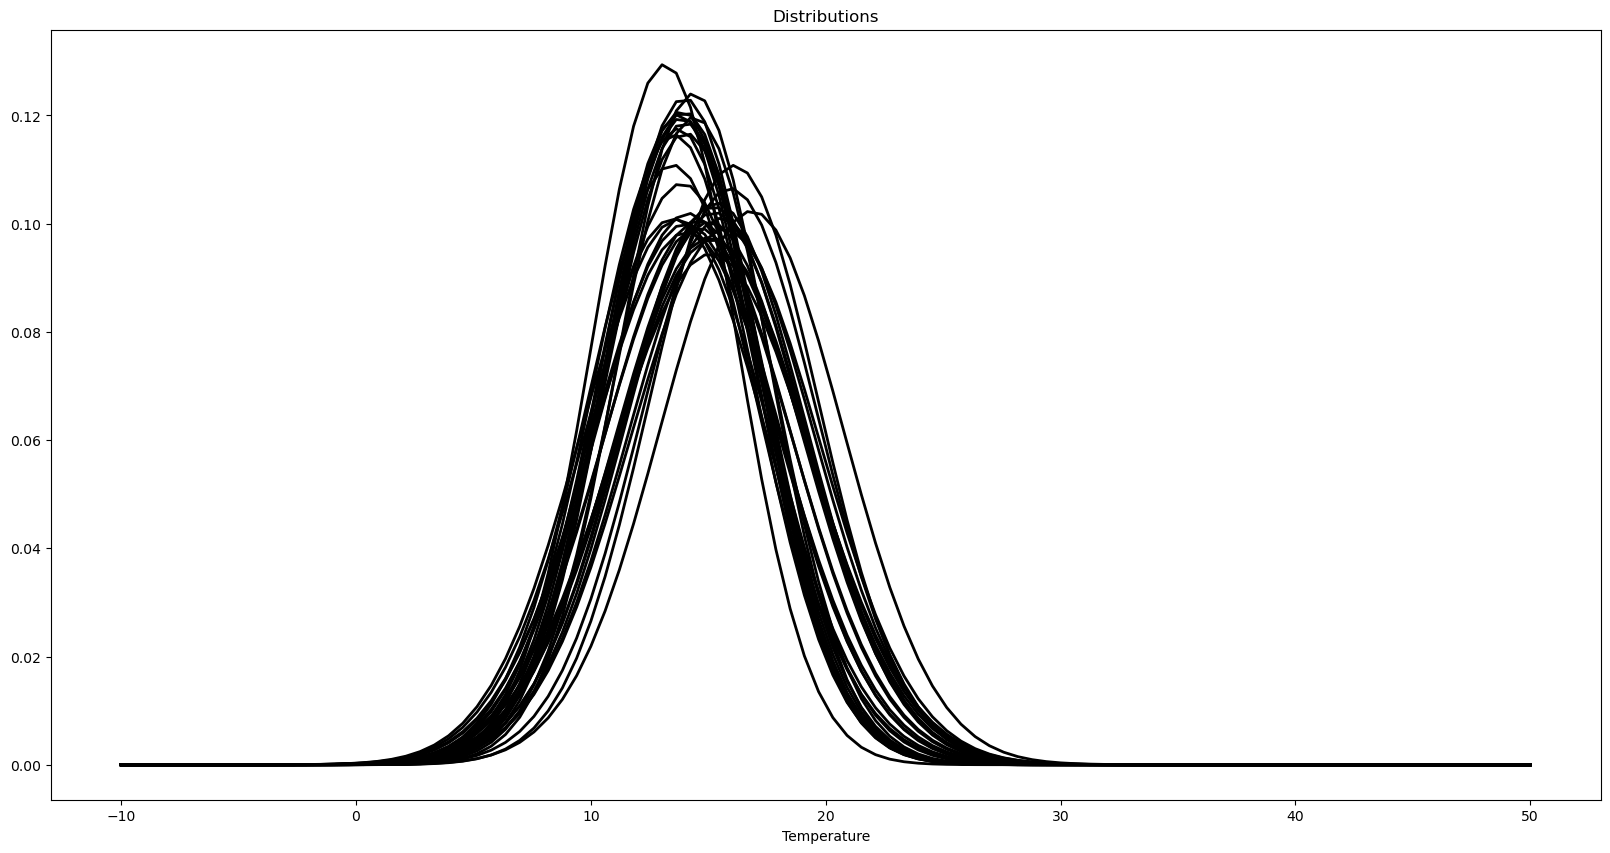

In [298]:
i = 2
Data_Set = 'Min_Mean'

for Dates in Min:
    plt.figure(i,figsize = (10,10))
    i = i+1
    
    data = Dates["Min_Mean"].dropna()
    
    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Importing library
    from scipy.stats import skew
    St_Y = data.reset_index()['date'].dt.year.min()
    St_E = data.reset_index()['date'].dt.year.max()


    Sk = skew(data, axis=0, bias=True)
    Ku = kurtosis(data, axis=0, bias=True)
    # Add annotations for statistical measures
    plt.text(18, 0.106, f"Mean: {mu:.2f}", ha='center', va='bottom')
    plt.text(25, 0.106, f"Standard Deviation: {std:.2f}", ha='center', va='bottom')
    plt.text(33, 0.106, f"Skewness: {Sk:.2f}", ha='center', va='bottom')
    plt.text(39, 0.106, f"Kurtosis: {Ku:.2f}", ha='center', va='bottom')

    # Show the plot
    title = "PDF of {} ({}-{})".format('Max',St_Y,St_E)
    plt.title(title)

    
    plt.figure(1,figsize = (20,10))

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(-10, 50, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2,label =  "{}-{}".format(St_Y,St_E))
    plt.title("Distributions")
    plt.xlabel('Temperature')

    
    
    

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\jarra\anaconda3\envs\MASTERS_JARRAD\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.7, 0.75, 'Kurtosis: -0.44')

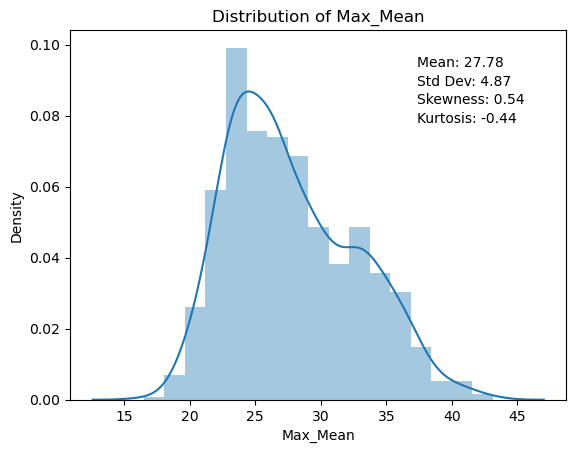

In [300]:
sns.distplot(Test, kde=True, hist=True)
plt.xlabel('Max_Mean')
plt.ylabel('Density')
plt.title('Distribution of Max_Mean')

from scipy.stats import describe

statistics = describe(Test)

mean = statistics.mean
std_dev = statistics.variance ** 0.5
skewness = statistics.skewness
kurtosis = statistics.kurtosis

# Adding statistics to the plot
plt.text(0.7, 0.9, f"Mean: {mean:.2f}", transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f"Std Dev: {std_dev:.2f}", transform=plt.gca().transAxes)
plt.text(0.7, 0.8, f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
plt.text(0.7, 0.75, f"Kurtosis: {kurtosis:.2f}", transform=plt.gca().transAxes)




In [301]:
Test

date
1841-01-01    33.4
1841-01-02    34.5
1841-01-04    30.6
1841-01-05    34.5
1841-01-06    22.7
              ... 
1844-12-27    34.5
1844-12-28    32.7
1844-12-29    33.9
1844-12-30    23.8
1844-12-31    25.6
Name: Max_Mean, Length: 735, dtype: float64

In [302]:
len(Max
   )

34

In [303]:
len(Min)

33

In [304]:
Max



[            Max_Mean  Min_Mean
 date                          
 1831-01-01      25.8      15.7
 1831-01-02       NaN      12.6
 1831-01-03      41.5      22.2
 1831-01-04      42.5      23.3
 1831-01-05      30.6      11.6
 ...              ...       ...
 1834-12-27      35.1      16.7
 1834-12-28      26.7      11.5
 1834-12-29      24.9      12.7
 1834-12-30      26.7      11.8
 1834-12-31      24.9      12.8
 
 [756 rows x 2 columns],
             Max_Mean  Min_Mean
 date                          
 1836-01-01      26.7      12.1
 1836-01-02      23.9      13.4
 1836-01-03      27.7      12.0
 1836-01-04      21.8       9.4
 1836-01-05      22.3      10.6
 ...              ...       ...
 1839-12-27      33.3      14.5
 1839-12-28      33.9      14.5
 1839-12-29       NaN       NaN
 1839-12-30      26.7      16.5
 1839-12-31      36.3      15.7
 
 [757 rows x 2 columns],
             Max_Mean  Min_Mean
 date                          
 1841-01-01      33.4      14.3
 1841-01-02      3

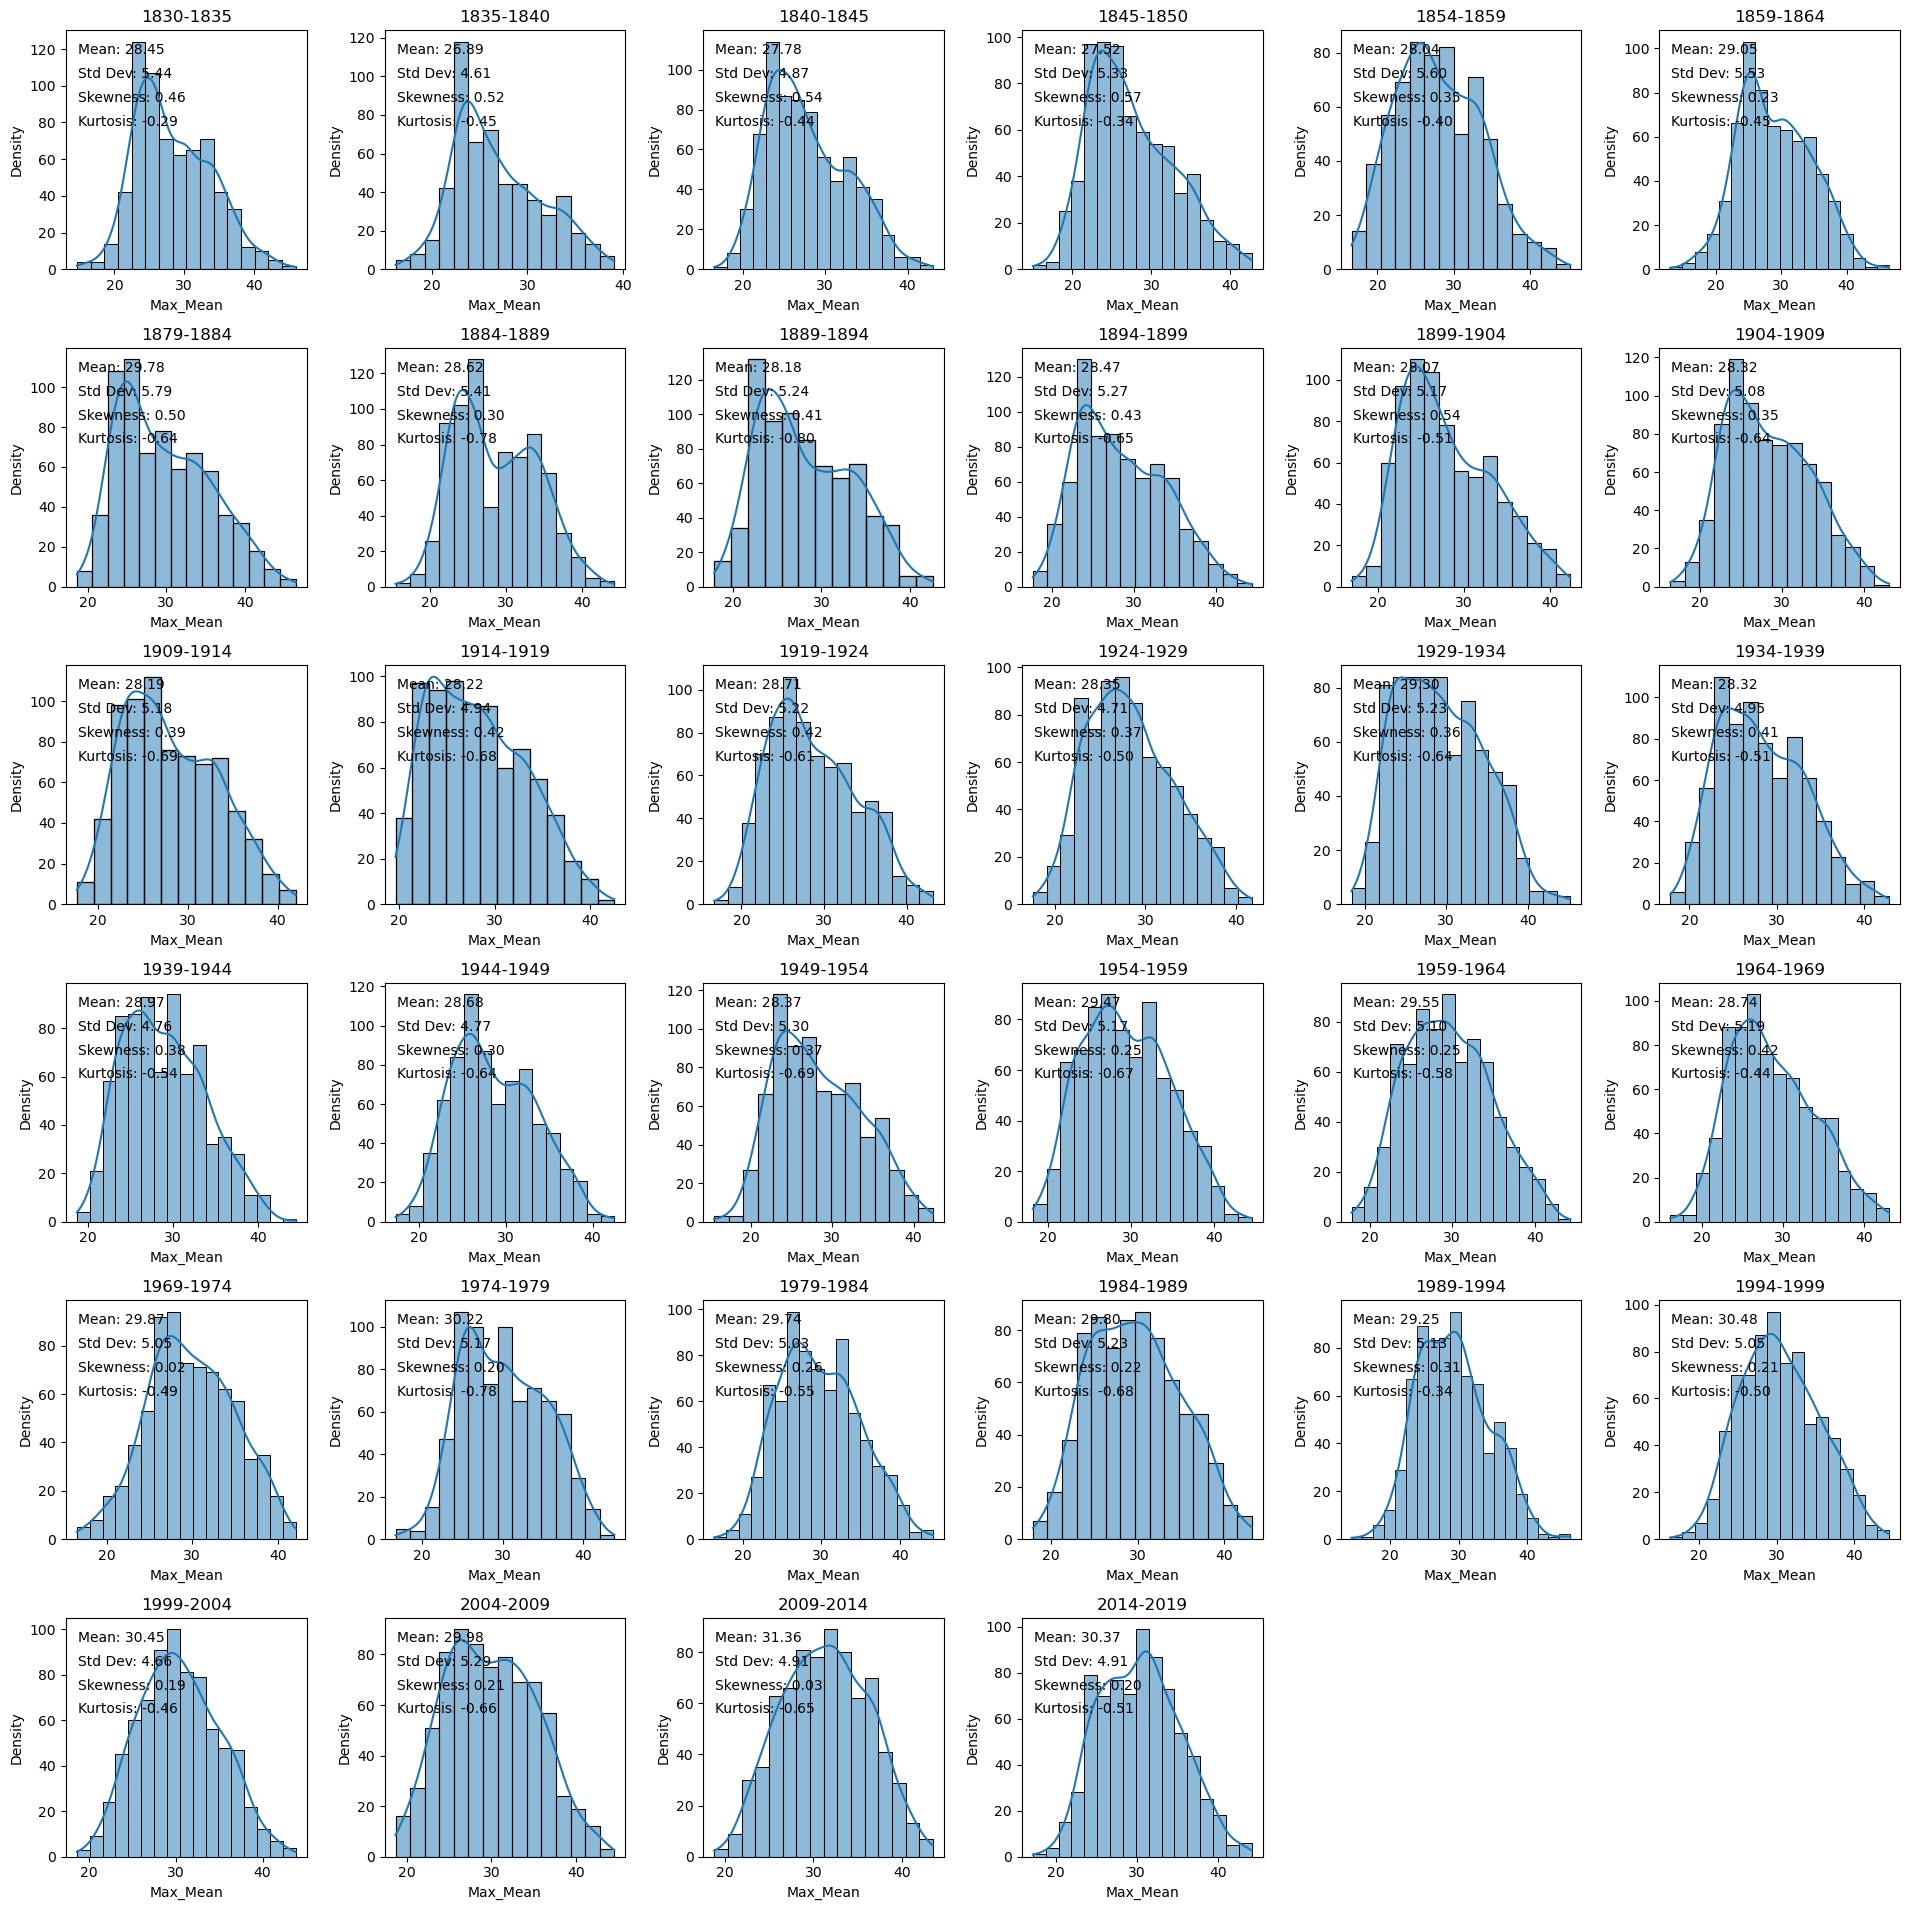

In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import describe

# Assuming you have a list of 34 DataFrames called Max

# Create a figure and subplots with increased size
fig, axs = plt.subplots(6, 6, figsize=(19.2, 19.2))  # Increase size by 20%
fig.subplots_adjust(hspace=0.6, wspace=0.4)  # Adjust the vertical and horizontal spacing between subplots

# Iterate through each DataFrame and create subplots
for i, df in enumerate(Max):
    # Get the start and end years from the DataFrame's index
    start_year = df.index.min().year
    end_year = df.index.max().year

    # Remove NaN values from Max_Mean column
    df_cleaned = df.dropna(subset=['Max_Mean'])

    # Calculate the statistical measures for Max_Mean column
    statistics = describe(df_cleaned['Max_Mean'])
    mean = statistics.mean
    std_dev = statistics.variance ** 0.5
    skewness = statistics.skewness
    kurtosis = statistics.kurtosis

    # Determine the row and column index for the subplot
    row = i // 6
    col = i % 6

    # Plot the distribution
    sns.histplot(df_cleaned['Max_Mean'], kde=True, ax=axs[row, col])
    axs[row, col].set_xlabel('Max_Mean')
    axs[row, col].set_ylabel('Density')
    axs[row, col].set_title(f'{start_year}-{end_year}')

    # Add statistics as text annotations in the subplot with improved separation
    axs[row, col].text(0.05, 0.9, f"Mean: {mean:.2f}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.05, 0.8, f"Std Dev: {std_dev:.2f}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.05, 0.7, f"Skewness: {skewness:.2f}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.05, 0.6, f"Kurtosis: {kurtosis:.2f}", transform=axs[row, col].transAxes, fontsize=10)

# Remove any remaining empty subplots
if len(Max) < 36:
    for i in range(len(Max), 36):
        row = i // 6
        col = i % 6
        fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()



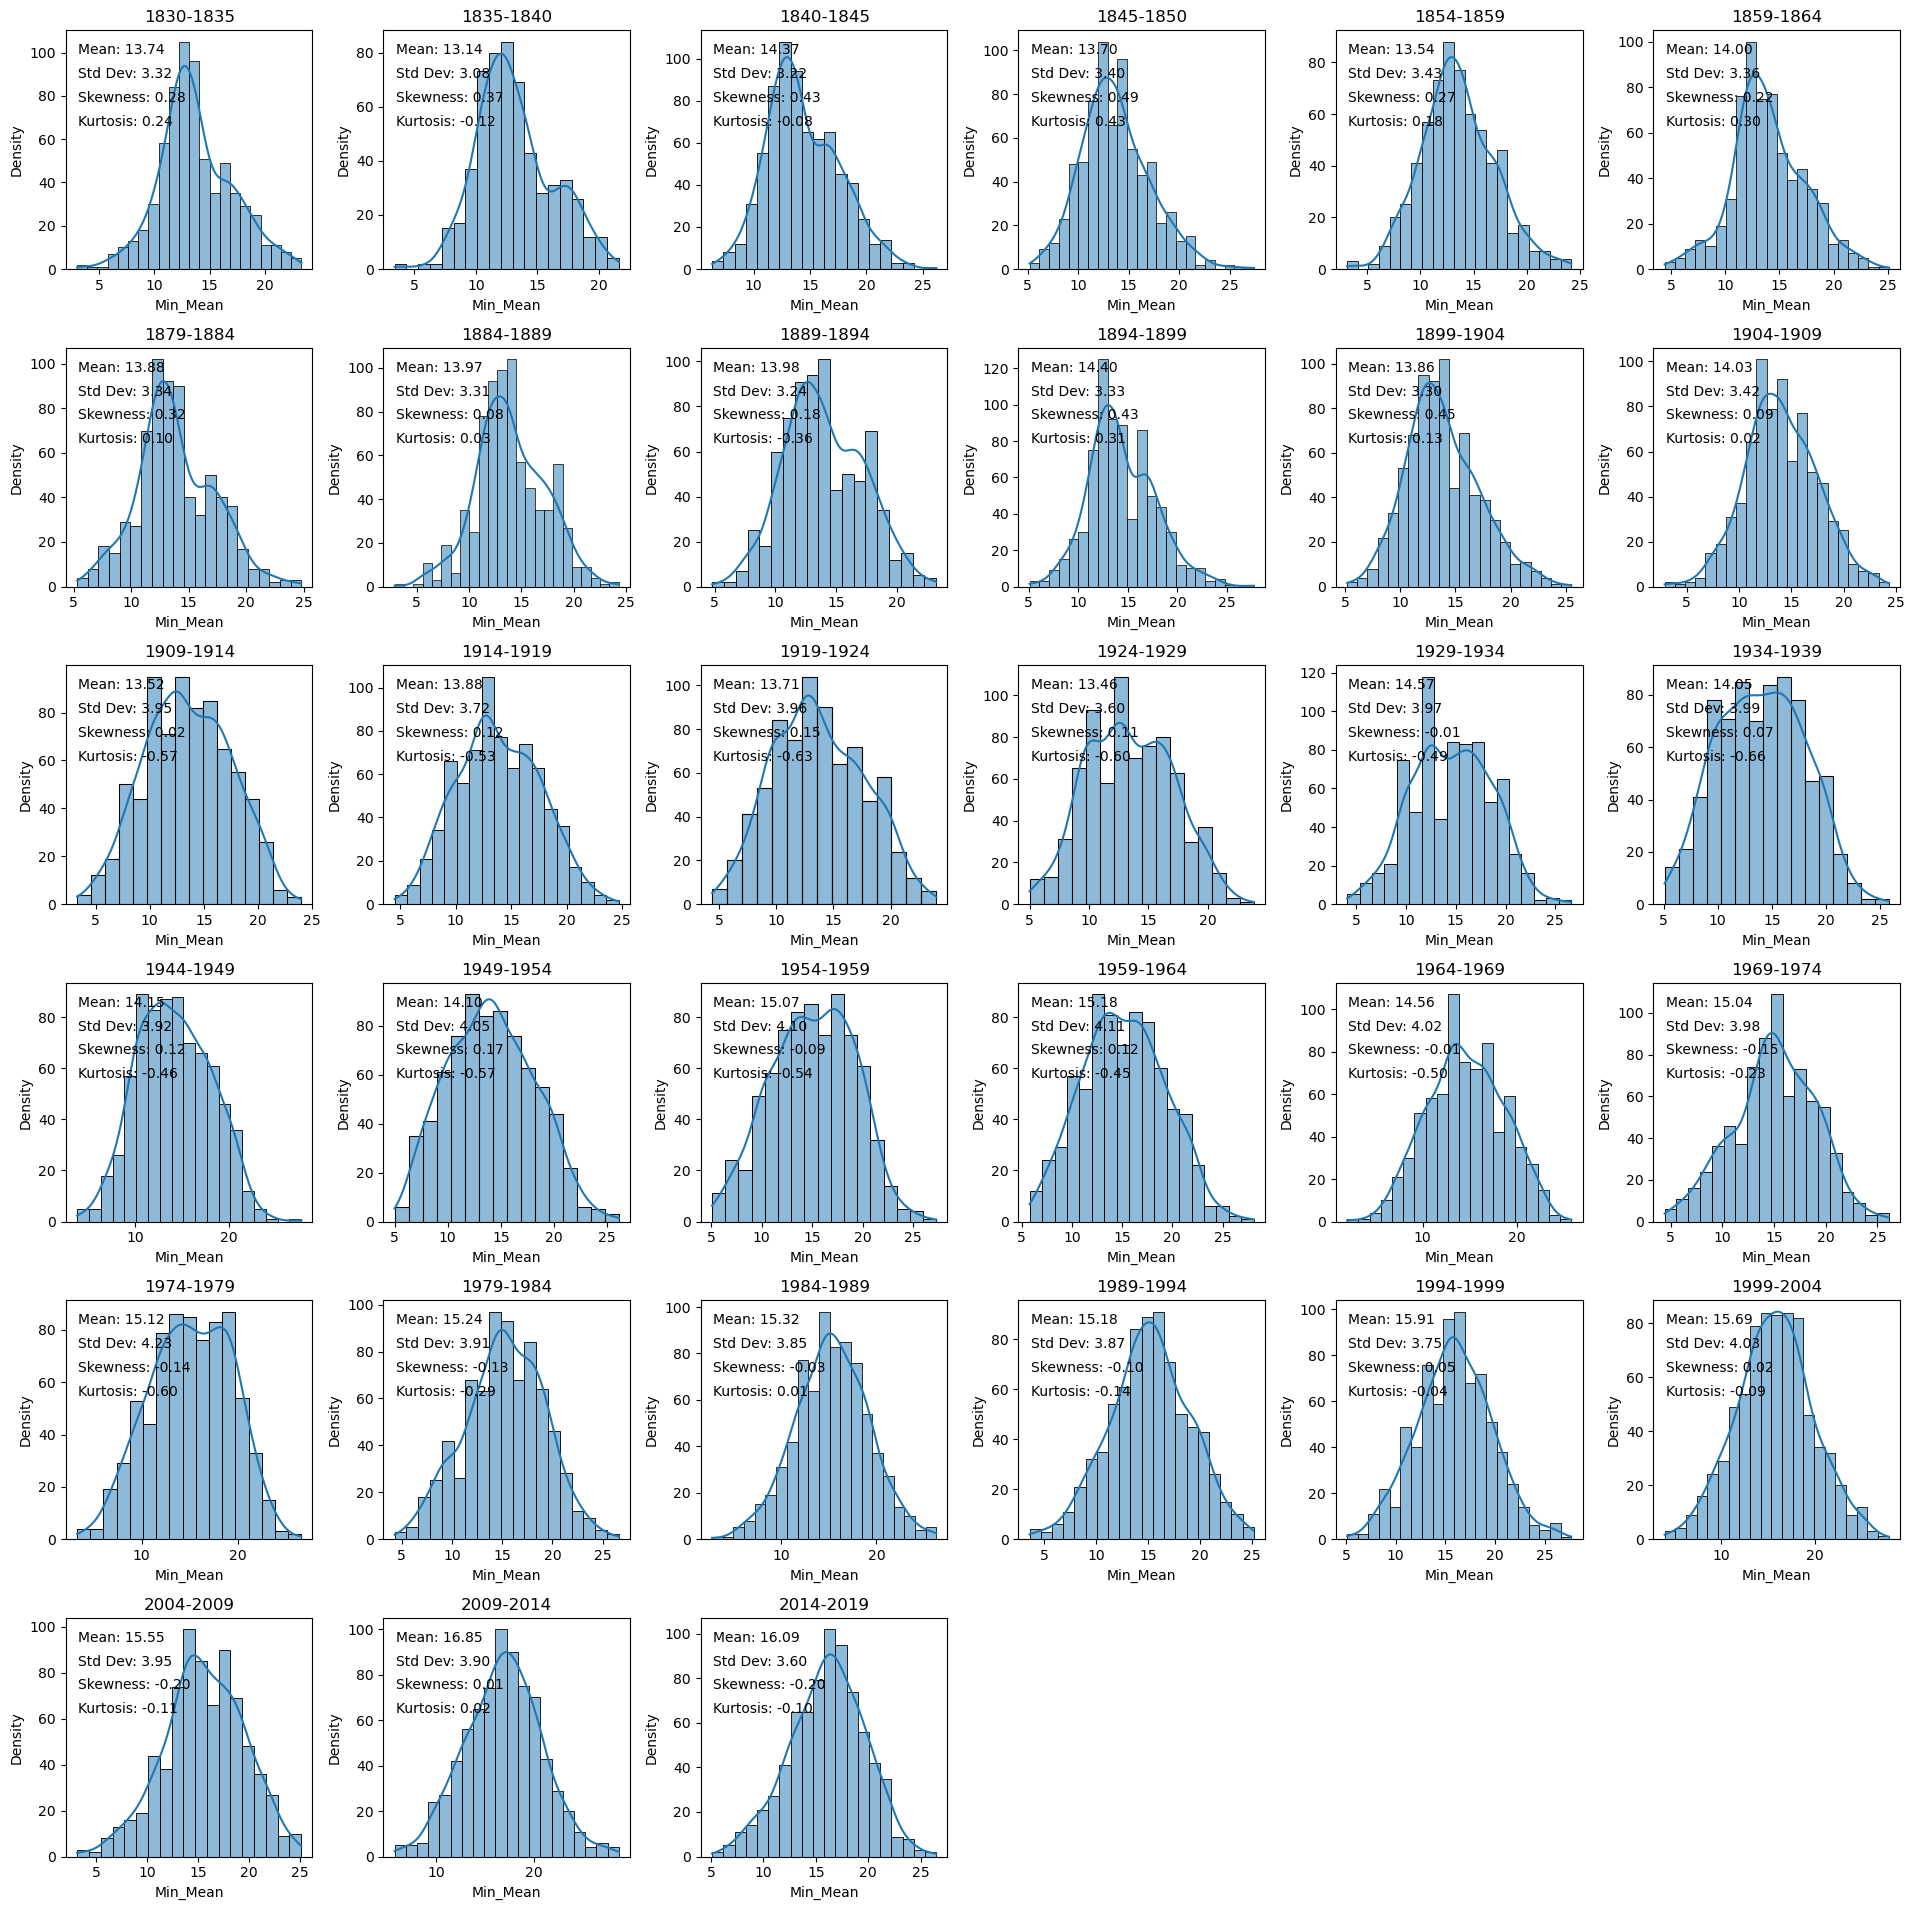

In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import describe

# Assuming you have a list of 33 DataFrames called Min

# Create a figure and subplots with increased size
fig, axs = plt.subplots(6, 6, figsize=(19.2, 19.2))  # Increase size by 20%
fig.subplots_adjust(hspace=0.6, wspace=0.4)  # Adjust the vertical and horizontal spacing between subplots

# Iterate through each DataFrame and create subplots
for i, df in enumerate(Min):
    # Get the start and end years from the DataFrame's index
    start_year = df.index.min().year
    end_year = df.index.max().year

    # Remove NaN values from Min_Mean column
    df_cleaned = df.dropna(subset=['Min_Mean'])

    # Calculate the statistical measures for Min_Mean column
    statistics = describe(df_cleaned['Min_Mean'])
    mean = statistics.mean
    std_dev = statistics.variance ** 0.5
    skewness = statistics.skewness
    kurtosis = statistics.kurtosis

    # Determine the row and column index for the subplot
    row = i // 6
    col = i % 6

    # Plot the distribution
    sns.histplot(df_cleaned['Min_Mean'], kde=True, ax=axs[row, col])
    axs[row, col].set_xlabel('Min_Mean')
    axs[row, col].set_ylabel('Density')
    axs[row, col].set_title(f'{start_year}-{end_year}')

    # Add statistics as text annotations in the subplot with improved separation
    axs[row, col].text(0.05, 0.9, f"Mean: {mean:.2f}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.05, 0.8, f"Std Dev: {std_dev:.2f}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.05, 0.7, f"Skewness: {skewness:.2f}", transform=axs[row, col].transAxes, fontsize=10)
    axs[row, col].text(0.05, 0.6, f"Kurtosis: {kurtosis:.2f}", transform=axs[row, col].transAxes, fontsize=10)

# Remove any remaining empty subplots
if len(Min) < 36:
    for i in range(len(Min), 36):
        row = i // 6
        col = i % 6
        fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()


### ANALYSIS ON DIST PLOTS

I think the 5 year mean was expected, and it has only rising about 1.5 to 2C in the max temp and around just over 2C in the minimum temperature. in the minimum temperature the stddev remians in the low 3C range until 1909 and afterward it changes to the high 4C stddev afterwards whioch that change over is in the same time when I switch datasets from the Perth Regional Office Homogonised to ACORN-SAT to the ACORN-SAT dataset and this is a key idneitnifier of different datasets used in this work. CHecking to see if the max has the same issue well it varies a look more singificamntly for every 5 year interval however just by eying it off the consitency is more consistent around 5C in the period after 1909 whereas it does tend to fluctuate between 4 and 6C quite drastically in the pre 1909 data. 

I beleive as a result of the different datasets used pre and post 1909, we expect do see that the skewness does not vary as much in the post 1909 distibutions compared to pre1909, we also see that there is basically non significnat skewness in the minimum temperature hoowever with this , we do see that the skewness is negaitve and becoming more consistant in the negative direction in the minimum while the maximum is singifncant but becoming weaker.

thIS is possibly due to the change of climate change but I have not tested this.

I could not observe any change in the kurtosis of the maximum temperatures, but in the minimum tempeuratres there seems to be a shift towards a more negative kurtosis in the more recent periods.

Now the next part is do I do a T test and an F test on the data, or just one test, I think its better to do one test to keep the integrity of the test as a independent test??

